# 1. Import Libraries

In [298]:
# Remove wornings
import warnings
warnings.filterwarnings('ignore')

In [299]:
# Data Wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

In [300]:
# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [560]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

In [302]:
# Model evaluation
from sklearn.model_selection import cross_val_score

In [303]:

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Functions

In [304]:
def print_shape_of_dataframes(**kwargs):
    """
    Print the shape (number of rows and columns) of multiple pandas DataFrame
    objects.

    Parameters:
    -------------
    **kwargs: dict
        Keyword arguments where the keys are the names of the DataFrame
        objects (as string) and the values are the DataFrame objects
        themselves.

    Notes:
    ------------
    The functon dynamically handles any number of DataFrame objects passed
    as keyword arguments.
    Ensure the passed objects are valid pandas DataFrame to avoid unexpected
    errors.
    """
    for name, value in kwargs.items():
        if hasattr(value, 'shape'):
            print(f'DataFrame \033[94m{name.title()}\033[0m has {value.shape[0]} rows and {value.shape[1]} columns.')
            print('------------------------------------')
        else:
            raise ValueError(f'The object 033[94m{name.title()}\033[0m is not a valid DataFrame.')

In [305]:
def column_description(data_frame: pd.DataFrame, column_name: str):
    if column_name not in data_frame.columns:
        raise ValueError(f'Column \033[94m{column_name}\033[0m not found in the dataframe.')
    print(f'Column {column_name}:')
    print('----------------------')
    if len(data_frame[column_name].unique()) < 20:
        print(f'Unique values: {list(data_frame[column_name].unique())}')
        print('----------------------')
        print('Value Caunts:')
        print(data_frame[column_name].value_counts())
        print('----------------------')
    else:
        print(f'Data Type: {data_frame[column_name].dtype}')
        print('----------------------')
    print(f'Missing Values: {data_frame[column_name].isnull().sum()}')



In [306]:
def missing_values(data_frame: pd.DataFrame) -> dict:
    """
    Identify missing values in a pandas DataFrame.

    This function calculates the number of missing values in
    each column of the provided DataFrame and prints a summary.
    It also returns a dictionary where the keys are column names and
    the values are the number of missing entries. Additionally, it
    visualizes the missing data using a matrix plot.

    Parameters:
    -------------
    data_frame: pd.DataFrame
        The DataFrame to analyze for missing values.

    Returns:
    ------------
    dict
        A dictionary with column as keys and the count of missing 
        values as values.

    Raises:
    -----------
    TypeError
        If the input is not a pandas DataFrame.
    ValueError
        If the DataFrame is empty.
    """
    if not isinstance(data_frame, pd.DataFrame):
        raise TypeError('Input must be a pandas DataFrame.')
    if data_frame.empty:
        raise ValueError('The DataFrame is empty.')
        
    result: dict = {}
    for column_name, missing_value in data_frame.isnull().sum().items():
        if missing_value != 0:
            print(f'Column \033[94m{column_name}\033[0m has {missing_value} missing values, or {round(missing_value*100 / len(data_frame), 2)}%.')
            result[column_name] = missing_value
    print(missingno.matrix(data_frame))
    return result

In [307]:
def categorical_variables_visualization(data_frame: pd.DataFrame, column_name: str, target=False, visualization=False, hue_column=False):
    """
    Visualizes and summarizes categorical variables in a DataFrame,
    with optional hue grouping.

    This function performs the following tasks:
    1. Prints the value counts for a specified categorical column.
    2. Optionally prints the mean of a target variable grouped by 
    column(s).
    3. Optionally creates a plot visualizing the relationship between
    the categorical column(s) and the target variable.
    4. Optionally includes a hue groiping for better visualization and
    analysis.

    Parameters:
    ---------------
    data_frame: pd.DataFrame
        The pandas DataFrame containing the data.

    column_name: str
        The name of the categorical column to analyze.

    target: str, optional, default=False
        The name of the target variable for grouping and calculating
        the mean.

    visualization: str, optional, default=False
        The type of plot to create. Supported types are strip,
        box, violin, etc. If False, no plot will be generated.

    hue_column: str, optinal, default=False
        The name of the column to be used for hue grouping in the 
        plot. If false, no hue grouping will be applied. The function
        will only analyze and visualize the column_name.

    Returns:
    -------------
    None
        The function prints summary statistics and may display a plot,
        but does not return any values.
    
    Raises:
    ------------
    ValueError
        If the specified column_name, hue_column, or target is not found in 
        the DataFrame.

    Exception
        Any other exception encountered during the execution will be 
        caught and printed
    """
    def value_error_message(name: str) -> str:
        return f'Column \033[94m{name}\033[0m not found in the dataframe.'
    try:
        if hue_column:
            if hue_column not in data_frame.columns:
                raise ValueError(value_error_message(hue_column))
            if column_name not in data_frame.columns:
                raise ValueError(value_error_message(column_name))
            print(f'This is the value counts for the columns \033[94m{column_name}\033[0m and \033[94m{hue_column}\033[0m :')
            print(data_frame[[column_name, hue_column]].value_counts(dropna=False))
            print('\n')
            
            if target:
                if target not in data_frame.columns:
                    raise ValueError(value_error_message(target))
                print('------------------------------------------')
                print(f'The mean of the target variable \033[94m{target}\033[0m grouped by the categorical columns \033[94m{column_name}\033[0m and \033[94m{hue_column}\033[0m :')
                print(data_frame[[column_name, hue_column, target]].groupby([column_name, hue_column], as_index=False).mean().sort_values(target, ascending=False))
                print('\n')

            if visualization:
                print('------------------------------------------')
                print(f'Creating a {visualization} plot for the \033[94m{column_name}\033[0m and \033[94m{hue_column}\033[0m columns with respect to \033[94m{target}\033[0m ...')
                sns.catplot(x=column_name, y=target, hue=hue_column, data=data_frame, kind=visualization)
                plt.ylabel(f'{target.title()} Probability')
                plt.xlabel(f'{column_name.title()}')
                plt.title(f'{target.title()} Probability by {column_name.title()} and {hue_column.title()}')
                plt.plot()
                print('\n')
            
        else:  
            if column_name not in data_frame.columns:
                raise ValueError(f'Column \033[94m{column_name}\033[0m not found in the dataframe.')
        
            print(f'This is the value counts for the column \033[94m{column_name}\033[0m :')
            print(data_frame[column_name].value_counts(dropna=False))
            print('\n')
            if target:
                if target not in data_frame.columns:
                    raise ValueError(f'Target column \033[94m{target}\033[0m not found in the dataframe.')
                
                print('------------------------------------------')
                print(f'The mean of the target variable \033[94m{target}\033[0m grouped by the categorical column \033[94m{column_name}\033[0m :')
                print(data_frame[[column_name, target]].groupby(column_name, as_index=False).mean().sort_values(target, ascending=False))
                print('\n')
            
            if visualization:
                print('------------------------------------------')
                print(f'Creating a {visualization} plot for the \033[94m{column_name}\033[0m column with respect to \033[94m{target}\033[0m ...')
                sns.catplot(x=column_name, y=target, data=data_frame, kind=visualization)
                plt.ylabel(f'{target.title()} Probability')
                plt.xlabel(f'{column_name.title()}')
                plt.title(f'{target.title()} Probability by {column_name.title()}')
                plt.plot()
                print('\n')
    
    except Exception as e:
        print(f'An error occurred: {e}')

In [308]:
def kdeplot_visualization(data_frame: pd.DataFrame, column_name: str, distribution=False):
    """
    Generates a Kernel Density Estimation (KDE) plot for a given column
    in the DataFrame. Optionally, it can also group the KDE plots by 
    another column specified in the distribution parameter.

    Parameters:
    --------------
    data_frame: pd.DataFrame
        The input DataFrame containing the data.

    column_name: str
        The name of the column for which the KDE plot will be generated.

    distribution: str, optional, default = False
        An optional column name used to group the KDE plots. If provided,
        separate KDE plots will be generated for each unique value
        in this column.

    Returns:
    --------------
    None
        Displays the KDE plot.

    Raises:
    --------------
    ValueError
        If either column_name or distribution (if provided) is not found
        in the DataFrame columns.
    """
    if column_name not in data_frame.columns:
        raise ValueError(f'Column {column_name} not found in the DataFrame.')

    if distribution:
        if distribution not in data_frame.columns:
            raise ValueError(f'Column {distribution} not found in the DataFrame.')
        for unique_value in data_frame[distribution].unique():
            sns.kdeplot(data_frame[column_name][data_frame[distribution] == unique_value], label=f'{unique_value}')
        plt.xlabel(column_name)
        plt.legend()
        plt.title(f'Passenger {column_name.title()} Distribution by {distribution.title()}')
        plt.show()
    else:
        sns.kdeplot(data_frame[column_name], label=f'Skewness: {data_frame[column_name].skew().round(2)}')
        plt.legend(loc='best')
        plt.title(f'Passenger {column_name.title()} Distribution.')
        plt.show()

In [309]:
def delete_outliers(data_frame: pd.DataFrame, n: int, features: list) -> list:
    """
    Detect and Identifies outliers in the specified features of a 
    DataFrame.

    This function iterates through a list of numerical features and detects
    outliers in each feature based on the IQR method. An outlier is defined
    as a value below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
    If an index appears as an outlier in more than N features, it is added to the 
    final list of multiple outliers.

    Parameters:
    ---------------
    data_frame: pd.DataFrame
        The DataFrame containing the data to analyze.

    n: int
        The minimum number of features in which a data point must be an outlier
        to be considered a multiple outlier.

    features: list
        A list of column names (features) to analyze for outliers.
        Those should be numerical columns.

    Returns:
    -------------
    list
        A list of indices corresponding to data points that are outliers
        in more than n features.

    Raises:
    ------------
    TypeError
        If data_frame is not a pandas DataFrame, or if features is not a list.

    ValueError
        If n is negative, or if a feature in the features list is not in
        the DataFrame.
    """
    if not isinstance(data_frame, pd.DataFrame):
        raise TypeError("`data_frame` must be a pandas DataFrame.")
    if not isinstance(features, list):
        raise TypeError("`features` must be a list of column names.")
    if not isinstance(n, int) or n < 0:
        raise ValueError("`n` must be a non-negative integer.")
        
    outliers = []
    for feature in features:
        Q1 = np.percentile(data_frame[feature], 25)
        Q3 = np.percentile(data_frame[feature], 75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        outlier_list = data_frame[(data_frame[feature] < lower) | (data_frame[feature] > upper)].index
        outliers.extend(outlier_list)
    outliers = Counter(outliers)
    multiple_outliers = list(key for key, value in outliers.items() if value > n)
    return multiple_outliers

# 2. Import and Read Data

In [310]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_submission = pd.read_csv('data/sample_submission.csv')

In [311]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [312]:
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [313]:
df_submission.head(3)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570


In [314]:
print_shape_of_dataframes(train=df_train, test=df_test)

DataFrame Train has 1460 rows and 81 columns.
------------------------------------
DataFrame Test has 1459 rows and 80 columns.
------------------------------------


The datasets of housing information, with `Train` containing 1460 instances and 81 features, while `Test` includes 1459 instances and 80 features. The difference in columns is due to the absence of the target variable `SalePrice` in the Test set.

# 3. Data Description

In [315]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [316]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [317]:
df_train.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* `Id` 

Unique Identifier for each of the columns.

* `MSSubClass`

Identifies the type of dwelling involved in the sale.

20	1-STORY 1946 & NEWER ALL STYLES<br>
30	1-STORY 1945 & OLDER<br>
40	1-STORY W/FINISHED ATTIC ALL AGES<br>
45	1-1/2 STORY - UNFINISHED ALL AGES<br>
50	1-1/2 STORY FINISHED ALL AGES<br>
60	2-STORY 1946 & NEWER<br>
70	2-STORY 1945 & OLDER<br>
75	2-1/2 STORY ALL AGES<br>
80	SPLIT OR MULTI-LEVEL<br>
85	SPLIT FOYER<br>
90	DUPLEX - ALL STYLES AND AGES<br>
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER<br>
150	1-1/2 STORY PUD - ALL AGES<br>
160	2-STORY PUD - 1946 & NEWER<br>
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER<br>
190	2 FAMILY CONVERSION - ALL STYLES AND AGES<br>

In [318]:
column_description(df_train, 'MSSubClass')

Column MSSubClass:
----------------------
Unique values: [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40]
----------------------
Value Caunts:
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
----------------------
Missing Values: 0


* `MSZoning`

Identifies the general zoning classification of the sale.

A	Agriculture<br>
C	Commercial<br>
FV	Floating Village Residential<br>
I	Industrial<br>
RH	Residential High Density<br>
RL	Residential Low Density<br>
RP	Residential Low Density Park<br> 
RM	Residential Medium Density<br>

In [319]:
column_description(df_train, 'MSZoning')

Column MSZoning:
----------------------
Unique values: ['RL', 'RM', 'C (all)', 'FV', 'RH']
----------------------
Value Caunts:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
----------------------
Missing Values: 0


* `LotFrontage`

The LotFrontage column represents the linear measurement of the property’s street-facing boundary, i.e., how many feet of the property’s land is connected directly to a street. This feature is an important factor because it can influence the accessibility, visibility, and overall appeal of the property. A larger LotFrontage often indicates a property with more street access, which may be desirable for certain buyers or types of development.

In [320]:
column_description(df_train, 'LotFrontage')

Column LotFrontage:
----------------------
Data Type: float64
----------------------
Missing Values: 259


* `LotArea`

The LotArea column represents the total land area of the property in square feet. This feature is a key factor in determining the size of the property, which plays a significant role in property valuation. Larger lots generally provide more space for the home, outdoor amenities, and potential future developments. The LotArea is an important determinant of a property’s market value, as it directly influences the usable land available for construction, landscaping, and other activities.

In [321]:
column_description(df_train, 'LotArea')

Column LotArea:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `Street`

The Street column describes the type of road access to the property, which can affect both the property's value and its accessibility. The type of street a property is connected to can influence how easy it is to access the property, the overall condition of the area, and how desirable the location might be for potential buyers.

There are two categories for this feature:

`Grvl (Gravel)`
This indicates that the road leading to the property is a gravel road, typically made from crushed stone, pebbles, or other loose materials. Gravel roads can be found in rural or less developed areas, where road infrastructure may not be paved.

`Pave (Paved)`
This indicates that the road leading to the property is paved, usually with asphalt or concrete. Paved roads are typically found in urban, suburban, or developed areas and offer better year-round accessibility and smoother driving conditions.

In [322]:
column_description(df_train, 'Street')

Column Street:
----------------------
Unique values: ['Pave', 'Grvl']
----------------------
Value Caunts:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
----------------------
Missing Values: 0


* `Alley`

The Alley column describes the type of alley access to the property, which may affect the overall convenience, accessibility, and desirability of a property. An Alley is typically a narrow road or passageway located behind or along the side of properties, providing secondary access. The availability and type of alley access can influence property values, as it can affect the ease of access, privacy, and overall character of the property.

The Alley column has three possible values:

`Grvl (Gravel)`
 Indicates that the alley providing access to the property is a gravel alley. Gravel alleys are common in rural or less-developed areas where roads and infrastructure may not be as polished or refined as in more urban settings.

 `Pave (Paved)`
 Indicates that the alley providing access to the property is a paved alley, typically made of asphalt or concrete. Paved alleys are usually found in more developed urban or suburban areas, where infrastructure is better maintained.

 `NA (No Alley Access)`
 Indicates that there is no alley access to the property. The property is likely only accessible by a main road or street, without a secondary alley access point.


In [323]:
column_description(df_train, 'Alley')

Column Alley:
----------------------
Unique values: [nan, 'Grvl', 'Pave']
----------------------
Value Caunts:
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
----------------------
Missing Values: 1369


* `LotShape`

The LotShape column describes the general shape of the property’s lot, which can impact both the property's functionality and market value. The shape of a lot can influence how a property is used, how much usable space is available, and the overall appeal of the property to potential buyers. For instance, a regular, well-shaped lot may be more desirable for construction or landscaping purposes than an irregularly shaped lot.

The LotShape feature has four possible values:

`Reg (Regular)`
Indicates that the property’s lot is a regular, typically rectangular or square, shape. This is the most straightforward and commonly seen lot shape.

`IR1 (Slightly Irregular)`
Indicates that the lot is slightly irregular in shape. It might have some minor deviations from a perfect rectangle or square, such as slight curves or angles.

`IR2 (Moderately Irregular)`
Indicates that the lot has more noticeable irregularities. This could involve more pronounced angles, curves, or a shape that deviates further from a rectangular or square form.

`IR3 (Irregular)`
Indicates that the lot has a highly irregular shape, such as unusual angles, curves, or a lot that deviates greatly from a rectangular or square form.

In [324]:
column_description(df_train, 'LotShape')

Column LotShape:
----------------------
Unique values: ['Reg', 'IR1', 'IR2', 'IR3']
----------------------
Value Caunts:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
----------------------
Missing Values: 0


* `LandContour`

Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [325]:
column_description(df_train, 'LandContour')

Column LandContour:
----------------------
Unique values: ['Lvl', 'Bnk', 'Low', 'HLS']
----------------------
Value Caunts:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
----------------------
Missing Values: 0


* `Utilities`

Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [326]:
column_description(df_train, 'Utilities')

Column Utilities:
----------------------
Unique values: ['AllPub', 'NoSeWa']
----------------------
Value Caunts:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `LotConfig`

Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [327]:
column_description(df_train, 'LotConfig')

Column LotConfig:
----------------------
Unique values: ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
----------------------
Value Caunts:
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
----------------------
Missing Values: 0


* `LandSlope`

Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [328]:
column_description(df_train, 'LandSlope')

Column LandSlope:
----------------------
Unique values: ['Gtl', 'Mod', 'Sev']
----------------------
Value Caunts:
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
----------------------
Missing Values: 0


* `Neighborhood`

Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [329]:
column_description(df_train, 'Neighborhood')

Column Neighborhood:
----------------------
Data Type: object
----------------------
Missing Values: 0


* `Condition1`

Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [330]:
column_description(df_train, 'Condition1')

Column Condition1:
----------------------
Unique values: ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
----------------------
Value Caunts:
Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64
----------------------
Missing Values: 0


* `Condition2`

Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [331]:
column_description(df_train, 'Condition2')

Column Condition2:
----------------------
Unique values: ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']
----------------------
Value Caunts:
Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `BldgType`

Type of dwelling

       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [332]:
column_description(df_train, 'BldgType')

Column BldgType:
----------------------
Unique values: ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
----------------------
Value Caunts:
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64
----------------------
Missing Values: 0


* `HouseStyle`

Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [333]:
column_description(df_train, 'HouseStyle')

Column HouseStyle:
----------------------
Unique values: ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin']
----------------------
Value Caunts:
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64
----------------------
Missing Values: 0


* `OverallQual`

Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [334]:
column_description(df_train, 'OverallQual')

Column OverallQual:
----------------------
Unique values: [7, 6, 8, 5, 9, 4, 10, 3, 1, 2]
----------------------
Value Caunts:
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64
----------------------
Missing Values: 0


* `OverallCond`

Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [335]:
column_description(df_train, 'OverallCond')

Column OverallCond:
----------------------
Unique values: [5, 8, 6, 7, 4, 2, 3, 9, 1]
----------------------
Value Caunts:
OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `YearBuilt`

Original construction date

In [336]:
column_description(df_train, 'YearBuilt')

Column YearBuilt:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `YearRemodAdd`

Remodel date (same as construction date if no remodeling or additions)

In [337]:
column_description(df_train, 'YearRemodAdd')

Column YearRemodAdd:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `RoofStyle`

Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [338]:
column_description(df_train, 'RoofStyle')

Column RoofStyle:
----------------------
Unique values: ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed']
----------------------
Value Caunts:
RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64
----------------------
Missing Values: 0


* `RoofMatl`

Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

In [339]:
column_description(df_train, 'RoofMatl')

Column RoofMatl:
----------------------
Unique values: ['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv', 'Roll', 'ClyTile']
----------------------
Value Caunts:
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `Exterior1st`

Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [340]:
column_description(df_train, 'Exterior1st')

Column Exterior1st:
----------------------
Unique values: ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock']
----------------------
Value Caunts:
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `Exterior2nd`

Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [341]:
column_description(df_train, 'Exterior2nd')

Column Exterior2nd:
----------------------
Unique values: ['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng', 'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc', 'AsphShn', 'Stone', 'Other', 'CBlock']
----------------------
Value Caunts:
Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `MasVnrType`

Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [342]:
column_description(df_train, 'MasVnrType')

Column MasVnrType:
----------------------
Unique values: ['BrkFace', nan, 'Stone', 'BrkCmn']
----------------------
Value Caunts:
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64
----------------------
Missing Values: 872


* `MasVnrArea`

Masonry veneer area in square feet


In [343]:
column_description(df_train, 'MasVnrArea')

Column MasVnrArea:
----------------------
Data Type: float64
----------------------
Missing Values: 8


* `ExterQual`

Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [344]:
column_description(df_train, 'ExterQual')

Column ExterQual:
----------------------
Unique values: ['Gd', 'TA', 'Ex', 'Fa']
----------------------
Value Caunts:
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64
----------------------
Missing Values: 0


* `ExterCond`

Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [345]:
column_description(df_train, 'ExterCond')

Column ExterCond:
----------------------
Unique values: ['TA', 'Gd', 'Fa', 'Po', 'Ex']
----------------------
Value Caunts:
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `Foundation`

Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [346]:
column_description(df_train, 'Foundation')

Column Foundation:
----------------------
Unique values: ['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone']
----------------------
Value Caunts:
Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64
----------------------
Missing Values: 0


* `BsmtQual`

Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [347]:
column_description(df_train, 'BsmtQual')

Column BsmtQual:
----------------------
Unique values: ['Gd', 'TA', 'Ex', nan, 'Fa']
----------------------
Value Caunts:
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
----------------------
Missing Values: 37


* `BsmtCond`

Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [348]:
column_description(df_train, 'BsmtCond')

Column BsmtCond:
----------------------
Unique values: ['TA', 'Gd', nan, 'Fa', 'Po']
----------------------
Value Caunts:
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
----------------------
Missing Values: 37


* `BsmtExposure`

Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [349]:
column_description(df_train, 'BsmtExposure')

Column BsmtExposure:
----------------------
Unique values: ['No', 'Gd', 'Mn', 'Av', nan]
----------------------
Value Caunts:
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
----------------------
Missing Values: 38


* `BsmtFinType1`

Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [350]:
column_description(df_train, 'BsmtFinType1')

Column BsmtFinType1:
----------------------
Unique values: ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ']
----------------------
Value Caunts:
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
----------------------
Missing Values: 37


* `BsmtFinSF1`

Type 1 finished square feet

In [351]:
column_description(df_train, 'BsmtFinSF1')

Column BsmtFinSF1:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `BsmtFinType2`

Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [352]:
column_description(df_train, 'BsmtFinType2')

Column BsmtFinType2:
----------------------
Unique values: ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ']
----------------------
Value Caunts:
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
----------------------
Missing Values: 38


* `BsmtFinSF2`

Type 2 finished square feet

In [353]:
column_description(df_train, 'BsmtFinSF2')

Column BsmtFinSF2:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `BsmtUnfSF`

Unfinished square feet of basement area

In [354]:
column_description(df_train, 'BsmtUnfSF')

Column BsmtUnfSF:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `TotalBsmtSF`

Total square feet of basement area

In [355]:
column_description(df_train, 'TotalBsmtSF')

Column TotalBsmtSF:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `Heating`

Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [356]:
column_description(df_train, 'Heating')

Column Heating:
----------------------
Unique values: ['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor']
----------------------
Value Caunts:
Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `HeatingQC`

Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [357]:
column_description(df_train, 'HeatingQC')

Column HeatingQC:
----------------------
Unique values: ['Ex', 'Gd', 'TA', 'Fa', 'Po']
----------------------
Value Caunts:
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `CentralAir`

Central air conditioning

       N	No
       Y	Yes

In [358]:
column_description(df_train, 'CentralAir')

Column CentralAir:
----------------------
Unique values: ['Y', 'N']
----------------------
Value Caunts:
CentralAir
Y    1365
N      95
Name: count, dtype: int64
----------------------
Missing Values: 0


* `Electrical`

Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [359]:
column_description(df_train, 'Electrical')

Column Electrical:
----------------------
Unique values: ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan]
----------------------
Value Caunts:
Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64
----------------------
Missing Values: 1


* `1stFlrSF`

First Floor square feet

In [360]:
column_description(df_train, '1stFlrSF')

Column 1stFlrSF:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `2ndFlrSF`

Second floor square feet

In [361]:
column_description(df_train, '2ndFlrSF')

Column 2ndFlrSF:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `LowQualFinSF`

Low quality finished square feet (all floors)

In [362]:
column_description(df_train, 'LowQualFinSF')

Column LowQualFinSF:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `GrLivArea`

Above grade (ground) living area square feet


In [363]:
column_description(df_train, 'GrLivArea')

Column GrLivArea:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `BsmtFullBath`

Basement full bathrooms

In [364]:
column_description(df_train, 'BsmtFullBath')

Column BsmtFullBath:
----------------------
Unique values: [1, 0, 2, 3]
----------------------
Value Caunts:
BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `BsmtHalfBath`

Basement half bathrooms

In [365]:
column_description(df_train, 'BsmtHalfBath')

Column BsmtHalfBath:
----------------------
Unique values: [0, 1, 2]
----------------------
Value Caunts:
BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64
----------------------
Missing Values: 0


* `FullBath`

Full bathrooms above grade

In [366]:
column_description(df_train, 'FullBath')

Column FullBath:
----------------------
Unique values: [2, 1, 3, 0]
----------------------
Value Caunts:
FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64
----------------------
Missing Values: 0


* `HalfBath`

Half baths above grade

In [367]:
column_description(df_train, 'HalfBath')

Column HalfBath:
----------------------
Unique values: [1, 0, 2]
----------------------
Value Caunts:
HalfBath
0    913
1    535
2     12
Name: count, dtype: int64
----------------------
Missing Values: 0


* `KitchenQual`

Kitchen quality


       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [368]:
column_description(df_train, 'KitchenQual')

Column KitchenQual:
----------------------
Unique values: ['Gd', 'TA', 'Ex', 'Fa']
----------------------
Value Caunts:
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64
----------------------
Missing Values: 0


* `TotRmsAbvGrd`

Total rooms above grade (does not include bathrooms)

In [369]:
column_description(df_train, 'TotRmsAbvGrd')

Column TotRmsAbvGrd:
----------------------
Unique values: [8, 6, 7, 9, 5, 11, 4, 10, 12, 3, 2, 14]
----------------------
Value Caunts:
TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `Functional`

Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [370]:
column_description(df_train, 'Functional')

Column Functional:
----------------------
Unique values: ['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev']
----------------------
Value Caunts:
Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `Fireplaces`

Number of fireplaces

In [371]:
column_description(df_train, 'Fireplaces')

Column Fireplaces:
----------------------
Unique values: [0, 1, 2, 3]
----------------------
Value Caunts:
Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64
----------------------
Missing Values: 0


* `FireplaceQu`

Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [372]:
column_description(df_train, 'FireplaceQu')

Column FireplaceQu:
----------------------
Unique values: [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po']
----------------------
Value Caunts:
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
----------------------
Missing Values: 690


* `GarageType`

Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [373]:
column_description(df_train, 'GarageType')

Column GarageType:
----------------------
Unique values: ['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types']
----------------------
Value Caunts:
GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
----------------------
Missing Values: 81


* `GarageYrBlt`

Year garage was built

In [374]:
column_description(df_train, 'GarageYrBlt')

Column GarageYrBlt:
----------------------
Data Type: float64
----------------------
Missing Values: 81


* `GarageFinish`

Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [375]:
column_description(df_train, 'GarageFinish')

Column GarageFinish:
----------------------
Unique values: ['RFn', 'Unf', 'Fin', nan]
----------------------
Value Caunts:
GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64
----------------------
Missing Values: 81


* `GarageCars`

Size of garage in car capacity

In [376]:
column_description(df_train, 'GarageCars')

Column GarageCars:
----------------------
Unique values: [2, 3, 1, 0, 4]
----------------------
Value Caunts:
GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64
----------------------
Missing Values: 0


* `GarageArea`

Size of garage in square feet

In [377]:
column_description(df_train, 'GarageArea')

Column GarageArea:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `GarageQual`

Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [378]:
column_description(df_train, 'GarageQual')

Column GarageQual:
----------------------
Unique values: ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po']
----------------------
Value Caunts:
GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
----------------------
Missing Values: 81


* `GarageCond`

Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [379]:
column_description(df_train, 'GarageCond')

Column GarageCond:
----------------------
Unique values: ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex']
----------------------
Value Caunts:
GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64
----------------------
Missing Values: 81


* `PavedDrive`

Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [380]:
column_description(df_train, 'PavedDrive')

Column PavedDrive:
----------------------
Unique values: ['Y', 'N', 'P']
----------------------
Value Caunts:
PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64
----------------------
Missing Values: 0


* `WoodDeckSF`

Wood deck area in square feet

In [381]:
column_description(df_train, 'WoodDeckSF')

Column WoodDeckSF:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `OpenPorchSF`

Open porch area in square feet

In [382]:
column_description(df_train, 'OpenPorchSF')

Column OpenPorchSF:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `EnclosedPorch`

Enclosed porch area in square feet

In [383]:
column_description(df_train, 'EnclosedPorch')

Column EnclosedPorch:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `3SsnPorch`

Three season porch area in square feet

In [384]:
column_description(df_train, '3SsnPorch')

Column 3SsnPorch:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `ScreenPorch`

Screen porch area in square feet

In [385]:
column_description(df_train, 'ScreenPorch')

Column ScreenPorch:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `PoolArea`

Pool area in square feet

In [386]:
column_description(df_train, 'PoolArea')

Column PoolArea:
----------------------
Unique values: [0, 512, 648, 576, 555, 480, 519, 738]
----------------------
Value Caunts:
PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64
----------------------
Missing Values: 0


* `PoolQC`

Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [387]:
column_description(df_train, 'PoolQC')

Column PoolQC:
----------------------
Unique values: [nan, 'Ex', 'Fa', 'Gd']
----------------------
Value Caunts:
PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64
----------------------
Missing Values: 1453


* `Fence`

Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [388]:
column_description(df_train, 'Fence')

Column Fence:
----------------------
Unique values: [nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']
----------------------
Value Caunts:
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64
----------------------
Missing Values: 1179


* `MiscFeature`

Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [389]:
column_description(df_train, 'MiscFeature')

Column MiscFeature:
----------------------
Unique values: [nan, 'Shed', 'Gar2', 'Othr', 'TenC']
----------------------
Value Caunts:
MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64
----------------------
Missing Values: 1406


* `MiscVal`

$Value of miscellaneous feature

In [390]:
column_description(df_train, 'MiscVal')

Column MiscVal:
----------------------
Data Type: int64
----------------------
Missing Values: 0


* `MoSold`

Month Sold (MM)

In [391]:
column_description(df_train, 'MoSold')

Column MoSold:
----------------------
Unique values: [2, 5, 9, 12, 10, 8, 11, 4, 1, 7, 3, 6]
----------------------
Value Caunts:
MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64
----------------------
Missing Values: 0


* `YrSold`

Year Sold (YYYY)

In [392]:
column_description(df_train, 'YrSold')

Column YrSold:
----------------------
Unique values: [2008, 2007, 2006, 2009, 2010]
----------------------
Value Caunts:
YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64
----------------------
Missing Values: 0


* `SaleType`

Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [393]:
column_description(df_train, 'SaleType')

Column SaleType:
----------------------
Unique values: ['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth']
----------------------
Value Caunts:
SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64
----------------------
Missing Values: 0


* `SaleCondition`

Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [394]:
column_description(df_train, 'SaleCondition')

Column SaleCondition:
----------------------
Unique values: ['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family']
----------------------
Value Caunts:
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64
----------------------
Missing Values: 0


# 4. EDA (Exploratory Data Analysis)

## 4.1 Data Types, Missing Data and Summary Statistics

Column LotFrontage has 259 missing values, or 17.74%.
Column Alley has 1369 missing values, or 93.77%.
Column MasVnrType has 872 missing values, or 59.73%.
Column MasVnrArea has 8 missing values, or 0.55%.
Column BsmtQual has 37 missing values, or 2.53%.
Column BsmtCond has 37 missing values, or 2.53%.
Column BsmtExposure has 38 missing values, or 2.6%.
Column BsmtFinType1 has 37 missing values, or 2.53%.
Column BsmtFinType2 has 38 missing values, or 2.6%.
Column Electrical has 1 missing values, or 0.07%.
Column FireplaceQu has 690 missing values, or 47.26%.
Column GarageType has 81 missing values, or 5.55%.
Column GarageYrBlt has 81 missing values, or 5.55%.
Column GarageFinish has 81 missing values, or 5.55%.
Column GarageQual has 81 missing values, or 5.55%.
Column GarageCond has 81 missing values, or 5.55%.
Column PoolQC has 1453 missing values, or 99.52%.
Column Fence has 1179 missing values, or 80.75%.
Column MiscFeature has 1406 missing values, or 96.3%.
Axes(0.125,0.11;0.698618

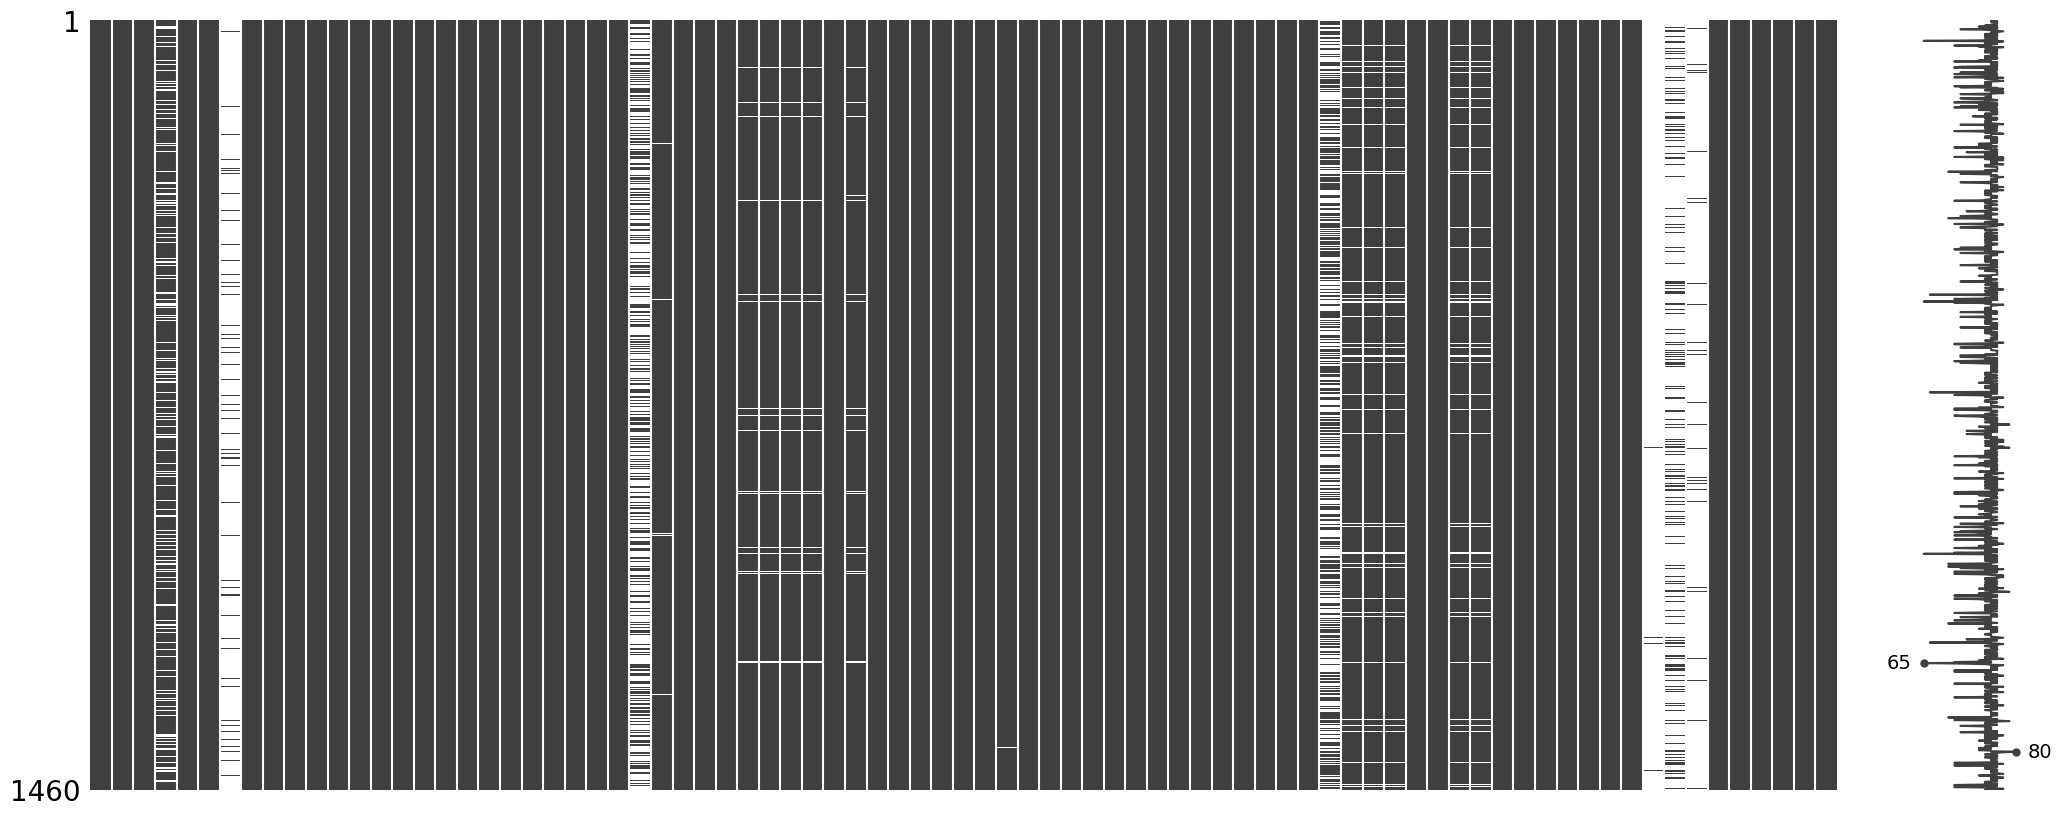

In [395]:
missing_values_train = missing_values(df_train)

Column MSZoning has 4 missing values, or 0.27%.
Column LotFrontage has 227 missing values, or 15.56%.
Column Alley has 1352 missing values, or 92.67%.
Column Utilities has 2 missing values, or 0.14%.
Column Exterior1st has 1 missing values, or 0.07%.
Column Exterior2nd has 1 missing values, or 0.07%.
Column MasVnrType has 894 missing values, or 61.27%.
Column MasVnrArea has 15 missing values, or 1.03%.
Column BsmtQual has 44 missing values, or 3.02%.
Column BsmtCond has 45 missing values, or 3.08%.
Column BsmtExposure has 44 missing values, or 3.02%.
Column BsmtFinType1 has 42 missing values, or 2.88%.
Column BsmtFinSF1 has 1 missing values, or 0.07%.
Column BsmtFinType2 has 42 missing values, or 2.88%.
Column BsmtFinSF2 has 1 missing values, or 0.07%.
Column BsmtUnfSF has 1 missing values, or 0.07%.
Column TotalBsmtSF has 1 missing values, or 0.07%.
Column BsmtFullBath has 2 missing values, or 0.14%.
Column BsmtHalfBath has 2 missing values, or 0.14%.
Column KitchenQual has 1 missing 

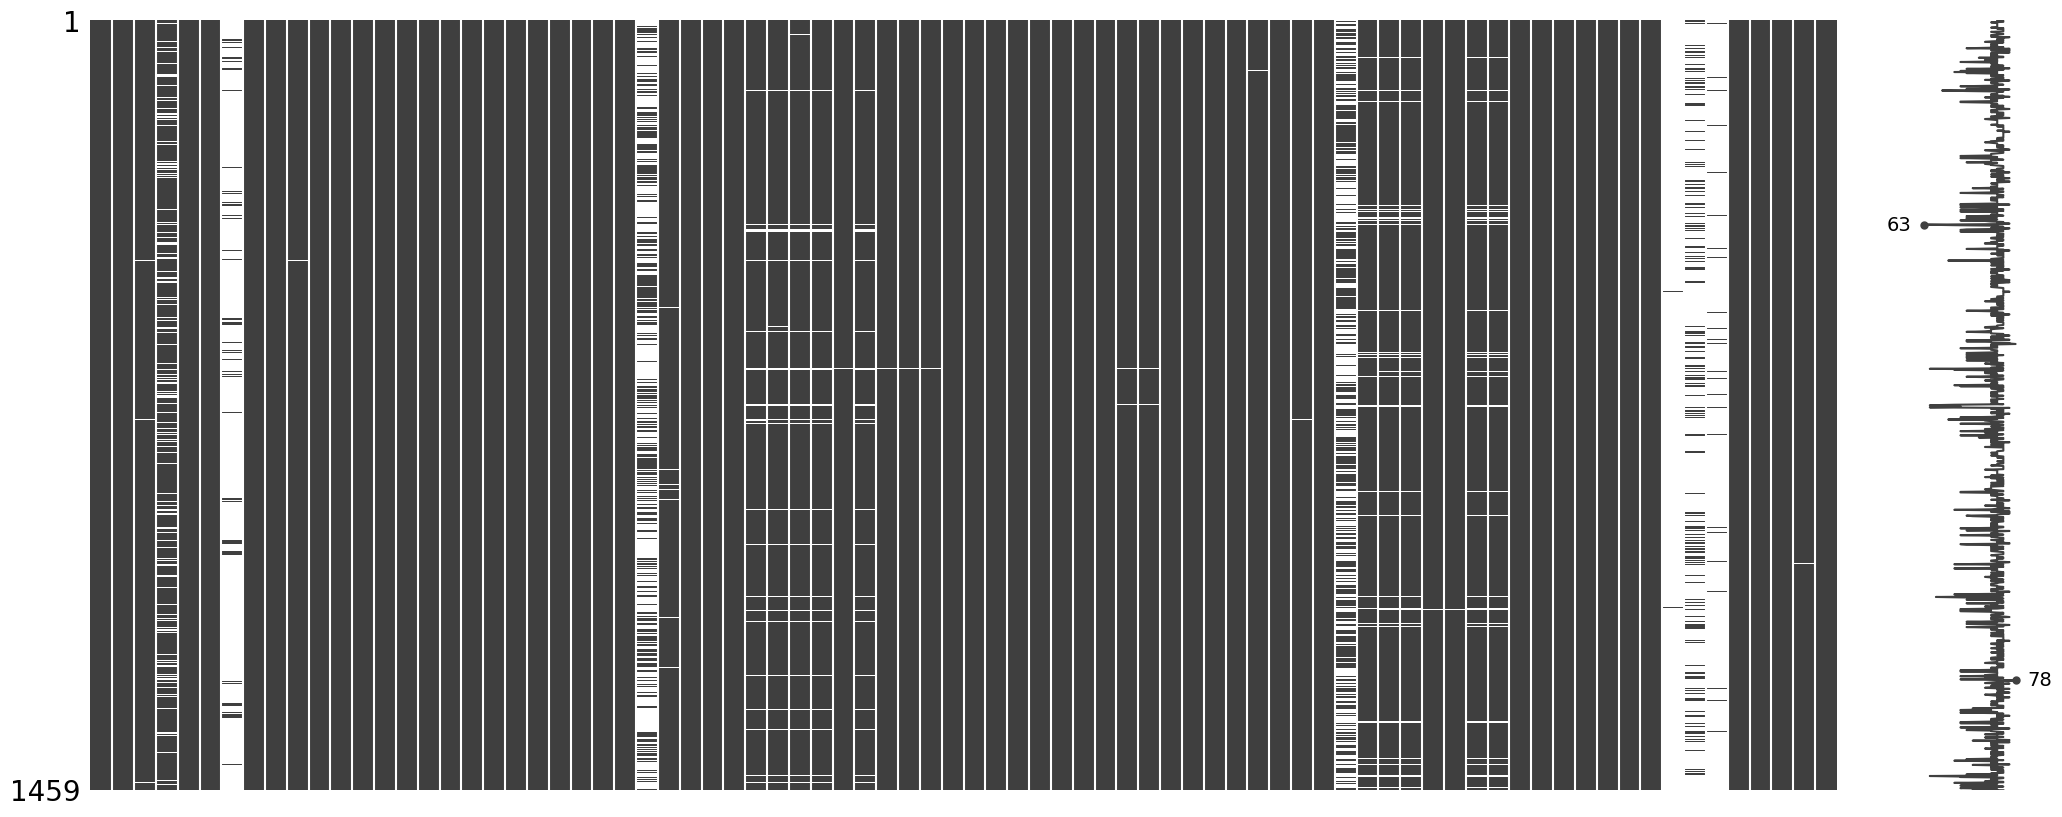

In [396]:
missing_values_test = missing_values(df_test)

In [397]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [398]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## 4.2 Feature Analysis


* Categorical variables consist of values that fall into one of two or more categories, typically without an inherent order.
* Numerical variables, on the other hand, have a continuous range of values. Examples from our dataset include the Age and Fare features.


### Categorical Variables

#### MSSubClass

This is the value counts for the column MSSubClass :
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column MSSubClass :
    MSSubClass      SalePrice
5           60  239948.501672
11         120  200779.080460
7           75  192437.500000
0           20  185224.811567
8           80  169736.551724
6           70  166772.416667
2           40  156125.000000
9           85  147810.000000
4           50  143302.972222
12         160  138647.380952
10          90  133541.076923
14         190  129613.333333
3           45  108591.666667
13         180  102300.000000
1           30   95829.724638


------------------------------------------
Creating a bar plot for the MSSubClass column with respect to SalePrice ...




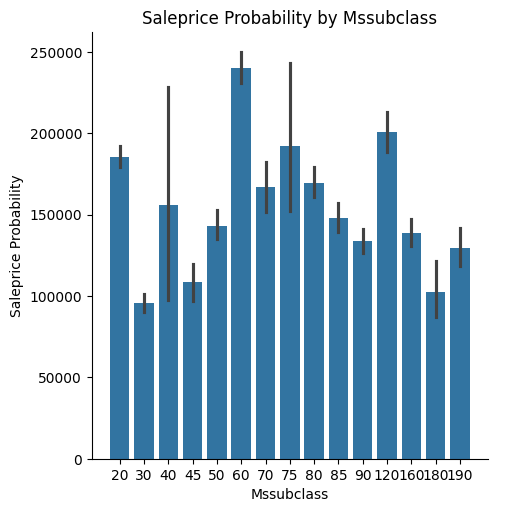

In [399]:
categorical_variables_visualization(df_train, 'MSSubClass', target='SalePrice', visualization='bar')

In [400]:
print(df_train[['MSSubClass', 'SalePrice']].groupby('MSSubClass', as_index=False).mean().sort_values('SalePrice', ascending=False))


    MSSubClass      SalePrice
5           60  239948.501672
11         120  200779.080460
7           75  192437.500000
0           20  185224.811567
8           80  169736.551724
6           70  166772.416667
2           40  156125.000000
9           85  147810.000000
4           50  143302.972222
12         160  138647.380952
10          90  133541.076923
14         190  129613.333333
3           45  108591.666667
13         180  102300.000000
1           30   95829.724638


The output presents the average sale prices grouped by MSSubClass. Subclass 60 has the highest average sale price at approximately $239,948, while subclass 30 has the lowest at around $95,830. This distribution demonstrates a clear variation in property values across different building classes, which could provide valuable insights for pricing strategies and predictive modeling in real estate analysis.

#### MSZoning

This is the value counts for the column MSZoning :
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column MSZoning :
  MSZoning      SalePrice
1       FV  214014.061538
3       RL  191004.994787
2       RH  131558.375000
4       RM  126316.830275
0  C (all)   74528.000000


------------------------------------------
Creating a bar plot for the MSZoning column with respect to SalePrice ...




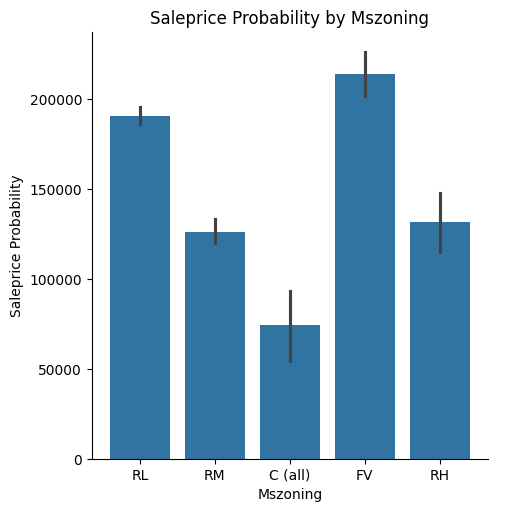

In [401]:
categorical_variables_visualization(df_train, 'MSZoning', 'SalePrice', 'bar')

The analysis shows the mean sale prices grouped by MSZoning categories. The Floating Village Residential (FV) zone has the highest average sale price at approximately $214,014, followed by Residential Low Density (RL) at $191,005. Conversely, the C (all) zone, representing commercial areas, has the lowest average sale price at $74,528. This suggests that zoning classifications play a significant role in determining property values, with residential zones generally commanding higher prices.

#### Street

This is the value counts for the column Street :
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Street :
  Street      SalePrice
1   Pave  181130.538514
0   Grvl  130190.500000


------------------------------------------
Creating a bar plot for the Street column with respect to SalePrice ...




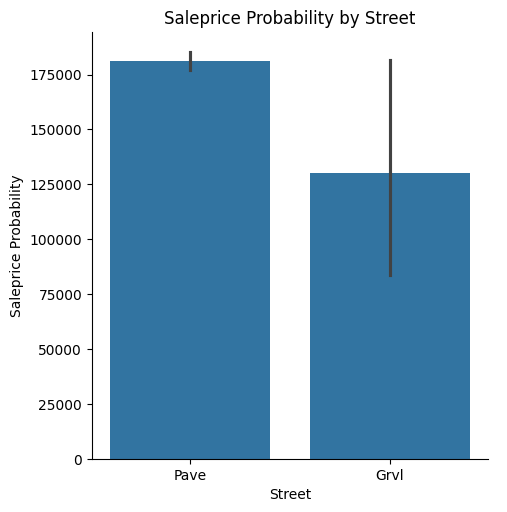

In [402]:
categorical_variables_visualization(df_train, 'Street', 'SalePrice', 'bar')

The analysis of Street types shows that properties on Pave (paved) streets have a significantly higher average sale price of approximately $181,131, compared to those on Grvl (gravel) streets, which average $130,190. This indicates that paved streets likely contribute positively to property value.

#### Street and MSZoning

This is the value counts for the columns Street and MSZoning :
Street  MSZoning
Pave    RL          1148
        RM           217
        FV            65
        RH            16
        C (all)        8
Grvl    RL             3
        C (all)        2
        RM             1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical columns Street and MSZoning :
  Street MSZoning      SalePrice
4   Pave       FV  214014.061538
6   Pave       RL  191038.849303
1   Grvl       RL  178050.000000
5   Pave       RH  131558.375000
7   Pave       RM  126392.023041
2   Grvl       RM  110000.000000
3   Pave  C (all)   76035.875000
0   Grvl  C (all)   68496.500000


------------------------------------------
Creating a bar plot for the Street and MSZoning columns with respect to SalePrice ...




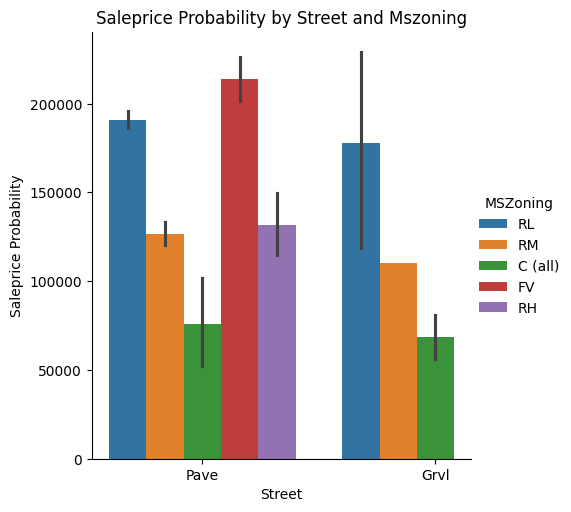

In [403]:
categorical_variables_visualization(df_train, 'Street', 'SalePrice', 'bar', 'MSZoning')

The combined analysis of Street and MSZoning reveals notable trends: properties in FV zoning on Pave streets achieve the highest average sale price of approximately $214,014. Conversely, properties in C (all) zoning on Grvl streets have the lowest average price at $68,497. Paved streets generally enhance property values across zoning categories.

#### Alley

In the dataset, the Alley column contains missing values (NaN), which represent properties that have no alley access. To make the data more interpretable, we will replace the missing values (NaN) with a new value, "NoAL," to explicitly indicate that there is no alley access for those properties. This modification will improve the clarity of the dataset when analyzing properties with or without alley access.

In [404]:
df_train['Alley'] = df_train['Alley'].fillna('NoAl')
df_test['Alley'] = df_test['Alley'].fillna('NoAl')

This is the value counts for the column Alley :
Alley
NoAl    1369
Grvl      50
Pave      41
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Alley :
  Alley      SalePrice
1  NoAl  183452.131483
2  Pave  168000.585366
0  Grvl  122219.080000


------------------------------------------
Creating a bar plot for the Alley column with respect to SalePrice ...




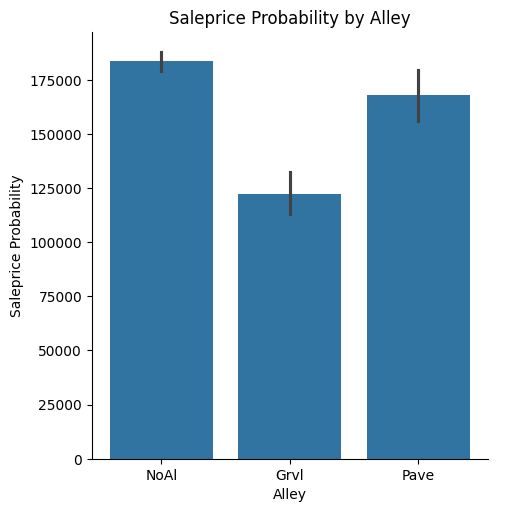

In [405]:
categorical_variables_visualization(df_train, 'Alley', 'SalePrice', 'bar')

The analysis of the Alley column reveals that properties with "No Alley" access (NoAL) have the highest average sale price at approximately $183,452. This is followed by properties with "Pave" (paved) alley access, averaging around $168,001. Properties with "Grvl" (gravel) alley access have the lowest average sale price at about $122,219. This suggests that properties without alley access or with paved alleys tend to be priced higher than those with gravel alleys.

#### Alley and Street

This is the value counts for the columns Alley and Street :
Alley  Street
NoAl   Pave      1363
Grvl   Pave        50
Pave   Pave        41
NoAl   Grvl         6
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical columns Alley and Street :
  Alley Street      SalePrice
2  NoAl   Pave  183686.592076
3  Pave   Pave  168000.585366
1  NoAl   Grvl  130190.500000
0  Grvl   Pave  122219.080000


------------------------------------------
Creating a bar plot for the Alley and Street columns with respect to SalePrice ...




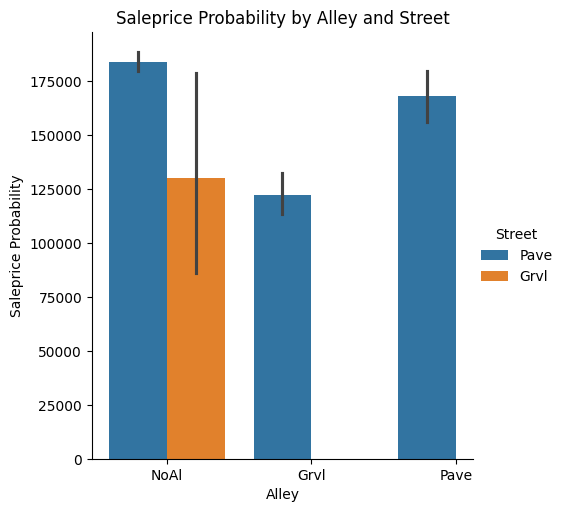

In [406]:
categorical_variables_visualization(df_train, 'Alley', 'SalePrice', 'bar', 'Street')

The combined analysis of Alley and Street reveals interesting patterns in property prices. Properties with "NoAl" (No Alley) access on paved streets (Pave) have the highest average sale price at approximately $183,687. This is followed by properties with "Pave" (Paved) alley access on paved streets, averaging around $168,001. Properties with "Grvl" (Gravel) alley access, whether on paved (Pave) or gravel (Grvl) streets, have lower average prices, with the lowest being those with "Grvl" alley access on gravel streets, averaging $122,219. This indicates that both alley type and street type influence the property's sale price, with properties on paved streets generally fetching higher prices.

#### Alley and MSZoning

This is the value counts for the columns Alley and MSZoning :
Alley  MSZoning
NoAl   RL          1131
       RM           175
       FV            41
Grvl   RM            36
Pave   FV            24
Grvl   RL            14
NoAl   RH            14
       C (all)        8
Pave   RM             7
       RL             6
       C (all)        2
       RH             2
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical columns Alley and MSZoning :
   Alley MSZoning      SalePrice
3   NoAl       FV  236282.414634
5   NoAl       RL  192038.991158
9   Pave       RH  179717.000000
10  Pave       RL  176333.333333
8   Pave       FV  175972.291667
11  Pave       RM  157782.714286
1   Grvl       RM  125508.444444
6   NoAl       RM  125224.491429
4   NoAl       RH  124678.571429
0   Grvl       RL  113760.714286
2   NoAl  C (all)   75313.000000
7   Pave  C (all)   71388.000000


----------------------------------

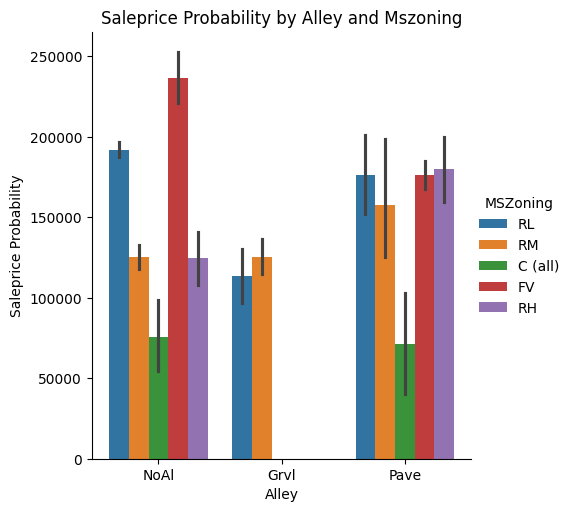

In [407]:
categorical_variables_visualization(df_train, 'Alley', 'SalePrice', 'bar', 'MSZoning')

#### LotShape

This is the value counts for the column LotShape :
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column LotShape :
  LotShape      SalePrice
1      IR2  239833.365854
2      IR3  216036.500000
0      IR1  206101.665289
3      Reg  164754.818378


------------------------------------------
Creating a bar plot for the LotShape column with respect to SalePrice ...




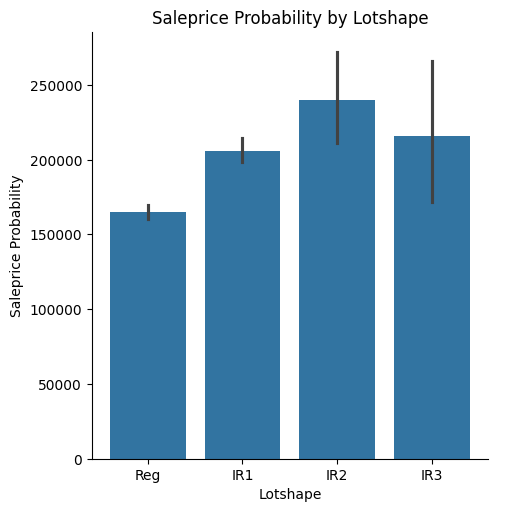

In [408]:
categorical_variables_visualization(df_train, 'LotShape', 'SalePrice', 'bar')

The analysis of the LotShape column shows a clear correlation between the shape of the property lot and the sale price. Properties with moderately irregular lots (IR2) have the highest average sale price at approximately $239,833. This is followed by properties with irregular lots (IR3), which have an average sale price of about $216,037. Slightly irregular lots (IR1) also maintain a relatively high average price of $206,102, while properties with regular-shaped lots (Reg) have the lowest average sale price at approximately $164,755. This suggests that irregular lot shapes may be more desirable or possibly rarer, leading to higher property prices compared to regular-shaped lots.

### LotShape and Alley

This is the value counts for the columns LotShape and Alley :
LotShape  Alley
Reg       NoAl     848
IR1       NoAl     473
Reg       Grvl      45
IR2       NoAl      39
Reg       Pave      32
IR3       NoAl       9
IR1       Pave       7
          Grvl       4
IR2       Pave       2
IR3       Grvl       1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical columns LotShape and Alley :
  LotShape Alley      SalePrice
3      IR2  NoAl  243018.820513
6      IR3  NoAl  231929.444444
2      IR1  Pave  207568.428571
1      IR1  NoAl  206851.642706
4      IR2  Pave  177717.000000
8      Reg  NoAl  167146.275943
9      Reg  Pave  158737.843750
7      Reg  Grvl  123967.866667
0      IR1  Grvl  114850.000000
5      IR3  Grvl   73000.000000


------------------------------------------
Creating a bar plot for the LotShape and Alley columns with respect to SalePrice ...




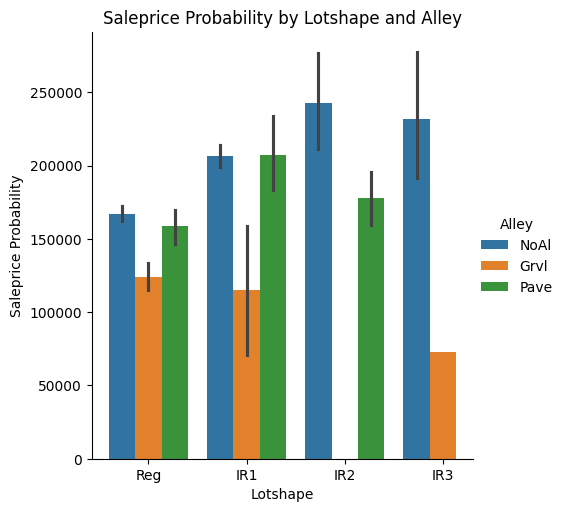

In [409]:
categorical_variables_visualization(df_train, 'LotShape', 'SalePrice', 'bar', 'Alley')

The analysis of the LotShape and Alley columns together indicates that the combination of lot shape and alley access significantly impacts the average sale price. Properties with moderately irregular (IR2) and irregular (IR3) lots have the highest average sale prices when there is no alley access (NoAl), with prices of $243,019 and $231,929, respectively. In contrast, properties with slightly irregular lots (IR1) and paved alley access (Pave) have a lower average sale price of around $207,568, while regular-shaped lots (Reg) have the lowest prices, with no alley access averaging $167,146 and paved alley access at $158,738. This suggests that properties with irregular lots and no alley access are more desirable in terms of sale price, while regular lots with paved alleys tend to be the least expensive.

#### LandContour

This is the value counts for the column LandContour :
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column LandContour :
  LandContour      SalePrice
1         HLS  231533.940000
2         Low  203661.111111
3         Lvl  180183.746758
0         Bnk  143104.079365


------------------------------------------
Creating a bar plot for the LandContour column with respect to SalePrice ...




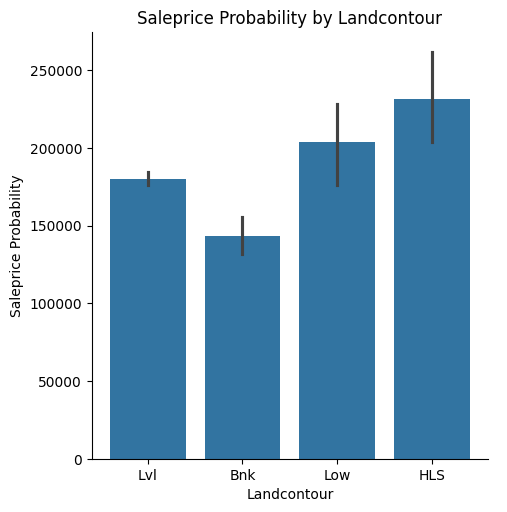

In [410]:
categorical_variables_visualization(df_train, 'LandContour', 'SalePrice', 'bar')

The LandContour column, which describes the flatness or slope of the property, shows how topography can influence property values. Properties located on a hillside (HLS) have the highest average sale price of approximately $231,534, suggesting that properties with a more dramatic elevation change are more desirable. Properties in a depression (Low) or near-flat (Lvl) areas have a lower average sale price, with Low priced at $203,661 and Lvl at $180,184. Properties with a banked contour (Bnk), which are located on a quick rise from street grade to building, tend to have the lowest average sale price of around $143,104. This implies that topographical features like hillsides and depressions have a significant impact on the sale price of properties, with level land generally being less expensive.

### LandContour and LotShape

This is the value counts for the columns LandContour and LotShape :
LandContour  LotShape
Lvl          Reg         861
             IR1         416
Bnk          Reg          39
HLS          IR1          32
Lvl          IR2          29
Bnk          IR1          19
Low          IR1          17
HLS          Reg          13
Low          Reg          12
             IR2           5
Lvl          IR3           5
HLS          IR2           4
Bnk          IR2           3
             IR3           2
Low          IR3           2
HLS          IR3           1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical columns LandContour and LotShape :
   LandContour LotShape      SalePrice
5          HLS      IR2  348445.000000
10         Low      IR3  295000.000000
6          HLS      IR3  274725.000000
4          HLS      IR1  243759.875000
13         Lvl      IR2  233584.620690
9          Low      IR2  231200.00000

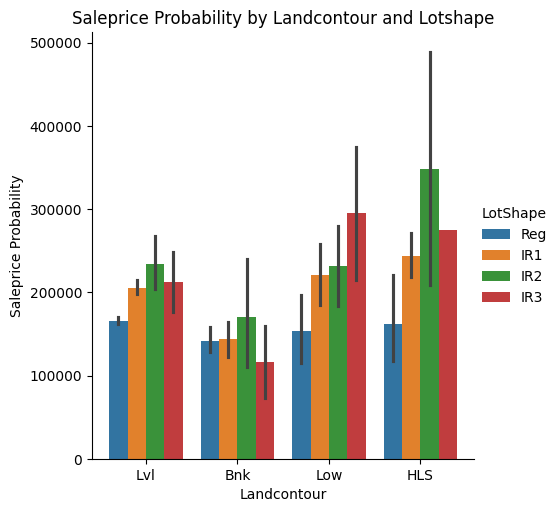

In [411]:
categorical_variables_visualization(df_train, 'LandContour', 'SalePrice', 'bar', 'LotShape')

#### Utilities

This is the value counts for the column Utilities :
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Utilities :
  Utilities     SalePrice
0    AllPub  180950.95682
1    NoSeWa  137500.00000


------------------------------------------
Creating a bar plot for the Utilities column with respect to SalePrice ...




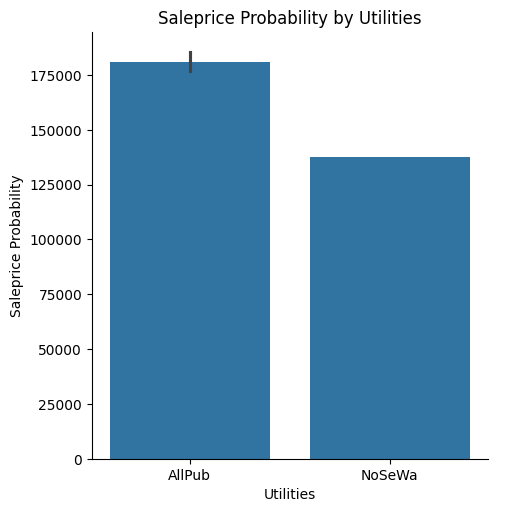

In [412]:
categorical_variables_visualization(df_train, 'Utilities', 'SalePrice', 'bar')

The Utilities column reflects the type of utility services available to a property, which can have an impact on the sale price. Properties with access to AllPub (All public utilities: electricity, gas, water, and sewer) have a higher average sale price of approximately $180,951. On the other hand, properties with limited utility access, such as NoSeWa (Electricity and Gas only), have a significantly lower average sale price of around $137,500. This suggests that full utility access is a key factor in determining property value, with properties having more comprehensive utility services commanding higher prices.

#### LotConfig

This is the value counts for the column LotConfig :
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column LotConfig :
  LotConfig      SalePrice
1   CulDSac  223854.617021
3       FR3  208475.000000
0    Corner  181623.425856
2       FR2  177934.574468
4    Inside  176938.047529


------------------------------------------
Creating a bar plot for the LotConfig column with respect to SalePrice ...




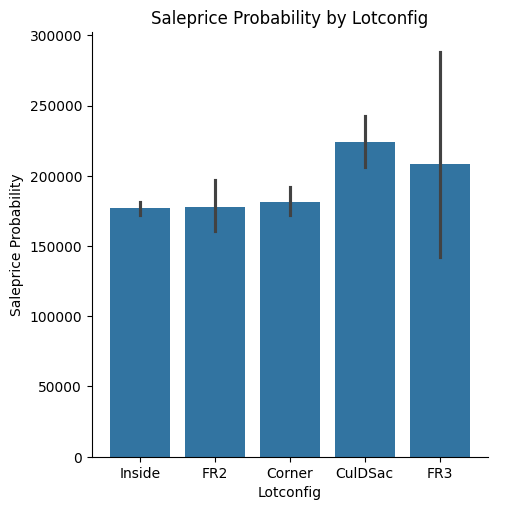

In [413]:
categorical_variables_visualization(df_train, 'LotConfig', 'SalePrice', 'bar')

The LotConfig column describes the configuration of a property's lot, and it plays a notable role in the property's sale price. Properties located in a CulDSac (Cul-de-sac) typically have the highest average sale price, around $223,855, likely due to the privacy and exclusivity associated with such locations. FR3 (Frontage on 3 sides) properties follow closely with an average sale price of $208,475, indicating a desirable, more spacious configuration. Corner lots have a moderate average sale price of $181,623, while properties with FR2 (Frontage on 2 sides) and Inside lots have slightly lower average prices, at approximately $177,935 and $176,938, respectively. This suggests that the more unique or accessible lot configurations, like cul-de-sac and multi-frontage lots, tend to command higher sale prices.

#### LotConfig and LotShape

This is the value counts for the columns LotConfig and LotShape :
LotConfig  LotShape
Inside     Reg         748
           IR1         284
Corner     Reg         146
           IR1         107
CulDSac    IR1          77
FR2        Reg          27
           IR1          15
CulDSac    IR2          14
Inside     IR2          14
Corner     IR2           8
Inside     IR3           6
FR2        IR2           5
FR3        Reg           3
CulDSac    IR3           2
Corner     IR3           2
CulDSac    Reg           1
FR3        IR1           1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical columns LotConfig and LotShape :
   LotConfig LotShape      SalePrice
5    CulDSac      IR2  296084.285714
12       FR3      Reg  235300.000000
14    Inside      IR2  229906.285714
6    CulDSac      IR3  227862.500000
15    Inside      IR3  214273.333333
0     Corner      IR1  212251.514019
4    CulDSac      IR1  

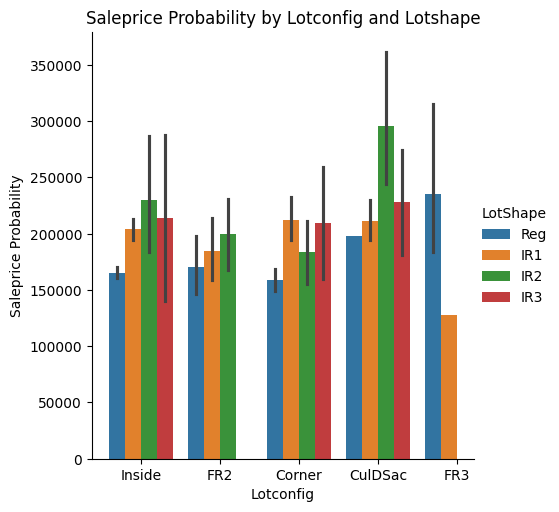

In [414]:
categorical_variables_visualization(df_train, 'LotConfig', 'SalePrice', 'bar', 'LotShape')

# LandSlope

This is the value counts for the column LandSlope :
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column LandSlope :
  LandSlope      SalePrice
2       Sev  204379.230769
1       Mod  196734.138462
0       Gtl  179956.799566


------------------------------------------
Creating a bar plot for the LandSlope column with respect to SalePrice ...




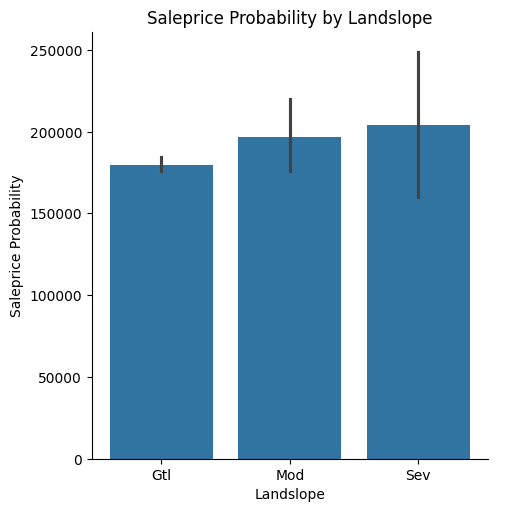

In [415]:
categorical_variables_visualization(df_train, 'LandSlope', 'SalePrice', 'bar')

The LandSlope column indicates the steepness or gradient of the property. Severe slope (Sev) properties tend to have a higher average sale price, approximately $204,379, potentially due to their unique or scenic locations. Moderate slope (Mod) properties come next with an average sale price of $196,734, indicating that some slope is acceptable for buyers. On the other hand, properties with a Gentle slope (Gtl), which are likely the easiest to build on and develop, have the lowest average sale price of $179,957, suggesting that flatter terrains are more common and therefore less expensive in comparison.

#### Neighborhood

In [416]:
categorical_variables_visualization(df_train, 'Neighborhood', 'SalePrice')

This is the value counts for the column Neighborhood :
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Neighborhood :
   Neighborhood      SalePrice
15      NoRidge  335295.317073
16      NridgHt  316270.623377
22      StoneBr  310499.000000
23       Timber  242247.447368
24      Veenker  238772.727273
21      Somerst  225379.837209
4       ClearCr  212565.428571
6       Crawfor  210624.725490
5       CollgCr  197965.773333
0       Blmngtn  194870.882353
8       Gilbert  192854.506329
14       NWAmes  189050

In [417]:
print(df_train[['Neighborhood', 'SalePrice']].groupby('Neighborhood', as_index=False).mean().sort_values('SalePrice', ascending=False))

   Neighborhood      SalePrice
15      NoRidge  335295.317073
16      NridgHt  316270.623377
22      StoneBr  310499.000000
23       Timber  242247.447368
24      Veenker  238772.727273
21      Somerst  225379.837209
4       ClearCr  212565.428571
6       Crawfor  210624.725490
5       CollgCr  197965.773333
0       Blmngtn  194870.882353
8       Gilbert  192854.506329
14       NWAmes  189050.068493
20      SawyerW  186555.796610
11      Mitchel  156270.122449
12        NAmes  145847.080000
13      NPkVill  142694.444444
18        SWISU  142591.360000
1       Blueste  137500.000000
19       Sawyer  136793.135135
17      OldTown  128225.300885
7       Edwards  128219.700000
3       BrkSide  124834.051724
2        BrDale  104493.750000
9        IDOTRR  100123.783784
10      MeadowV   98576.470588


The Neighborhood column categorizes the properties based on their location within the city or town. Here's a brief summary of the relationship between neighborhood and the target variable SalePrice:

    NoRidge and NridgHt have the highest average sale prices, approximately $335,295 and $316,270, respectively. These neighborhoods are likely considered premium, with desirable features like scenic views or higher demand.
    StoneBr also commands a significant price of around $310,499, indicating it is another high-value area.
    Mid-tier neighborhoods such as Timber, Veenker, and Somerst range from about $238,773 to $225,380, showing that while they are valuable, they are not as expensive as the top-tier areas.
    Crawfor, CollgCr, and ClearCr are lower-priced compared to the high-end neighborhoods, ranging from $212,565 to $197,966.
    Blmngtn, Gilbert, and NWAmes fall into the more affordable neighborhood categories, with sale prices between $192,855 and $145,847.
    SawyerW, Mitchel, and NAmes are further down the list with prices ranging from $156,270 to $136,793.
    The lowest-priced neighborhoods like BrkSide, BrDale, IDOTRR, and MeadowV show much lower average sale prices, with MeadowV at just $98,576.

#### Condition1

This is the value counts for the column Condition1 :
Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Condition1 :
  Condition1      SalePrice
3       PosA  225875.000000
4       PosN  215184.210526
8       RRNn  212400.000000
7       RRNe  190750.000000
2       Norm  184495.492063
6       RRAn  184396.615385
1      Feedr  142475.481481
5       RRAe  138400.000000
0     Artery  135091.666667


------------------------------------------
Creating a bar plot for the Condition1 column with respect to SalePrice ...




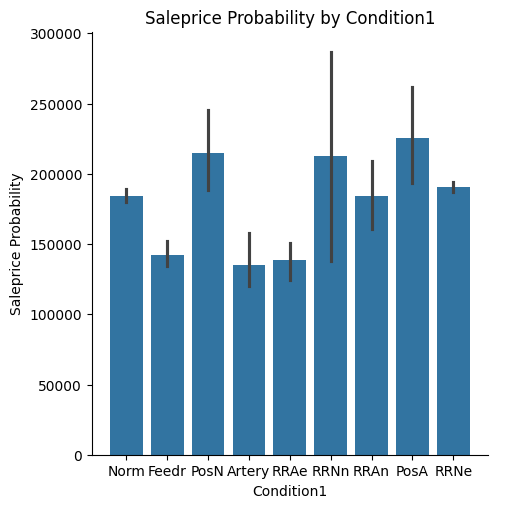

In [418]:
categorical_variables_visualization(df_train, 'Condition1', 'SalePrice', 'bar')

The Condition1 column categorizes properties based on their proximity to various off-site conditions, such as streets, railroads, or parks. Properties adjacent to positive features, such as PosA (Adjacent to positive off-site feature) and PosN (Near positive off-site feature), have the highest average sale prices, around $225,875 and $215,184, respectively. On the other hand, properties near arterial streets (Artery) tend to have the lowest sale prices, with Feedr (Adjacent to feeder street) and RRAe (Adjacent to East-West Railroad) also showing relatively lower prices.

#### Condition2

This is the value counts for the column Condition1 :
Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Condition1 :
  Condition1      SalePrice
3       PosA  225875.000000
4       PosN  215184.210526
8       RRNn  212400.000000
7       RRNe  190750.000000
2       Norm  184495.492063
6       RRAn  184396.615385
1      Feedr  142475.481481
5       RRAe  138400.000000
0     Artery  135091.666667


------------------------------------------
Creating a bar plot for the Condition1 column with respect to SalePrice ...




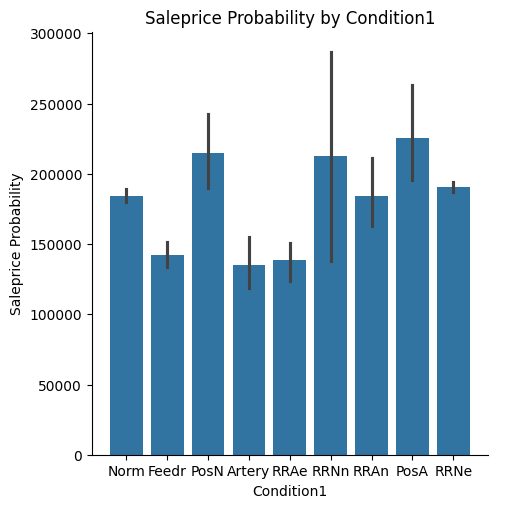

In [419]:
categorical_variables_visualization(df_train, 'Condition1', 'SalePrice', 'bar')

The Condition2 column captures properties with multiple proximity features, such as being close to arterial streets, railroads, or positive off-site features. Properties with PosA (Adjacent to positive off-site feature) and PosN (Near positive off-site feature) exhibit the highest mean sale prices, reaching around $225,875 and $215,184, respectively. In contrast, properties near Artery (Adjacent to arterial street) have the lowest average sale prices, with other proximity conditions like Feedr (Adjacent to feeder street) and RRAe (Adjacent to East-West Railroad) also showing comparatively lower prices.

#### BldgType

This is the value counts for the column BldgType :
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column BldgType :
  BldgType      SalePrice
0     1Fam  185763.807377
4   TwnhsE  181959.342105
3    Twnhs  135911.627907
2   Duplex  133541.076923
1   2fmCon  128432.258065


------------------------------------------
Creating a bar plot for the BldgType column with respect to SalePrice ...




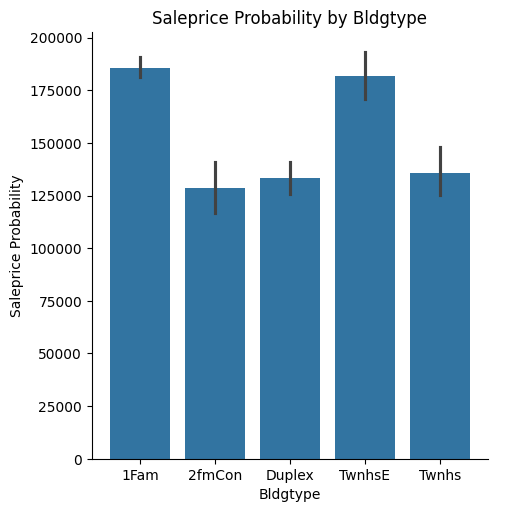

In [420]:
categorical_variables_visualization(df_train, 'BldgType', 'SalePrice', 'bar')

The BldgType column categorizes properties based on their building structure. Single-family Detached (1Fam) homes have the highest average sale price, at approximately $185,764, while Townhouses End Units (TwnhsE) follow closely with an average of $181,959. On the lower end, Two-family Conversions (2FmCon) and Duplexes show relatively lower sale prices, with the latter averaging around $133,541. This indicates a general trend where more independent housing structures tend to have higher sale prices compared to multi-unit or converted properties.

### HouseStyle

This is the value counts for the column HouseStyle :
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column HouseStyle :
  HouseStyle      SalePrice
3     2.5Fin  220000.000000
5     2Story  210051.764045
2     1Story  175985.477961
7       SLvl  166703.384615
4     2.5Unf  157354.545455
0     1.5Fin  143116.740260
6     SFoyer  135074.486486
1     1.5Unf  110150.000000


------------------------------------------
Creating a bar plot for the HouseStyle column with respect to SalePrice ...




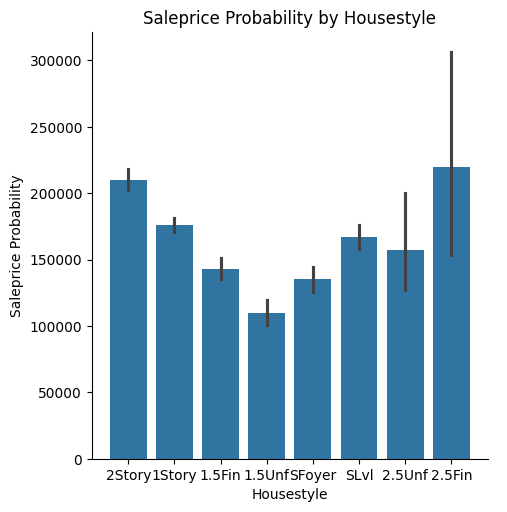

In [421]:
categorical_variables_visualization(df_train, 'HouseStyle', 'SalePrice', 'bar')

The HouseStyle column reflects different architectural styles of homes, with varying sale prices. Two and a half story finished (2.5Fin) homes command the highest average sale price of $220,000, followed by Two-story (2Story) homes at approximately $210,052. On the lower end, One and a half story unfinished (1.5Unf) properties have the lowest average sale price of $110,150, suggesting that homes with more completed levels tend to have higher values. This trend highlights the premium placed on more spacious, finished multi-story homes compared to smaller or unfinished ones.

#### OverallQual

This is the value counts for the column OverallQual :
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column OverallQual :
   OverallQual      SalePrice
9           10  438588.388889
8            9  367513.023256
7            8  274735.535714
6            7  207716.423197
5            6  161603.034759
4            5  133523.347607
3            4  108420.655172
2            3   87473.750000
1            2   51770.333333
0            1   50150.000000


------------------------------------------
Creating a bar plot for the OverallQual column with respect to SalePrice ...




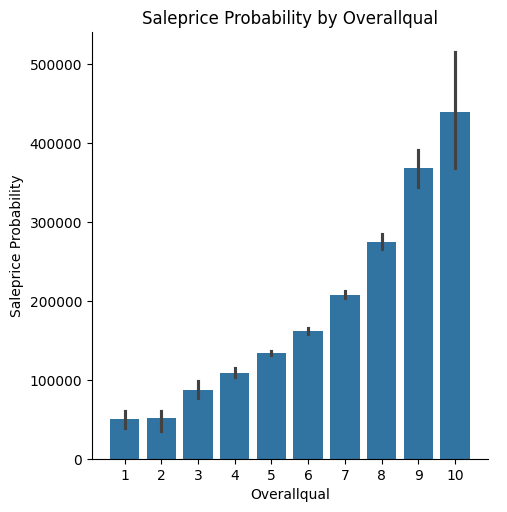

In [422]:
categorical_variables_visualization(df_train, 'OverallQual', 'SalePrice', 'bar')

#### OverallCond

This is the value counts for the column OverallCond :
OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column OverallCond :
   OverallCond      SalePrice
8            9  216004.545455
4            5  203146.914738
6            7  158145.487805
7            8  155651.736111
5            6  153961.591270
1            2  141986.400000
3            4  120438.438596
2            3  101929.400000
0            1   61000.000000


------------------------------------------
Creating a bar plot for the OverallCond column with respect to SalePrice ...




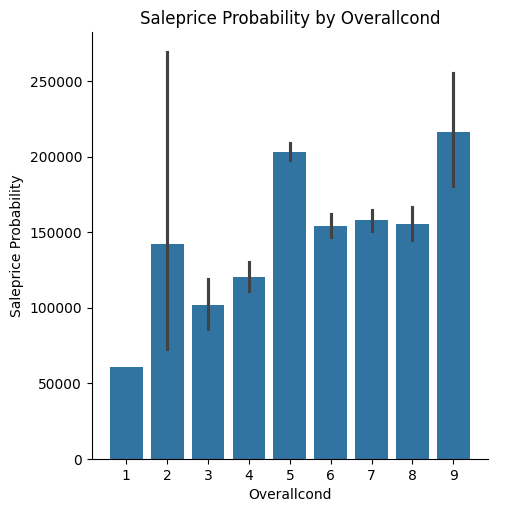

In [423]:
categorical_variables_visualization(df_train, 'OverallCond', 'SalePrice', 'bar')

#### RoofStyle

This is the value counts for the column RoofStyle :
RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column RoofStyle :
  RoofStyle      SalePrice
5      Shed  225000.000000
3       Hip  218876.933566
0      Flat  194690.000000
4   Mansard  180568.428571
1     Gable  171483.956179
2   Gambrel  148909.090909


------------------------------------------
Creating a bar plot for the RoofStyle column with respect to SalePrice ...




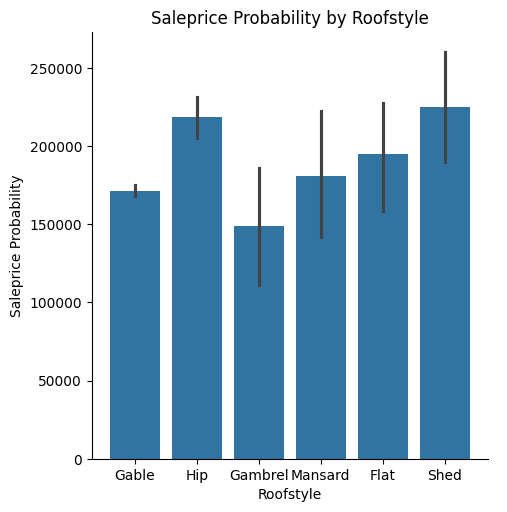

In [424]:
categorical_variables_visualization(df_train, 'RoofStyle', 'SalePrice', 'bar')

The RoofStyle column indicates various roof designs, each correlating with different sale prices. Shed roofs have the highest average sale price at $225,000, followed closely by Hip roofs at about $218,877. In contrast, Gambrel roofs, often seen on barn-style homes, have the lowest average sale price at approximately $148,909. This suggests that more contemporary or aesthetically valued roof styles like Shed and Hip tend to be associated with higher property values, while traditional or functional styles like Gambrel are generally linked to lower prices.

#### RoofMatl

This is the value counts for the column RoofMatl :
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column RoofMatl :
  RoofMatl      SalePrice
7  WdShngl  390250.000000
2  Membran  241500.000000
6  WdShake  241400.000000
5  Tar&Grv  185406.363636
3    Metal  180000.000000
1  CompShg  179803.679219
0  ClyTile  160000.000000
4     Roll  137000.000000


------------------------------------------
Creating a bar plot for the RoofMatl column with respect to SalePrice ...




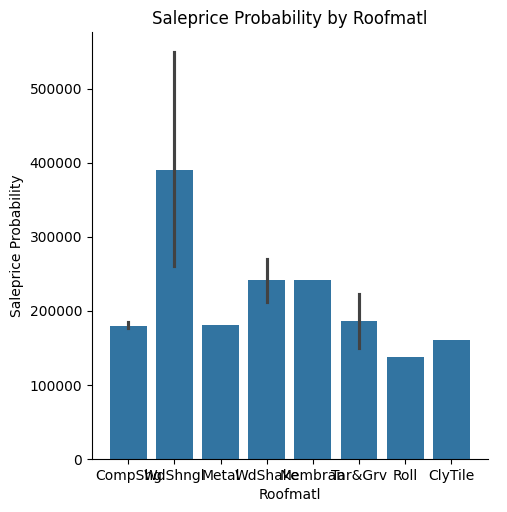

In [425]:
categorical_variables_visualization(df_train, 'RoofMatl', 'SalePrice', 'bar')

#### Exterior1st

This is the value counts for the column Exterior1st :
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Exterior1st :
   Exterior1st      SalePrice
7      ImStucc  262000.000000
10       Stone  258500.000000
5      CemntBd  231690.655738
12     VinylSd  213732.900971
3      BrkFace  194573.000000
9      Plywood  175942.379630
6      HdBoard  163077.450450
11      Stucco  162990.000000
14     WdShing  150655.076923
13     Wd Sdng  149841.645631
8      MetalSd  149422.177273
0      AsbShng  107385.550000
4       CBlock  105000.000000
1      AsphShn  100000.000000
2      BrkComm   71000.000000


------------------------------------------
Creating a bar plot for

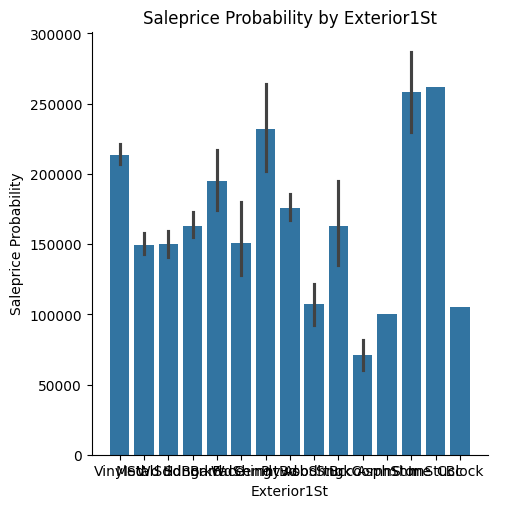

In [426]:
categorical_variables_visualization(df_train, 'Exterior1st', 'SalePrice', 'bar')

#### MasVnrType

In the MasVnrType column, which describes the type of masonry veneer used in a property, the possible categories are BrkCmn (Brick Common), BrkFace (Brick Face), CBlock (Cinder Block), None, and Stone. Any missing values (NaN) will be replaced with NoType to indicate that the masonry veneer type is not specified or unavailable for that property. This replacement ensures that the dataset remains consistent and avoids errors when analyzing or modeling, especially when handling categorical data.

In [427]:
df_train['MasVnrType'].fillna('NoType', inplace=True)
df_test['MasVnrType'].fillna('NoType', inplace=True)

This is the value counts for the column MasVnrType :
MasVnrType
NoType     872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column MasVnrType :
  MasVnrType      SalePrice
3      Stone  265583.625000
1    BrkFace  204691.871910
2     NoType  156958.243119
0     BrkCmn  146318.066667


------------------------------------------
Creating a bar plot for the MasVnrType column with respect to SalePrice ...




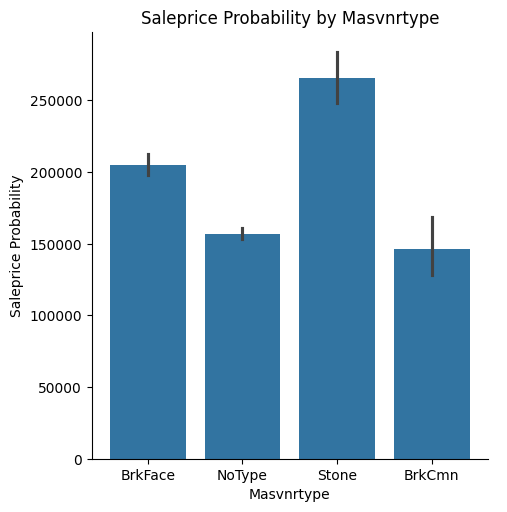

In [428]:
categorical_variables_visualization(df_train, 'MasVnrType', 'SalePrice', 'bar')

The MasVnrType column represents the type of masonry veneer on the property, with categories like BrkCmn (Brick Common), BrkFace (Brick Face), CBlock (Cinder Block), None, and Stone. The mean sale price of properties varies significantly based on this feature, with Stone having the highest average sale price, followed by BrkFace and BrkCmn, while properties with NoType have the lowest mean sale price.

#### ExterQual

This is the value counts for the column ExterQual :
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column ExterQual :
  ExterQual      SalePrice
0        Ex  367360.961538
2        Gd  231633.510246
3        TA  144341.313466
1        Fa   87985.214286


------------------------------------------
Creating a bar plot for the ExterQual column with respect to SalePrice ...




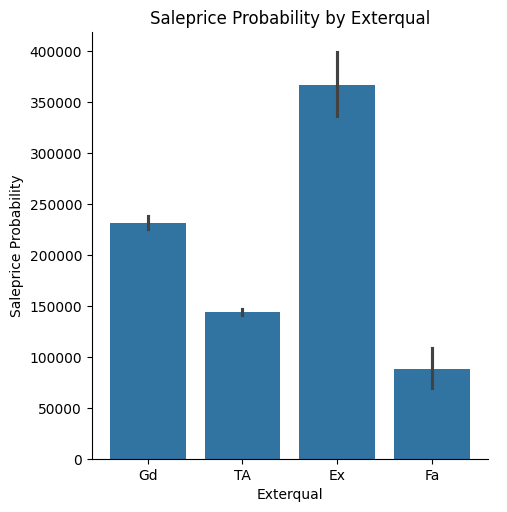

In [429]:
categorical_variables_visualization(df_train, 'ExterQual', 'SalePrice', 'bar')

#### ExterCond

This is the value counts for the column ExterCond :
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column ExterCond :
  ExterCond      SalePrice
0        Ex  201333.333333
4        TA  184034.896256
2        Gd  168897.568493
1        Fa  102595.142857
3        Po   76500.000000


------------------------------------------
Creating a bar plot for the ExterCond column with respect to SalePrice ...




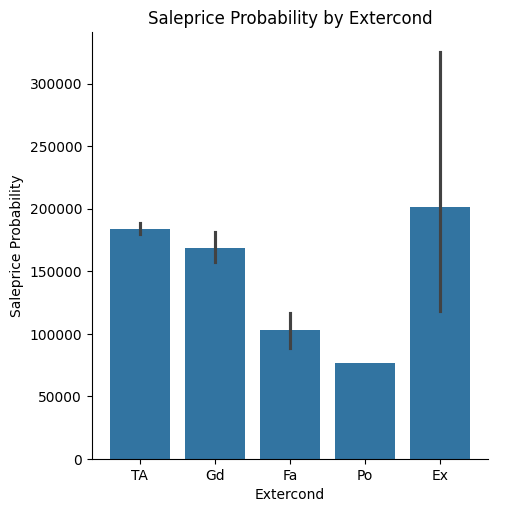

In [430]:
categorical_variables_visualization(df_train, 'ExterCond', 'SalePrice', 'bar')

#### Foundation

This is the value counts for the column Foundation :
Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Foundation :
  Foundation      SalePrice
2      PConc  225230.442040
5       Wood  185666.666667
4      Stone  165959.166667
1     CBlock  149805.714511
0     BrkTil  132291.075342
3       Slab  107365.625000


------------------------------------------
Creating a bar plot for the Foundation column with respect to SalePrice ...




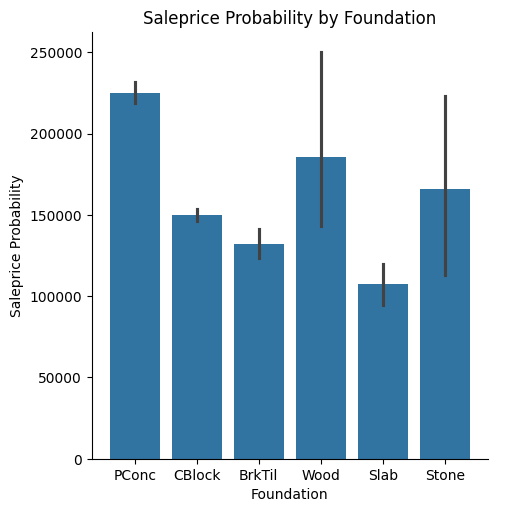

In [431]:
categorical_variables_visualization(df_train, 'Foundation', 'SalePrice', 'bar')

#### BsmtQual

The BsmtQual column evaluates the height of the basement, with categories like Ex (Excellent), Gd (Good), TA (Typical), Fa (Fair), Po (Poor), and NA (No Basement). We will replace the NA values with NoBas, indicating properties with no basement, to maintain consistency in the dataset.

In [432]:
df_train['BsmtQual'].fillna('NoBas', inplace=True)
df_test['BsmtQual'].fillna('NoBas', inplace=True)

This is the value counts for the column BsmtQual :
BsmtQual
TA       649
Gd       618
Ex       121
NoBas     37
Fa        35
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column BsmtQual :
  BsmtQual      SalePrice
0       Ex  327041.041322
2       Gd  202688.478964
4       TA  140759.818182
1       Fa  115692.028571
3    NoBas  105652.891892


------------------------------------------
Creating a bar plot for the BsmtQual column with respect to SalePrice ...




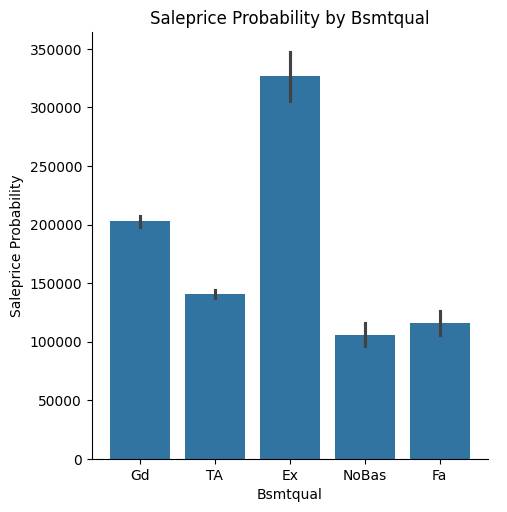

In [433]:
categorical_variables_visualization(df_train, 'BsmtQual', 'SalePrice', 'bar')

#### BsmtCond

Same here NaN = NoBas

In [434]:
df_train['BsmtCond'].fillna('NoBas', inplace=True)
df_test['BsmtCond'].fillna('NoBas', inplace=True)

This is the value counts for the column BsmtCond :
BsmtCond
TA       1311
Gd         65
Fa         45
NoBas      37
Po          2
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column BsmtCond :
  BsmtCond      SalePrice
1       Gd  213599.907692
4       TA  183632.620900
0       Fa  121809.533333
2    NoBas  105652.891892
3       Po   64000.000000


------------------------------------------
Creating a bar plot for the BsmtCond column with respect to SalePrice ...




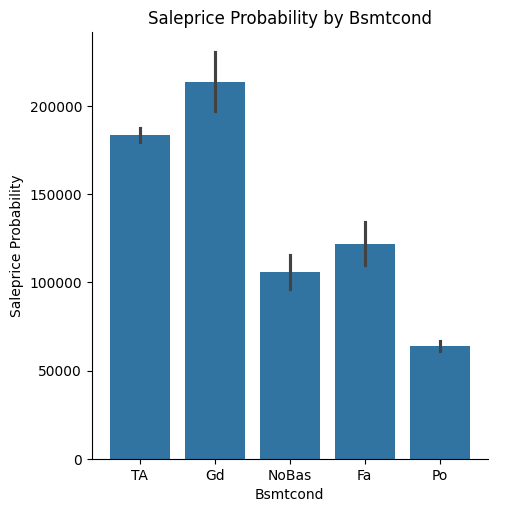

In [435]:
categorical_variables_visualization(df_train, 'BsmtCond', 'SalePrice', 'bar')

#### BsmtExposure

In [436]:
df_train['BsmtExposure'].fillna('NoBas', inplace=True)
df_test['BsmtExposure'].fillna('NoBas', inplace=True)

This is the value counts for the column BsmtExposure :
BsmtExposure
No       953
Av       221
Gd       134
Mn       114
NoBas     38
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column BsmtExposure :
  BsmtExposure      SalePrice
1           Gd  257689.805970
0           Av  206643.420814
2           Mn  192789.657895
3           No  165652.295908
4        NoBas  107938.342105


------------------------------------------
Creating a bar plot for the BsmtExposure column with respect to SalePrice ...




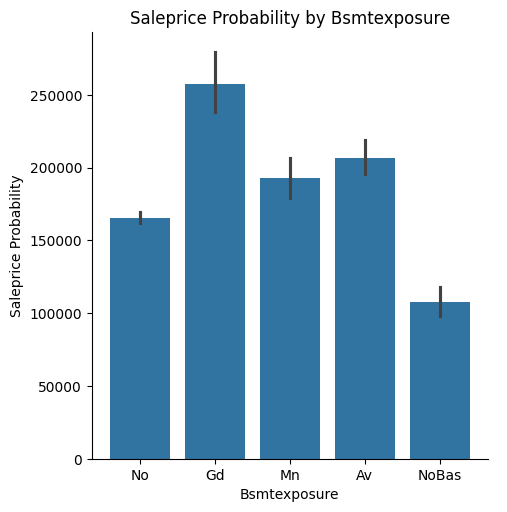

In [437]:
categorical_variables_visualization(df_train, 'BsmtExposure', 'SalePrice', 'bar')

#### BsmtFinType1

In [438]:
df_train['BsmtFinType1'].fillna('NoBas', inplace=True)
df_test['BsmtFinType1'].fillna('NoBas', inplace=True)

This is the value counts for the column BsmtFinType1 :
BsmtFinType1
Unf      430
GLQ      418
ALQ      220
BLQ      148
Rec      133
LwQ       74
NoBas     37
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column BsmtFinType1 :
  BsmtFinType1      SalePrice
2          GLQ  235413.720096
6          Unf  170670.576744
0          ALQ  161573.068182
3          LwQ  151852.702703
1          BLQ  149493.655405
5          Rec  146889.248120
4        NoBas  105652.891892


------------------------------------------
Creating a bar plot for the BsmtFinType1 column with respect to SalePrice ...




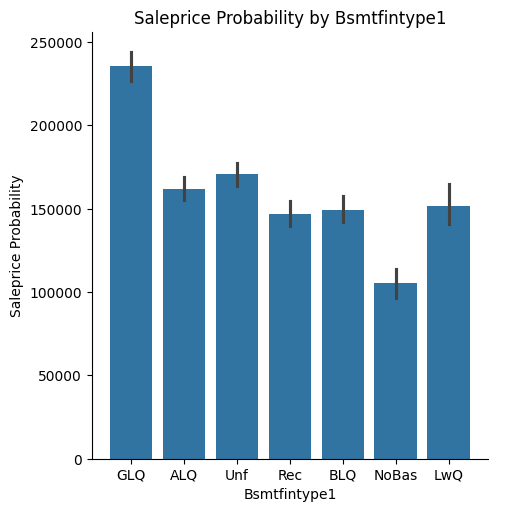

In [439]:
categorical_variables_visualization(df_train, 'BsmtFinType1', 'SalePrice', 'bar')

#### BsmtFinType2

In [440]:
df_train['BsmtFinType2'].fillna('NoBas', inplace=True)
df_test['BsmtFinType2'].fillna('NoBas', inplace=True)

This is the value counts for the column BsmtFinType2 :
BsmtFinType2
Unf      1256
Rec        54
LwQ        46
NoBas      38
BLQ        33
ALQ        19
GLQ        14
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column BsmtFinType2 :
  BsmtFinType2      SalePrice
0          ALQ  209942.105263
6          Unf  184694.690287
2          GLQ  180982.142857
5          Rec  164917.129630
3          LwQ  164364.130435
1          BLQ  151101.000000
4        NoBas  110346.236842


------------------------------------------
Creating a bar plot for the BsmtFinType2 column with respect to SalePrice ...




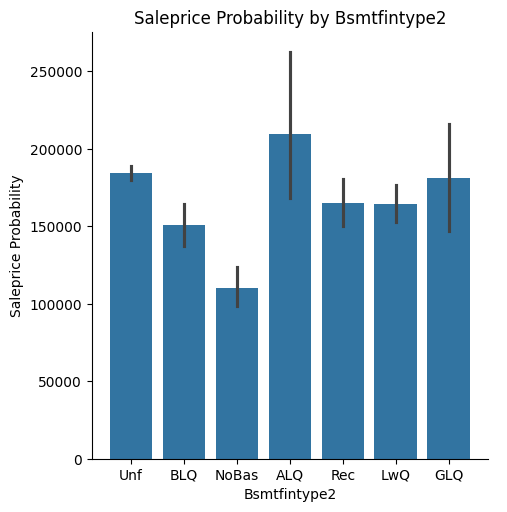

In [441]:
categorical_variables_visualization(df_train, 'BsmtFinType2', 'SalePrice', 'bar')

#### Heating

This is the value counts for the column Heating :
Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Heating :
  Heating      SalePrice
1    GasA  182021.195378
2    GasW  166632.166667
4    OthW  125750.000000
5    Wall   92100.000000
3    Grav   75271.428571
0   Floor   72500.000000


------------------------------------------
Creating a bar plot for the Heating column with respect to SalePrice ...




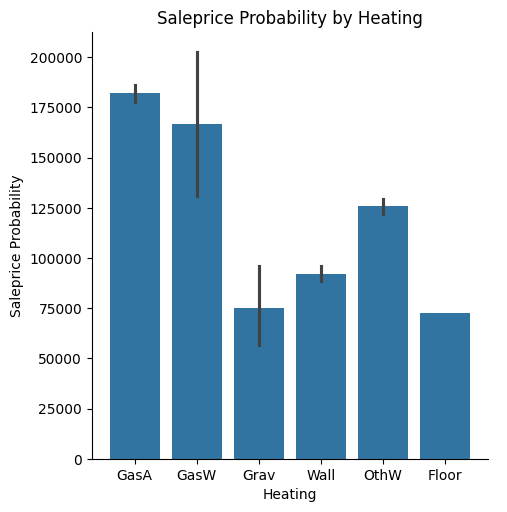

In [442]:
categorical_variables_visualization(df_train, 'Heating', 'SalePrice', 'bar')

#### HeatingQC

This is the value counts for the column HeatingQC :
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column HeatingQC :
  HeatingQC      SalePrice
0        Ex  214914.429150
2        Gd  156858.871369
4        TA  142362.876168
1        Fa  123919.489796
3        Po   87000.000000


------------------------------------------
Creating a bar plot for the HeatingQC column with respect to SalePrice ...




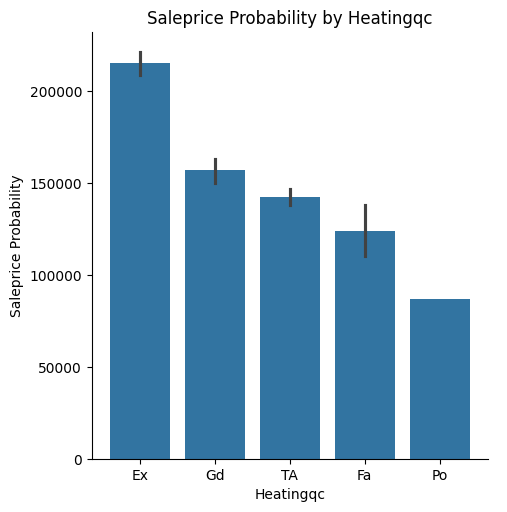

In [443]:
categorical_variables_visualization(df_train, 'HeatingQC', 'SalePrice', 'bar')

#### CentralAir

This is the value counts for the column CentralAir :
CentralAir
Y    1365
N      95
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column CentralAir :
  CentralAir      SalePrice
1          Y  186186.709890
0          N  105264.073684


------------------------------------------
Creating a bar plot for the CentralAir column with respect to SalePrice ...




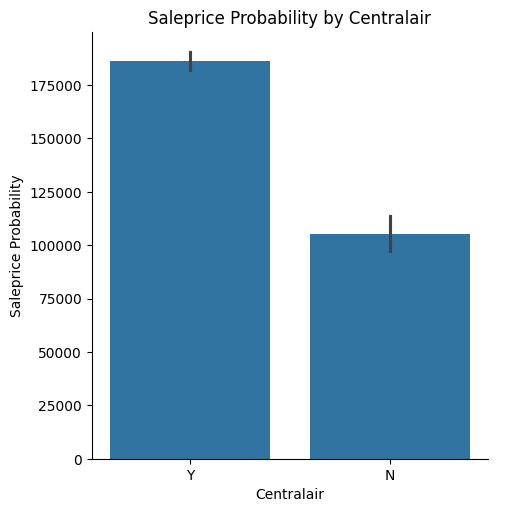

In [444]:
categorical_variables_visualization(df_train, 'CentralAir', 'SalePrice', 'bar')

The CentralAir column indicates whether a property has central air conditioning, with Y representing "Yes" and N representing "No." Based on the data, properties with central air conditioning (Y) tend to have higher average sale prices compared to those without it (N).

#### Electrical

This is the value counts for the column Electrical :
Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Electrical :
  Electrical      SalePrice
4      SBrkr  186825.113193
0      FuseA  122196.893617
1      FuseF  107675.444444
2      FuseP   97333.333333
3        Mix   67000.000000


------------------------------------------
Creating a bar plot for the Electrical column with respect to SalePrice ...




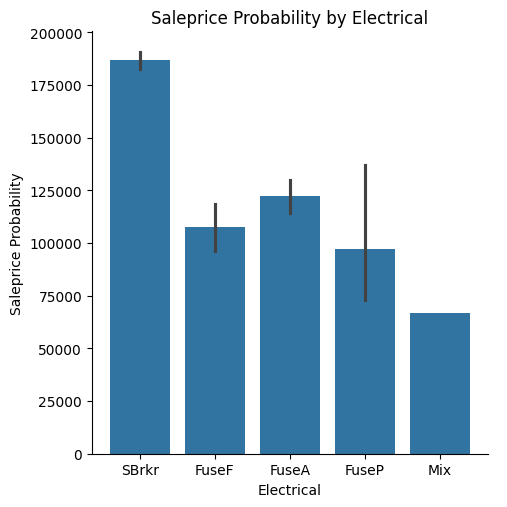

In [445]:
categorical_variables_visualization(df_train, 'Electrical', 'SalePrice', 'bar')

The Electrical column categorizes the type of electrical system in a house. Properties with SBrkr (Standard Circuit Breakers & Romex) tend to have the highest average sale prices, while those with older systems such as FuseP (60 AMP Fuse Box and mostly knob & tube wiring) or Mix (Mixed system) are associated with lower average sale prices.

#### KitchenQual

This is the value counts for the column KitchenQual :
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column KitchenQual :
  KitchenQual      SalePrice
0          Ex  328554.670000
2          Gd  212116.023891
3          TA  139962.511565
1          Fa  105565.205128


------------------------------------------
Creating a bar plot for the KitchenQual column with respect to SalePrice ...




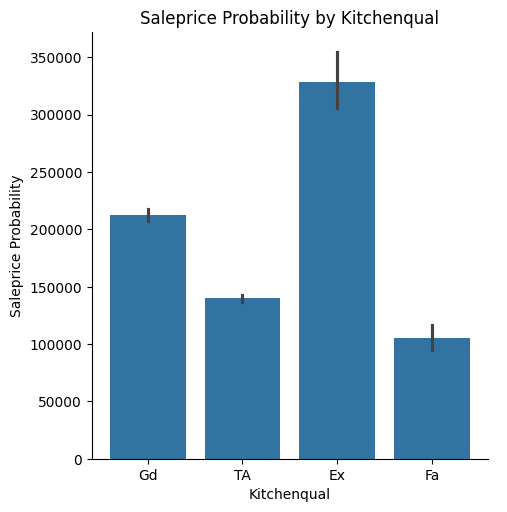

In [446]:
categorical_variables_visualization(df_train, 'KitchenQual', 'SalePrice', 'bar')

#### BsmtFullBath

This is the value counts for the column BsmtFullBath :
BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column BsmtFullBath :
   BsmtFullBath      SalePrice
2             2  213063.066667
1             1  202522.918367
3             3  179000.000000
0             0  165521.640187


------------------------------------------
Creating a bar plot for the BsmtFullBath column with respect to SalePrice ...




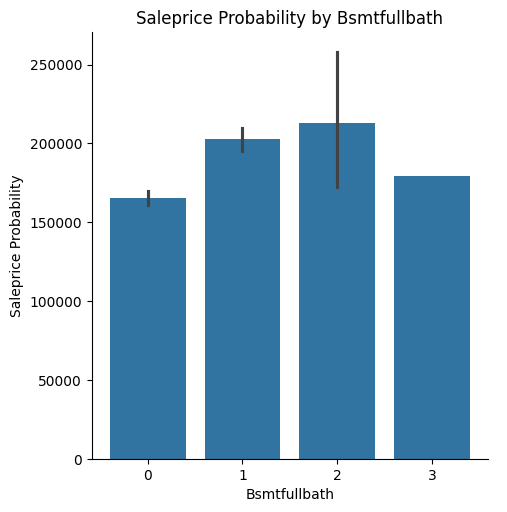

In [447]:
categorical_variables_visualization(df_train, 'BsmtFullBath', 'SalePrice', 'bar')

#### BsmtHalfBath

This is the value counts for the column BsmtHalfBath :
BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column BsmtHalfBath :
   BsmtHalfBath      SalePrice
0             0  181230.330189
1             1  176098.125000
2             2  160850.500000


------------------------------------------
Creating a bar plot for the BsmtHalfBath column with respect to SalePrice ...




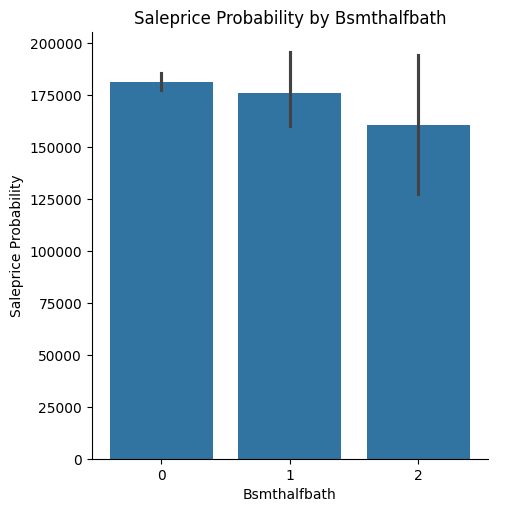

In [448]:
categorical_variables_visualization(df_train, 'BsmtHalfBath', 'SalePrice', 'bar')

#### FullBath

This is the value counts for the column FullBath :
FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column FullBath :
   FullBath      SalePrice
3         3  347822.909091
2         2  213009.825521
0         0  165200.888889
1         1  134751.440000


------------------------------------------
Creating a bar plot for the FullBath column with respect to SalePrice ...




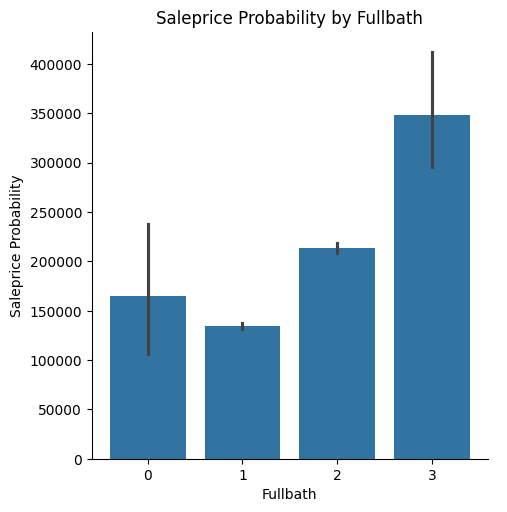

In [449]:
categorical_variables_visualization(df_train, 'FullBath', 'SalePrice', 'bar')

#### HalfBath

This is the value counts for the column HalfBath :
HalfBath
0    913
1    535
2     12
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column HalfBath :
   HalfBath      SalePrice
1         1  212721.960748
0         0  162534.884995
2         2  162028.916667


------------------------------------------
Creating a bar plot for the HalfBath column with respect to SalePrice ...




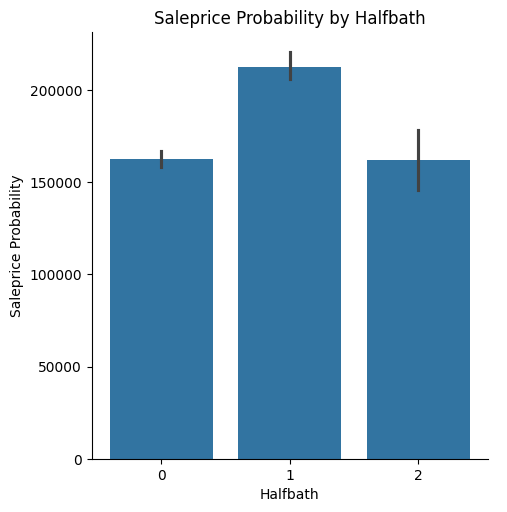

In [450]:
categorical_variables_visualization(df_train, 'HalfBath', 'SalePrice', 'bar')

#### KitchenQual

This is the value counts for the column KitchenQual :
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column KitchenQual :
  KitchenQual      SalePrice
0          Ex  328554.670000
2          Gd  212116.023891
3          TA  139962.511565
1          Fa  105565.205128


------------------------------------------
Creating a bar plot for the KitchenQual column with respect to SalePrice ...




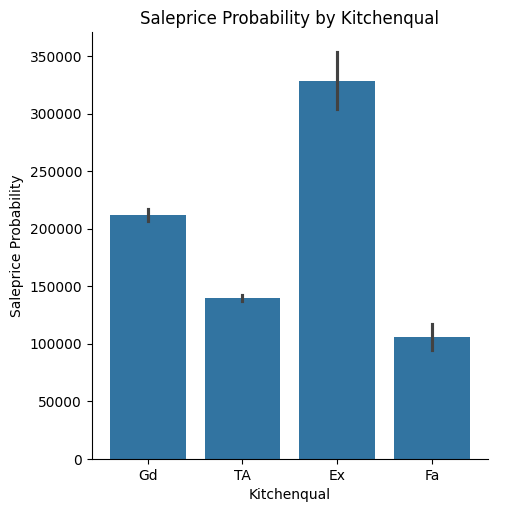

In [451]:
categorical_variables_visualization(df_train, 'KitchenQual', 'SalePrice', 'bar')

#### TotRmsAbvGrd

This is the value counts for the column TotRmsAbvGrd :
TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column TotRmsAbvGrd :
    TotRmsAbvGrd      SalePrice
9             11  318022.000000
8             10  296279.170213
10            12  280971.454545
7              9  252988.173333
6              8  213427.529412
11            14  200000.000000
5              7  196666.784195
4              6  161303.296020
3              5  141550.749091
2              4  122844.628866
1              3  111217.647059
0              2   39300.000000


------------------------------------------
Creating a bar plot for the TotRmsAbvGrd column with respect to SalePrice ...




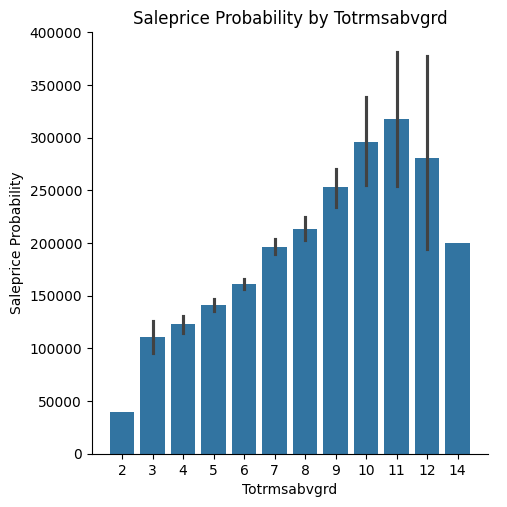

In [452]:
categorical_variables_visualization(df_train, 'TotRmsAbvGrd','SalePrice', 'bar')

#### Functional

This is the value counts for the column Functional :
Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Functional :
  Functional      SalePrice
6        Typ  183429.147059
4        Mod  168393.333333
0       Maj1  153948.142857
2       Min1  146385.483871
3       Min2  144240.647059
5        Sev  129000.000000
1       Maj2   85800.000000


------------------------------------------
Creating a bar plot for the Functional column with respect to SalePrice ...




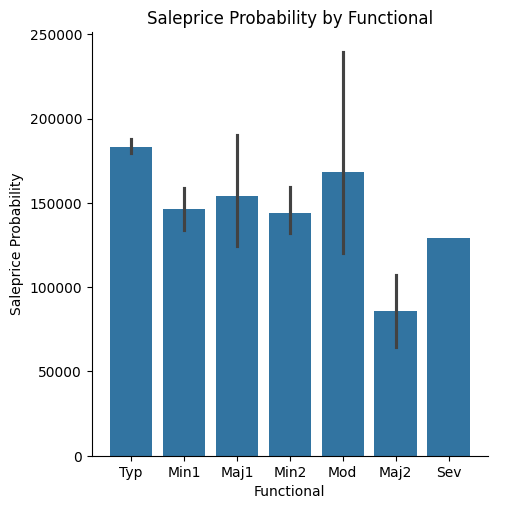

In [453]:
categorical_variables_visualization(df_train, 'Functional', 'SalePrice', 'bar')

The Functional column represents the overall functionality of the home, where Typ (Typical Functionality) homes have the highest average sale prices. Homes with more significant deductions, such as Maj1 (Major Deductions 1) and Maj2 (Major Deductions 2), are associated with lower sale prices, with Sal (Salvage only) having the lowest.

#### Fireplaces

This is the value counts for the column Fireplaces :
Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Fireplaces :
   Fireplaces      SalePrice
3           3  252000.000000
2           2  240588.539130
1           1  211843.909231
0           0  141331.482609


------------------------------------------
Creating a bar plot for the Fireplaces column with respect to SalePrice ...




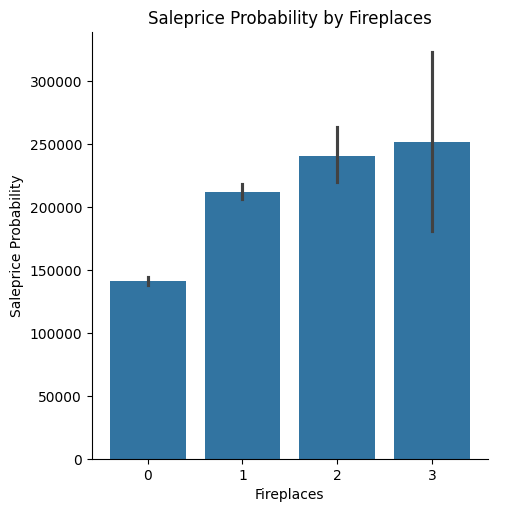

In [454]:
categorical_variables_visualization(df_train, 'Fireplaces', 'SalePrice', 'bar')

#### FireplaceQu

In [455]:
df_train['FireplaceQu'].fillna('NoFire', inplace=True)
df_test['FireplaceQu'].fillna('NoFire', inplace=True)

This is the value counts for the column FireplaceQu :
FireplaceQu
NoFire    690
Gd        380
TA        313
Fa         33
Ex         24
Po         20
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column FireplaceQu :
  FireplaceQu      SalePrice
0          Ex  337712.500000
2          Gd  226351.415789
5          TA  205723.488818
1          Fa  167298.484848
3      NoFire  141331.482609
4          Po  129764.150000


------------------------------------------
Creating a bar plot for the FireplaceQu column with respect to SalePrice ...




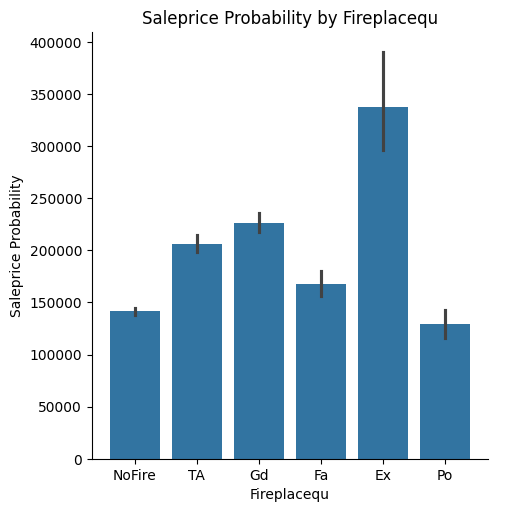

In [456]:
categorical_variables_visualization(df_train, 'FireplaceQu', 'SalePrice', 'bar')

#### GarageType

In [457]:
df_train['GarageType'].fillna('NoGar', inplace=True)
df_test['GarageType'].fillna('NoGar', inplace=True)

This is the value counts for the column GarageType :
GarageType
Attchd     870
Detchd     387
BuiltIn     88
NoGar       81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column GarageType :
  GarageType      SalePrice
3    BuiltIn  254751.738636
1     Attchd  202892.656322
2    Basment  160570.684211
0     2Types  151283.333333
5     Detchd  134091.162791
4    CarPort  109962.111111
6      NoGar  103317.283951


------------------------------------------
Creating a bar plot for the GarageType column with respect to SalePrice ...




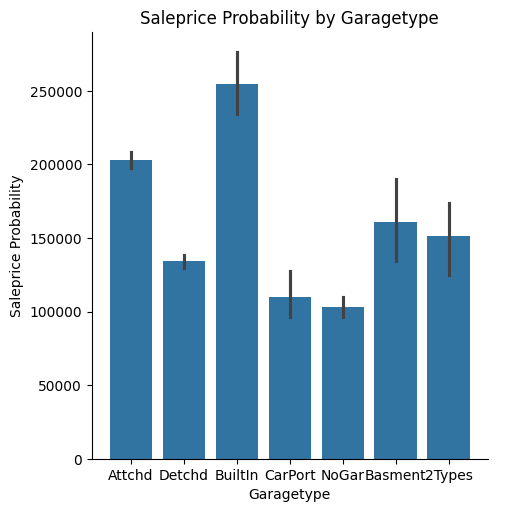

In [458]:
categorical_variables_visualization(df_train, 'GarageType', 'SalePrice', 'bar')

#### GarageFinish

In [459]:
df_train['GarageFinish'].fillna('NoGar', inplace=True)
df_test['GarageFinish'].fillna('NoGar', inplace=True)

This is the value counts for the column GarageFinish :
GarageFinish
Unf      605
RFn      422
Fin      352
NoGar     81
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column GarageFinish :
  GarageFinish      SalePrice
0          Fin  240052.690341
2          RFn  202068.869668
3          Unf  142156.423140
1        NoGar  103317.283951


------------------------------------------
Creating a bar plot for the GarageFinish column with respect to SalePrice ...




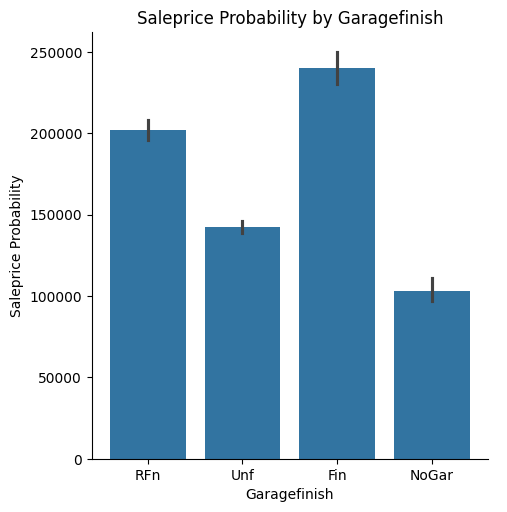

In [460]:
categorical_variables_visualization(df_train, 'GarageFinish', 'SalePrice', 'bar')

#### GarageQual

In [461]:
df_train['GarageQual'].fillna('NoGar', inplace=True)
df_test['GarageQual'].fillna('NoGar', inplace=True)

This is the value counts for the column GarageQual :
GarageQual
TA       1311
NoGar      81
Fa         48
Gd         14
Ex          3
Po          3
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column GarageQual :
  GarageQual      SalePrice
0         Ex  241000.000000
2         Gd  215860.714286
5         TA  187489.836003
1         Fa  123573.354167
3      NoGar  103317.283951
4         Po  100166.666667


------------------------------------------
Creating a bar plot for the GarageQual column with respect to SalePrice ...




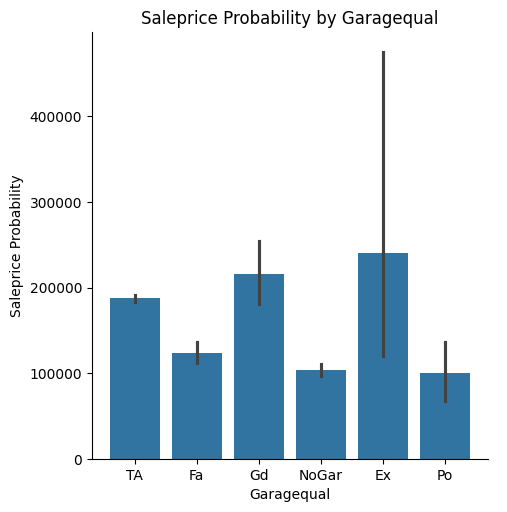

In [462]:
categorical_variables_visualization(df_train, 'GarageQual', 'SalePrice', 'bar')

#### GarageCond

In [463]:
df_train['GarageCond'].fillna('NoGar', inplace=True)
df_test['GarageCond'].fillna('NoGar', inplace=True)

This is the value counts for the column GarageCond :
GarageCond
TA       1326
NoGar      81
Fa         35
Gd          9
Po          7
Ex          2
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column GarageCond :
  GarageCond      SalePrice
5         TA  187885.735294
2         Gd  179930.000000
0         Ex  124000.000000
1         Fa  114654.028571
4         Po  108500.000000
3      NoGar  103317.283951


------------------------------------------
Creating a bar plot for the GarageCond column with respect to SalePrice ...




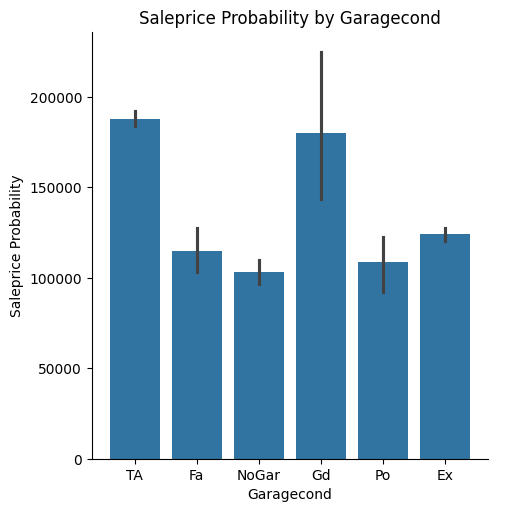

In [464]:
categorical_variables_visualization(df_train, 'GarageCond', 'SalePrice', 'bar')

#### PavedDrive

This is the value counts for the column PavedDrive :
PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column PavedDrive :
  PavedDrive      SalePrice
2          Y  186433.973881
1          P  132330.000000
0          N  115039.122222


------------------------------------------
Creating a bar plot for the PavedDrive column with respect to SalePrice ...




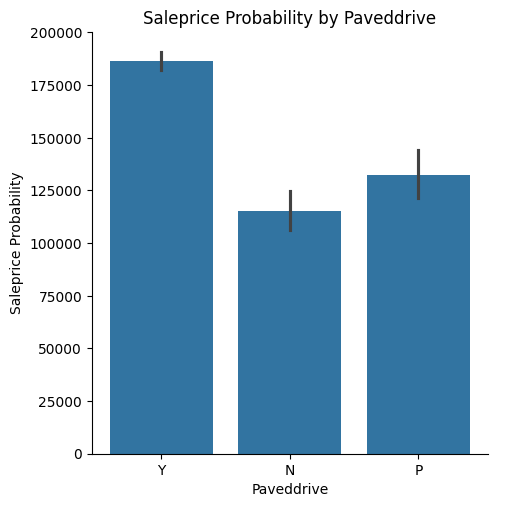

In [465]:
categorical_variables_visualization(df_train, 'PavedDrive', 'SalePrice', 'bar')

#### PoolQC

In [466]:
df_train['PoolQC'].fillna('NoPool', inplace=True)
df_test['PoolQC'].fillna('NoPool', inplace=True)

This is the value counts for the column PoolQC :
PoolQC
NoPool    1453
Gd           3
Ex           2
Fa           2
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column PoolQC :
   PoolQC      SalePrice
0      Ex  490000.000000
1      Fa  215500.000000
2      Gd  201990.000000
3  NoPool  180404.663455


------------------------------------------
Creating a bar plot for the PoolQC column with respect to SalePrice ...




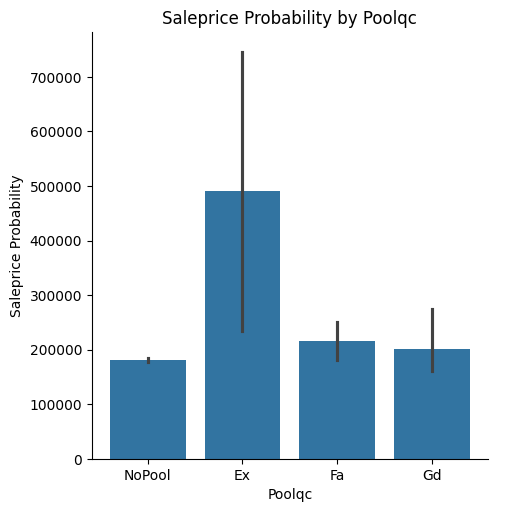

In [467]:
categorical_variables_visualization(df_train, 'PoolQC', 'SalePrice', 'bar')

#### Fence

In [468]:
df_train['Fence'].fillna('NoFence', inplace=True)
df_test['Fence'].fillna('NoFence', inplace=True)

This is the value counts for the column Fence :
Fence
NoFence    1179
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column Fence :
     Fence      SalePrice
4  NoFence  187596.837998
0    GdPrv  178927.457627
2    MnPrv  148751.089172
1     GdWo  140379.314815
3     MnWw  134286.363636


------------------------------------------
Creating a bar plot for the Fence column with respect to SalePrice ...




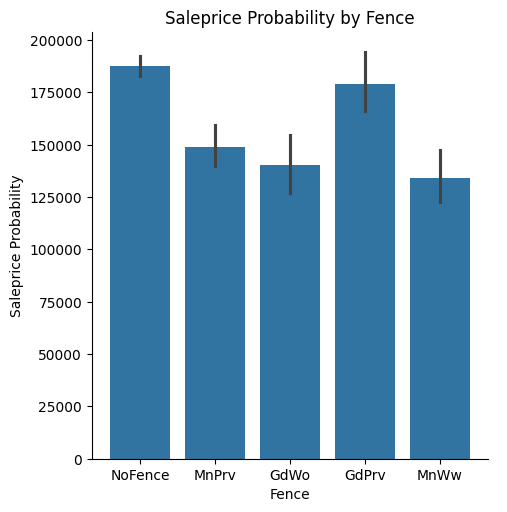

In [469]:
categorical_variables_visualization(df_train, 'Fence', 'SalePrice', 'bar')

#### MiscFeature

In [470]:
df_train['MiscFeature'].fillna('None', inplace=True)
df_test['MiscFeature'].fillna('None', inplace=True)

This is the value counts for the column MiscFeature :
MiscFeature
None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column MiscFeature :
  MiscFeature      SalePrice
4        TenC  250000.000000
1        None  182046.410384
0        Gar2  170750.000000
3        Shed  151187.612245
2        Othr   94000.000000


------------------------------------------
Creating a bar plot for the MiscFeature column with respect to SalePrice ...




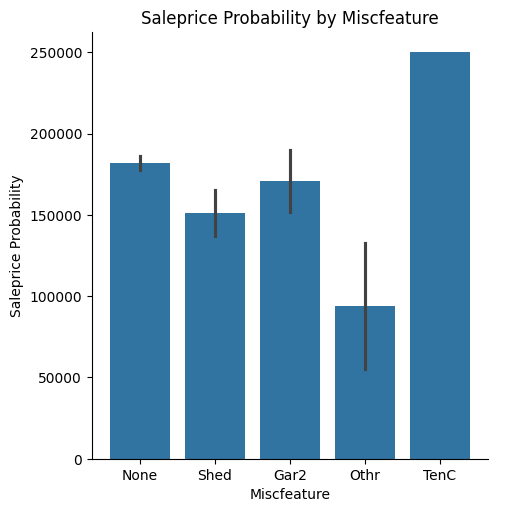

In [471]:
categorical_variables_visualization(df_train, 'MiscFeature', 'SalePrice', 'bar')

#### SaleType

This is the value counts for the column SaleType :
SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column SaleType :
  SaleType      SalePrice
6      New  274945.418033
2      Con  269600.000000
1      CWD  210600.000000
4    ConLI  200390.000000
8       WD  173401.836622
0      COD  143973.255814
5    ConLw  143700.000000
3    ConLD  138780.888889
7      Oth  119850.000000


------------------------------------------
Creating a bar plot for the SaleType column with respect to SalePrice ...




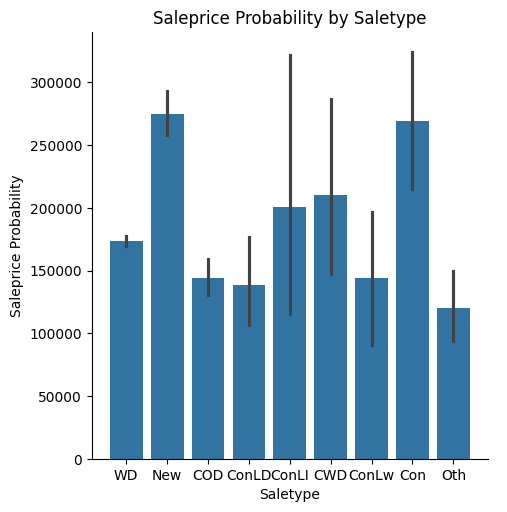

In [472]:
categorical_variables_visualization(df_train, 'SaleType', 'SalePrice', 'bar')

#### SaleCondition

This is the value counts for the column SaleCondition :
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64


------------------------------------------
The mean of the target variable SalePrice grouped by the categorical column SaleCondition :
  SaleCondition      SalePrice
5       Partial  272291.752000
4        Normal  175202.219533
2        Alloca  167377.416667
3        Family  149600.000000
0       Abnorml  146526.623762
1       AdjLand  104125.000000


------------------------------------------
Creating a bar plot for the SaleCondition column with respect to SalePrice ...




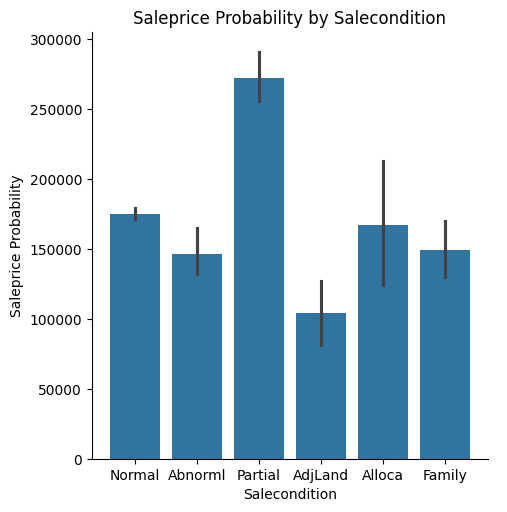

In [473]:
categorical_variables_visualization(df_train, 'SaleCondition', 'SalePrice', 'bar')

### Numerical Variables

#### 1. Delete Outliers

Outliers were detected using the IQR method, identifying 10 indices that exhibited extreme values across multiple features. These outliers may distort statistical metrics and model performance, so their impact should be evaluated through visualization and domain-specific analysis. Based on the findings, they can be corrected, removed, or retained if they provide critical insights.

In [474]:
outliers = delete_outliers(df_train, 2, [x for x in df_train.columns if df_train[x].dtype != 'object'])
len(outliers)

134

In [475]:
print(f'Rows before: {len(df_train)}')
df_train = df_train.drop(outliers, axis=0).reset_index(drop=True)
print(f'Rows after: {len(df_train)}')

Rows before: 1460
Rows after: 1326


#### 2. Numerical Variable Correlation with SalePrice

In [476]:
df_train[[x for x in df_train.columns if df_train[x].dtype != 'object' and x != 'Id']].corr().round(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.44,-0.30,0.08,-0.09,0.11,0.06,0.07,-0.05,-0.05,...,-0.04,0.03,-0.05,-0.04,-0.00,-0.01,-0.04,-0.02,-0.02,-0.06
LotFrontage,-0.44,1.00,0.56,0.20,-0.05,0.12,0.07,0.13,0.12,0.02,...,0.10,0.11,-0.04,0.09,0.04,0.02,0.00,0.03,0.01,0.34
LotArea,-0.30,0.56,1.00,0.12,-0.03,0.04,0.03,0.06,0.16,0.03,...,0.17,0.09,-0.04,0.04,0.03,0.00,0.02,0.00,-0.04,0.31
OverallQual,0.08,0.20,0.12,1.00,-0.13,0.61,0.56,0.37,0.17,-0.07,...,0.24,0.31,-0.14,0.03,0.05,-0.00,-0.01,0.08,-0.02,0.81
OverallCond,-0.09,-0.05,-0.03,-0.13,1.00,-0.39,0.03,-0.15,-0.03,0.07,...,-0.02,-0.08,0.10,-0.00,0.06,0.02,0.09,-0.00,0.05,-0.13
YearBuilt,0.11,0.12,0.04,0.61,-0.39,1.00,0.63,0.30,0.22,-0.05,...,0.24,0.25,-0.40,0.03,-0.04,0.00,-0.03,0.01,-0.01,0.60
YearRemodAdd,0.06,0.07,0.03,0.56,0.03,0.63,1.00,0.16,0.10,-0.04,...,0.22,0.26,-0.21,0.03,-0.04,0.01,0.01,0.02,0.03,0.55
MasVnrArea,0.07,0.13,0.06,0.37,-0.15,0.30,0.16,1.00,0.20,-0.07,...,0.14,0.11,-0.12,0.03,0.07,-0.01,-0.02,0.02,-0.01,0.42
BsmtFinSF1,-0.05,0.12,0.16,0.17,-0.03,0.22,0.10,0.20,1.00,-0.05,...,0.19,0.07,-0.12,0.02,0.07,0.02,0.00,0.00,0.02,0.36
BsmtFinSF2,-0.05,0.02,0.03,-0.07,0.07,-0.05,-0.04,-0.07,-0.05,1.00,...,0.08,-0.05,0.00,-0.03,0.00,0.04,-0.02,-0.04,0.03,-0.03


OverallQual (0.81): This feature has the strongest positive correlation with SalePrice. Higher overall quality of the house tends to lead to higher sale prices.

GrLivArea (0.73): The above-ground living area is strongly correlated with SalePrice. Larger living spaces generally result in higher house prices.

TotalBsmtSF (0.62): A larger total basement area correlates positively with SalePrice, indicating that finished or larger basements contribute to higher values.

GarageArea (0.66): Larger garage sizes are associated with higher sale prices.

Fireplaces (0.59): Houses with more fireplaces tend to have higher prices.

BsmtFinSF1 (0.36) & BsmtFinSF2 (0.21): These features, representing the finished square footage of the basement, show a moderate correlation with SalePrice.

PoolArea (0.08): Having a pool slightly increases the price, but the correlation is not very strong.

MiscVal (-0.18): Miscellaneous values show a weak negative correlation with SalePrice, suggesting that any miscellaneous features may slightly reduce the price.

#### LotFrontage

The LotFrontage feature, representing the linear feet of street connected to the property, exhibits a skewness of 1.59. This indicates a moderately right-skewed distribution, where the majority of the values are concentrated on the lower end, with a few properties having much larger lot frontages.

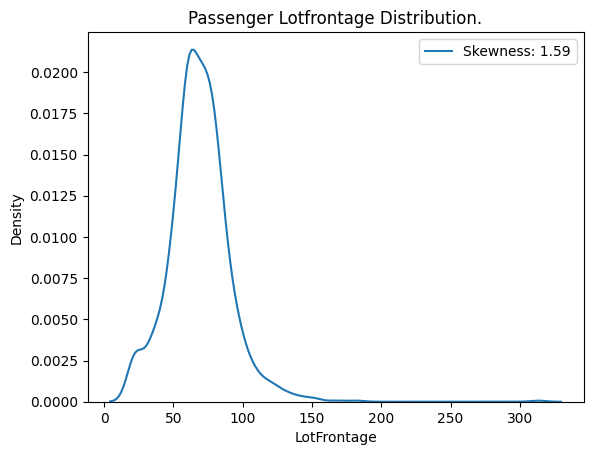

In [477]:
kdeplot_visualization(df_train, 'LotFrontage')

#### LotArea

The LotArea feature, which represents the lot size in square feet, shows a skewness of 7.92. This indicates a highly right-skewed distribution, meaning that most properties have smaller lot areas, with a few properties having exceptionally large lot sizes, significantly pulling the distribution to the right.

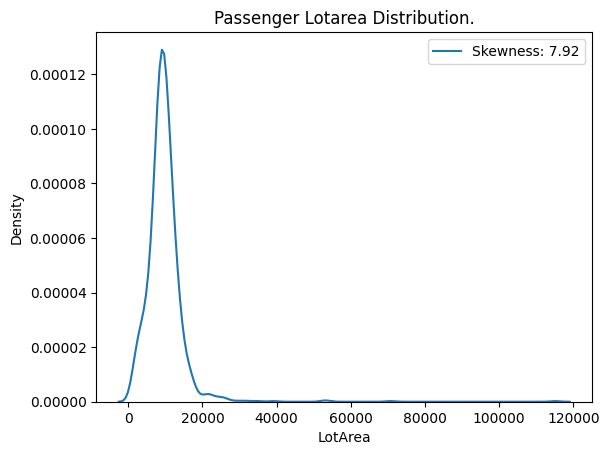

In [478]:
kdeplot_visualization(df_train, 'LotArea')

#### YearBuilt

The YearBuilt feature, representing the year a house was built, has a skewness of -0.57. This indicates a slight left-skew in the data, meaning that there are more recent houses (built in more recent years) compared to older ones, but the distribution is not extremely skewed. The negative skew suggests a larger concentration of houses built in the more recent years.

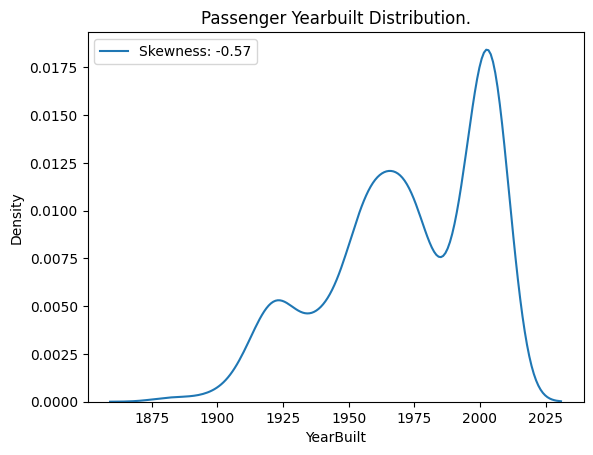

In [479]:
kdeplot_visualization(df_train, 'YearBuilt')

#### YearRemodAdd

The YearRemodAdd feature, which represents the year a property was remodeled or added to, has a skewness of -0.51. This indicates a mild left-skew in the data, suggesting that more properties have undergone remodeling or additions in recent years. While it's slightly skewed to the left, the distribution is relatively balanced, with a larger number of remodels occurring in more recent years compared to older ones.

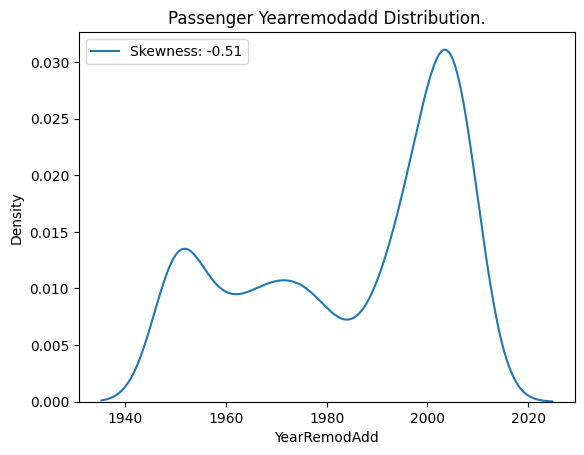

In [480]:
kdeplot_visualization(df_train, 'YearRemodAdd')

#### MasVnrArea

The MasVnrArea feature, which represents the area of masonry veneer in square feet, has a skewness of 2.57. This indicates a moderate right-skew in the data, meaning that while most properties have smaller masonry veneer areas, there are a few properties with much larger areas, which heavily influence the distribution. This suggests that larger homes or more luxurious properties tend to have significantly more masonry veneer, pulling the average to the right.

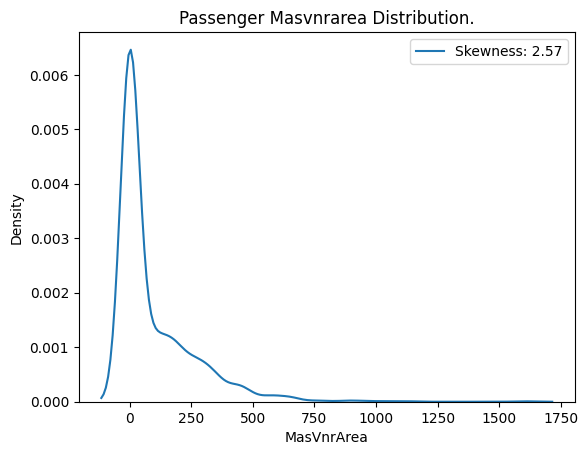

In [481]:
kdeplot_visualization(df_train, 'MasVnrArea')

#### BsmtFinSF1

The BsmtFinSF1 feature, which represents the finished square footage of the basement type 1, has a skewness of 0.65. This indicates a slight right-skew in the distribution, meaning that most properties have relatively smaller basement areas, but a few properties with larger finished basements are pulling the distribution towards the right. Although the skewness is not very high, it suggests that a majority of the homes have modest-sized finished basements.

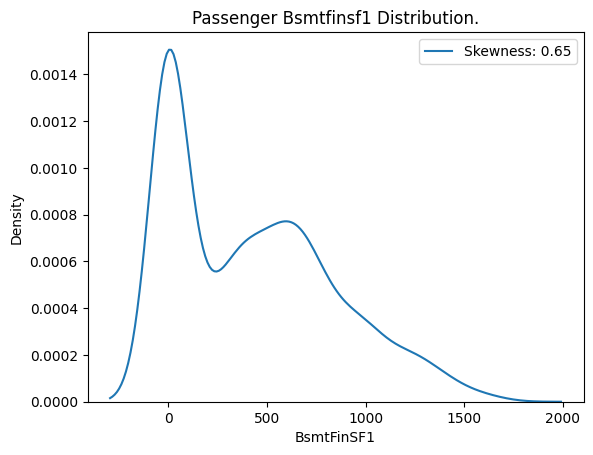

In [482]:
kdeplot_visualization(df_train, 'BsmtFinSF1')

#### BsmtFinSF2

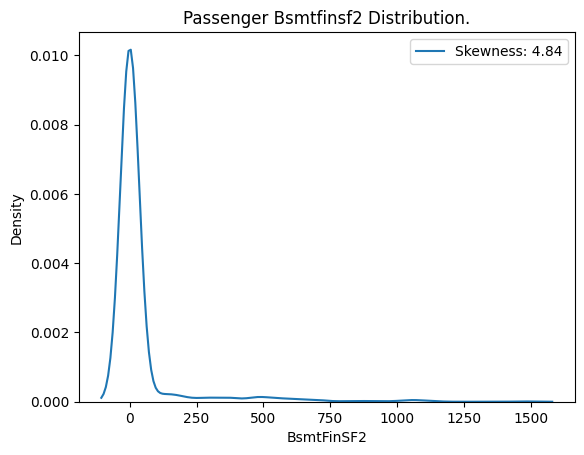

In [483]:
kdeplot_visualization(df_train, 'BsmtFinSF2')

#### BsmtUnfSF

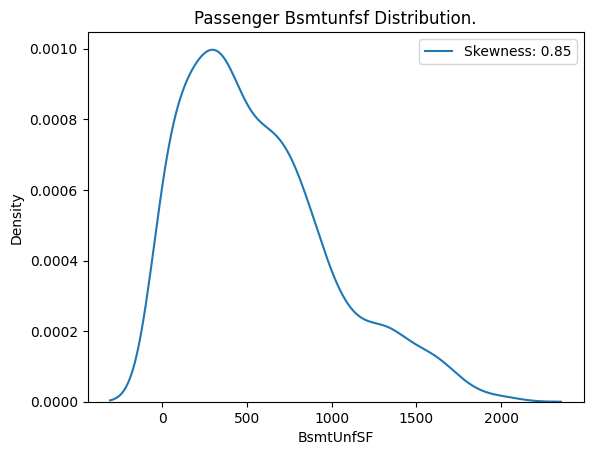

In [484]:
kdeplot_visualization(df_train, 'BsmtUnfSF')

#### TotalBsmtSF

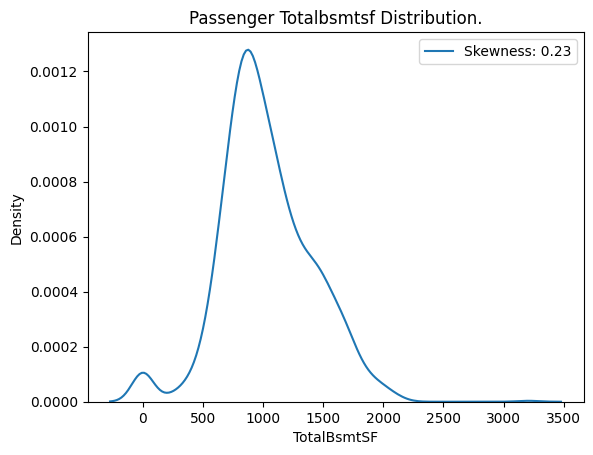

In [485]:
kdeplot_visualization(df_train, 'TotalBsmtSF')

#### 1stFlrSF

The 1stFlrSF feature, which represents the square footage of the first floor, has a skewness of 0.62. This indicates a moderate right-skew, meaning that most properties tend to have smaller first-floor areas, while a few properties with larger first floors are driving the distribution to the right. Although the skew is not extreme, it suggests that the majority of homes have more typical first-floor sizes, with a few larger homes pulling the average upward.

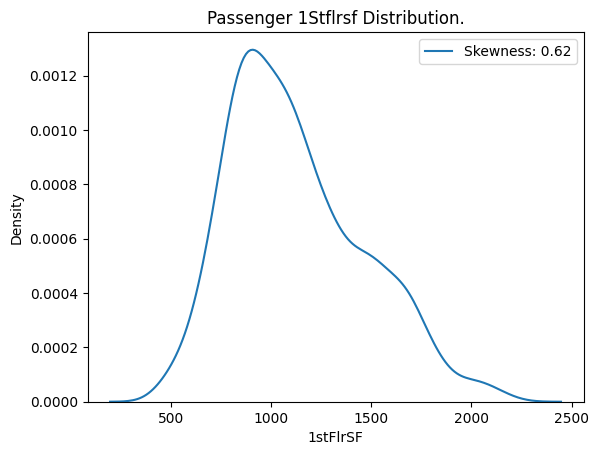

In [486]:
kdeplot_visualization(df_train, '1stFlrSF')

#### 2ndFlrSF

The 2ndFlrSF feature, representing the square footage of the second floor, has a skewness of 0.75. This indicates a moderate right skew, meaning that most properties have smaller second-floor areas, while a smaller number of properties have larger second floors, influencing the distribution to the right. This suggests that many homes have minimal or no second-floor space, and a few larger homes with significant second-floor areas are skewing the data.

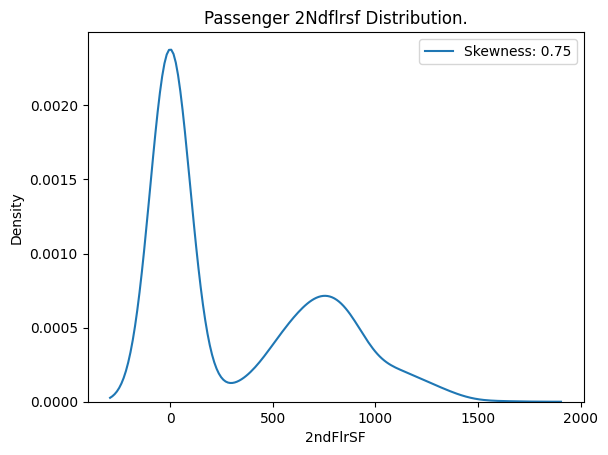

In [487]:
kdeplot_visualization(df_train, '2ndFlrSF')

#### LowQualFinSF

The LowQualFinSF feature, representing low-quality finished square footage across all floors, has a skewness of 12.68. This high positive skew indicates that most properties have very little or no low-quality finished space, with a few properties having significantly larger areas of low-quality finish. This suggests that the data is heavily concentrated around values close to zero, with only a few outliers where low-quality finishes take up a more substantial portion of the home.

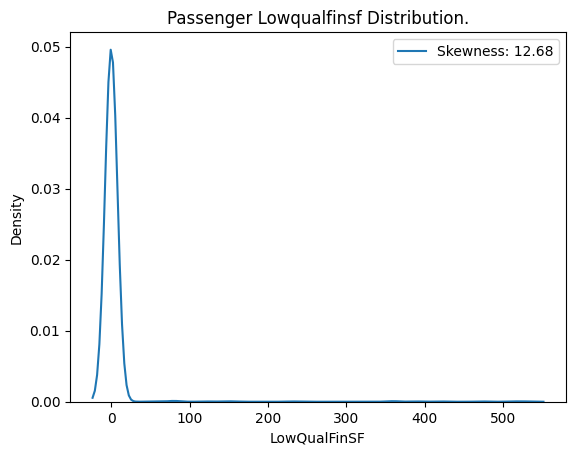

In [488]:
kdeplot_visualization(df_train, 'LowQualFinSF')

#### GrLivArea

The GrLivArea feature, representing the above-grade (ground) living area in square feet, has a skewness of 0.57. This indicates a mild positive skew, meaning that most properties tend to have smaller living areas with a few properties having significantly larger living spaces. The distribution is slightly shifted to the right, with the majority of homes having a typical amount of ground-level living area and fewer outliers with much larger spaces.

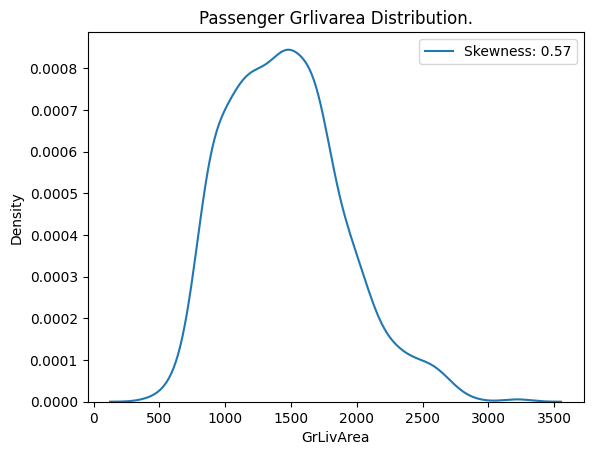

In [489]:
kdeplot_visualization(df_train, 'GrLivArea')

#### GarageYrBlt

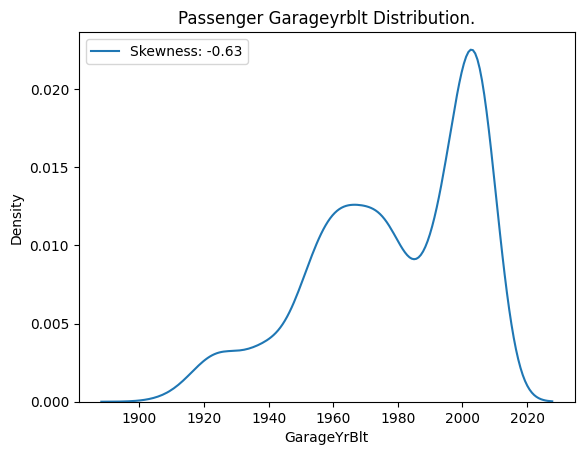

In [490]:
kdeplot_visualization(df_train, 'GarageYrBlt')

#### GarageCars

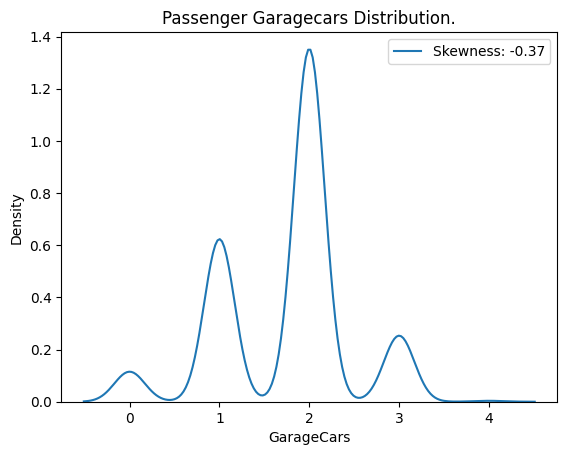

In [491]:
kdeplot_visualization(df_train, 'GarageCars')

#### GarageArea

The GarageArea feature, which represents the size of the garage in square feet, has a skewness of 0.03. This suggests that the distribution is nearly symmetrical, with a slight tendency towards a higher number of smaller garages. However, the skew is so close to zero that it indicates the data is fairly balanced, with no significant outliers in either direction.

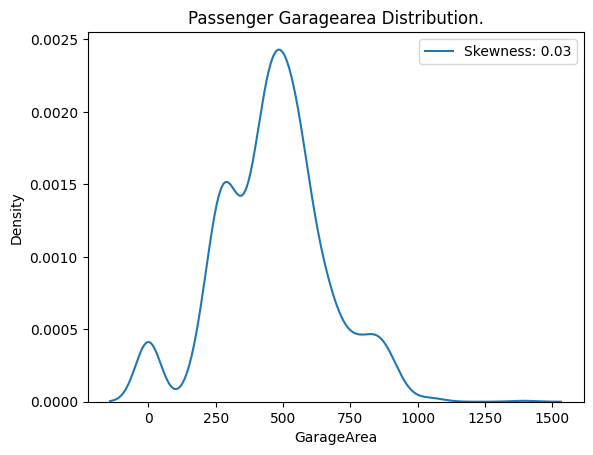

In [492]:
kdeplot_visualization(df_train, 'GarageArea')

#### WoodDeckSF

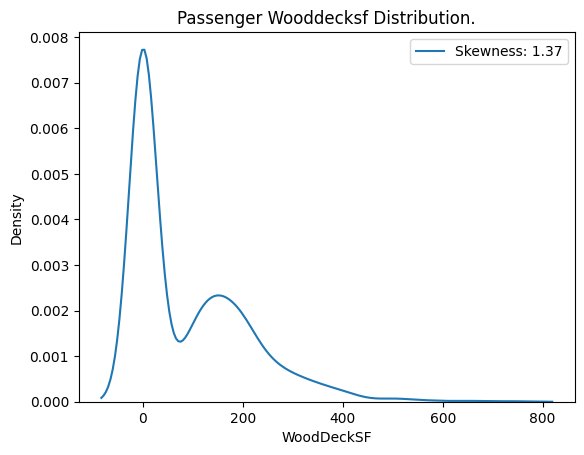

In [493]:
kdeplot_visualization(df_train, 'WoodDeckSF')

#### OpenPorchSF

The OpenPorchSF feature, which represents the area of the open porch in square feet, has a skewness of 2.12. This indicates a moderate positive skew, meaning that most of the values are concentrated on the lower end of the scale, with a smaller number of properties having larger open porch areas. The distribution likely has a tail towards the higher values, indicating fewer homes with very large porches.

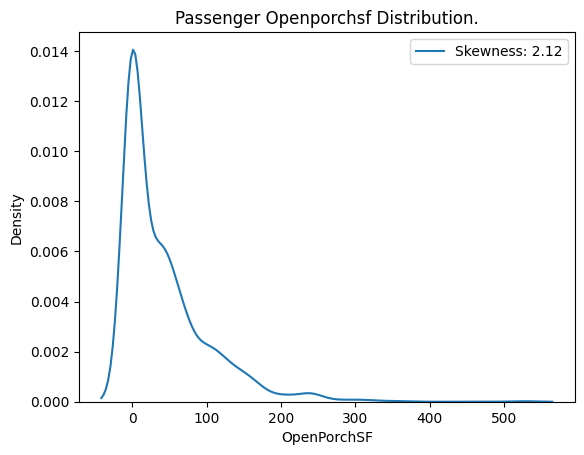

In [494]:
kdeplot_visualization(df_train, 'OpenPorchSF')

#### EnclosedPorch

The EnclosedPorch feature, representing the area of the enclosed porch in square feet, has a skewness of 3.02. This indicates a moderate to strong positive skew, suggesting that most properties have relatively small enclosed porches, with fewer properties featuring large enclosed porch areas. The distribution is likely right-tailed, with a smaller number of homes having significantly larger enclosed porch areas.

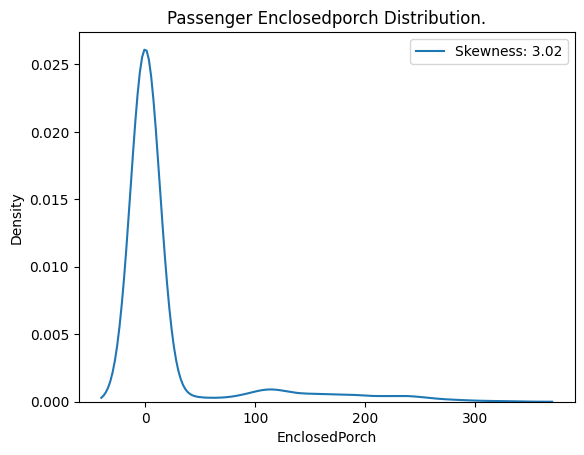

In [495]:
kdeplot_visualization(df_train, 'EnclosedPorch')

#### 3SsnPorch

The 3SsnPorch feature, representing the area of the three-season porch in square feet, has a skewness of 11.12. This indicates a strong positive skew, meaning that most properties have little to no three-season porch area, with a small number of properties featuring much larger three-season porch areas. The distribution is highly right-tailed, suggesting that large three-season porches are relatively rare among the properties in the dataset

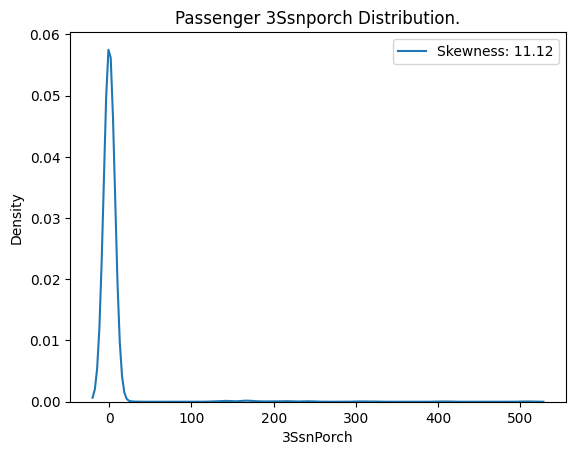

In [496]:
kdeplot_visualization(df_train, '3SsnPorch')

#### ScreenPorch

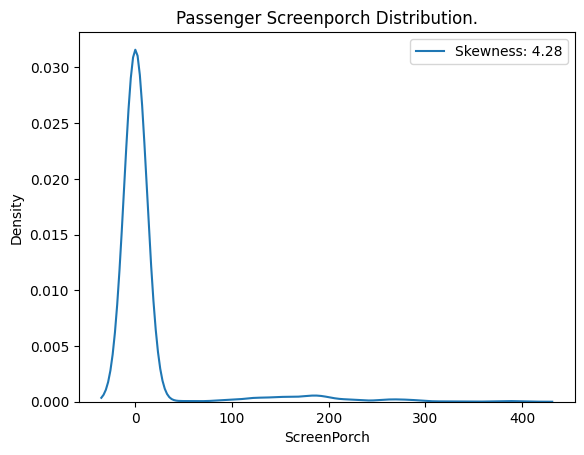

In [497]:
kdeplot_visualization(df_train, 'ScreenPorch')

#### PoolArea

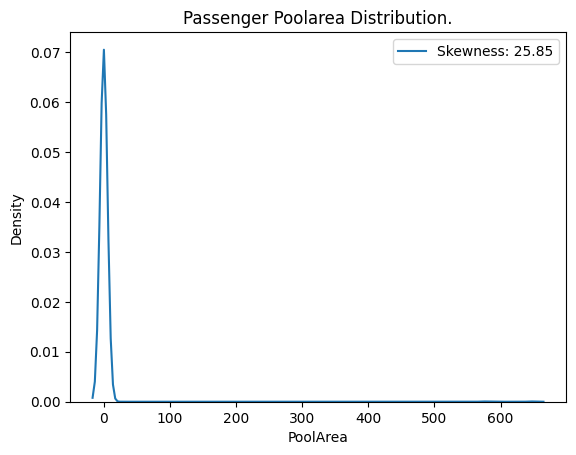

In [498]:
kdeplot_visualization(df_train, 'PoolArea')

#### MiscVal

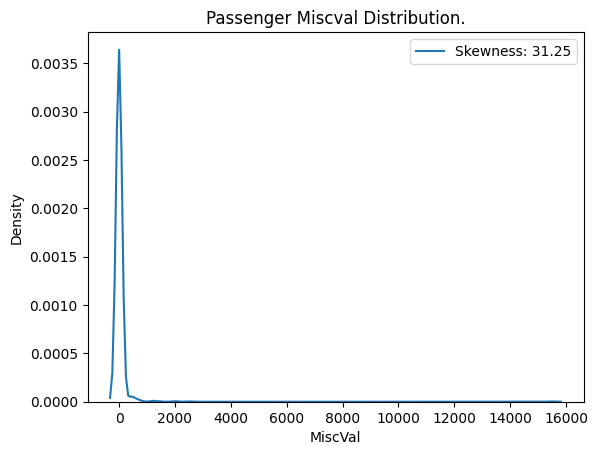

In [499]:
kdeplot_visualization(df_train, 'MiscVal')

#### MoSold

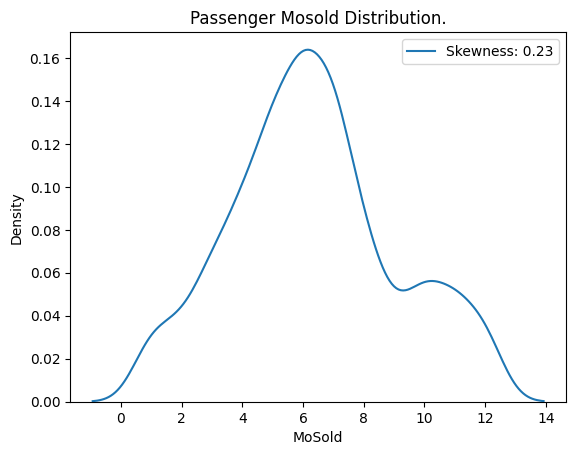

In [500]:
kdeplot_visualization(df_train, 'MoSold')

#### YrSold

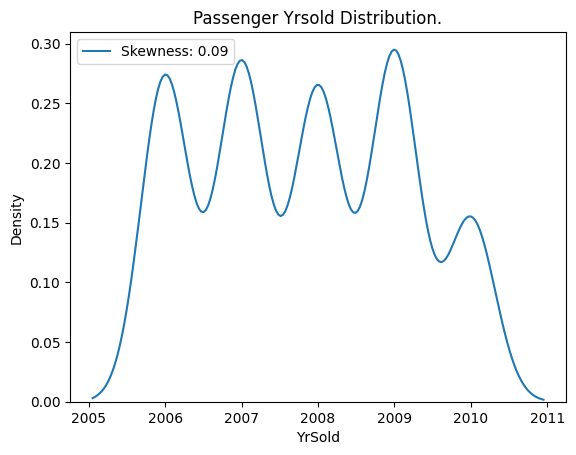

In [501]:
kdeplot_visualization(df_train, 'YrSold')

# 5. Data Processing

## 5.1 Drop and Fill Missing Values

Column LotFrontage has 228 missing values, or 17.19%.
Column MasVnrArea has 6 missing values, or 0.45%.
Column Electrical has 1 missing values, or 0.08%.
Column GarageYrBlt has 65 missing values, or 4.9%.
Axes(0.125,0.11;0.698618x0.77)


{'LotFrontage': 228, 'MasVnrArea': 6, 'Electrical': 1, 'GarageYrBlt': 65}

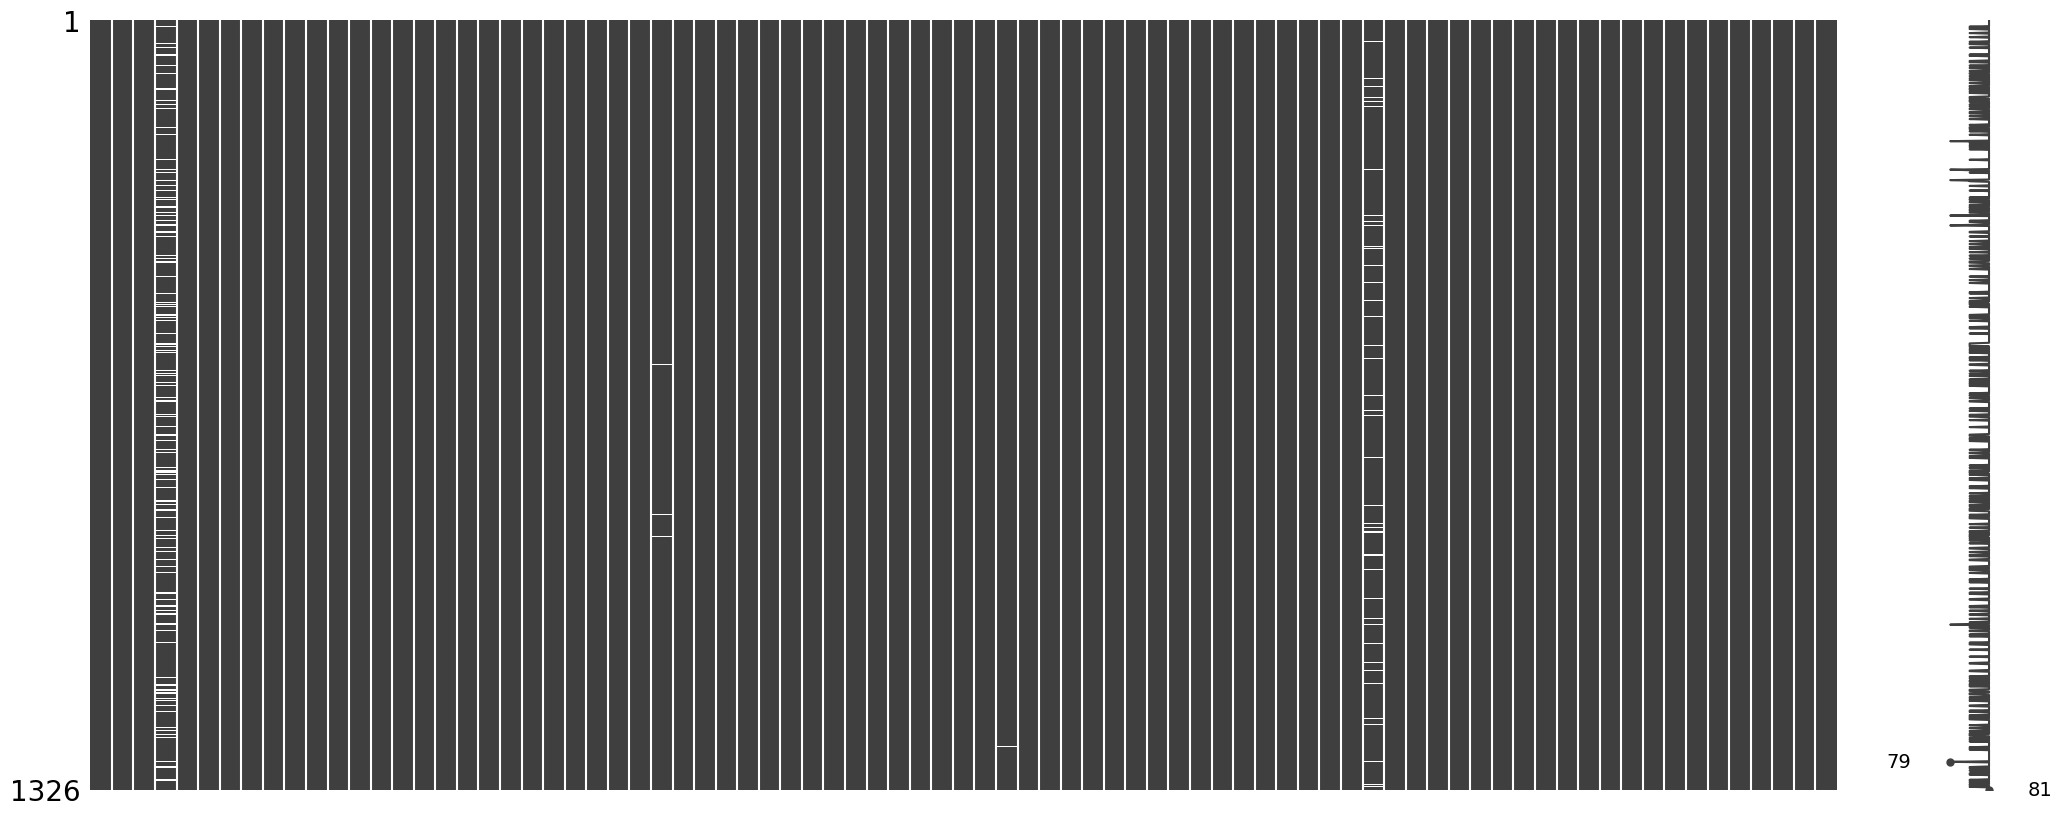

In [502]:
missing_values(df_train)

Column MSZoning has 4 missing values, or 0.27%.
Column LotFrontage has 227 missing values, or 15.56%.
Column Utilities has 2 missing values, or 0.14%.
Column Exterior1st has 1 missing values, or 0.07%.
Column Exterior2nd has 1 missing values, or 0.07%.
Column MasVnrArea has 15 missing values, or 1.03%.
Column BsmtFinSF1 has 1 missing values, or 0.07%.
Column BsmtFinSF2 has 1 missing values, or 0.07%.
Column BsmtUnfSF has 1 missing values, or 0.07%.
Column TotalBsmtSF has 1 missing values, or 0.07%.
Column BsmtFullBath has 2 missing values, or 0.14%.
Column BsmtHalfBath has 2 missing values, or 0.14%.
Column KitchenQual has 1 missing values, or 0.07%.
Column Functional has 2 missing values, or 0.14%.
Column GarageYrBlt has 78 missing values, or 5.35%.
Column GarageCars has 1 missing values, or 0.07%.
Column GarageArea has 1 missing values, or 0.07%.
Column SaleType has 1 missing values, or 0.07%.
Axes(0.125,0.11;0.698618x0.77)
{'MSZoning': 4, 'LotFrontage': 227, 'Utilities': 2, 'Exterio

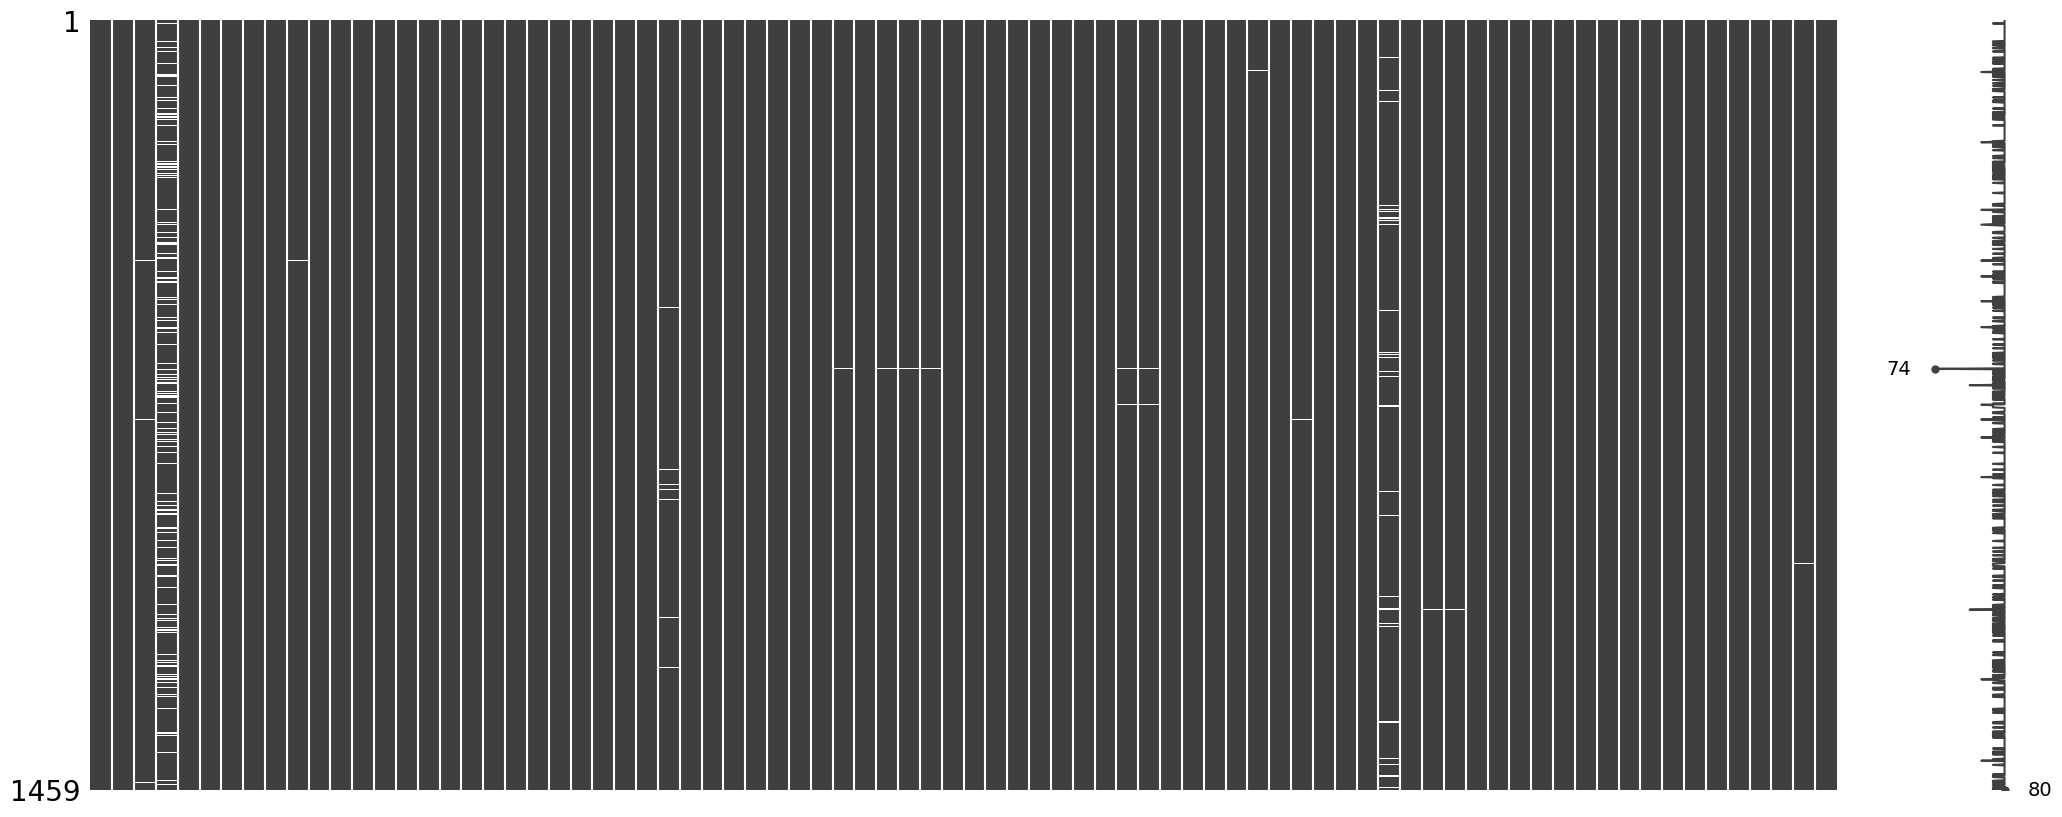

In [503]:
print(missing_values(df_test))

In [504]:
df_combine = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

In [505]:
df_combine.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAl,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NoAl,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NoAl,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500.0


Column MSZoning has 4 missing values, or 0.14%.
Column LotFrontage has 455 missing values, or 16.34%.
Column Utilities has 2 missing values, or 0.07%.
Column Exterior1st has 1 missing values, or 0.04%.
Column Exterior2nd has 1 missing values, or 0.04%.
Column MasVnrArea has 21 missing values, or 0.75%.
Column BsmtFinSF1 has 1 missing values, or 0.04%.
Column BsmtFinSF2 has 1 missing values, or 0.04%.
Column BsmtUnfSF has 1 missing values, or 0.04%.
Column TotalBsmtSF has 1 missing values, or 0.04%.
Column Electrical has 1 missing values, or 0.04%.
Column BsmtFullBath has 2 missing values, or 0.07%.
Column BsmtHalfBath has 2 missing values, or 0.07%.
Column KitchenQual has 1 missing values, or 0.04%.
Column Functional has 2 missing values, or 0.07%.
Column GarageYrBlt has 143 missing values, or 5.13%.
Column GarageCars has 1 missing values, or 0.04%.
Column GarageArea has 1 missing values, or 0.04%.
Column SaleType has 1 missing values, or 0.04%.
Column SalePrice has 1459 missing values

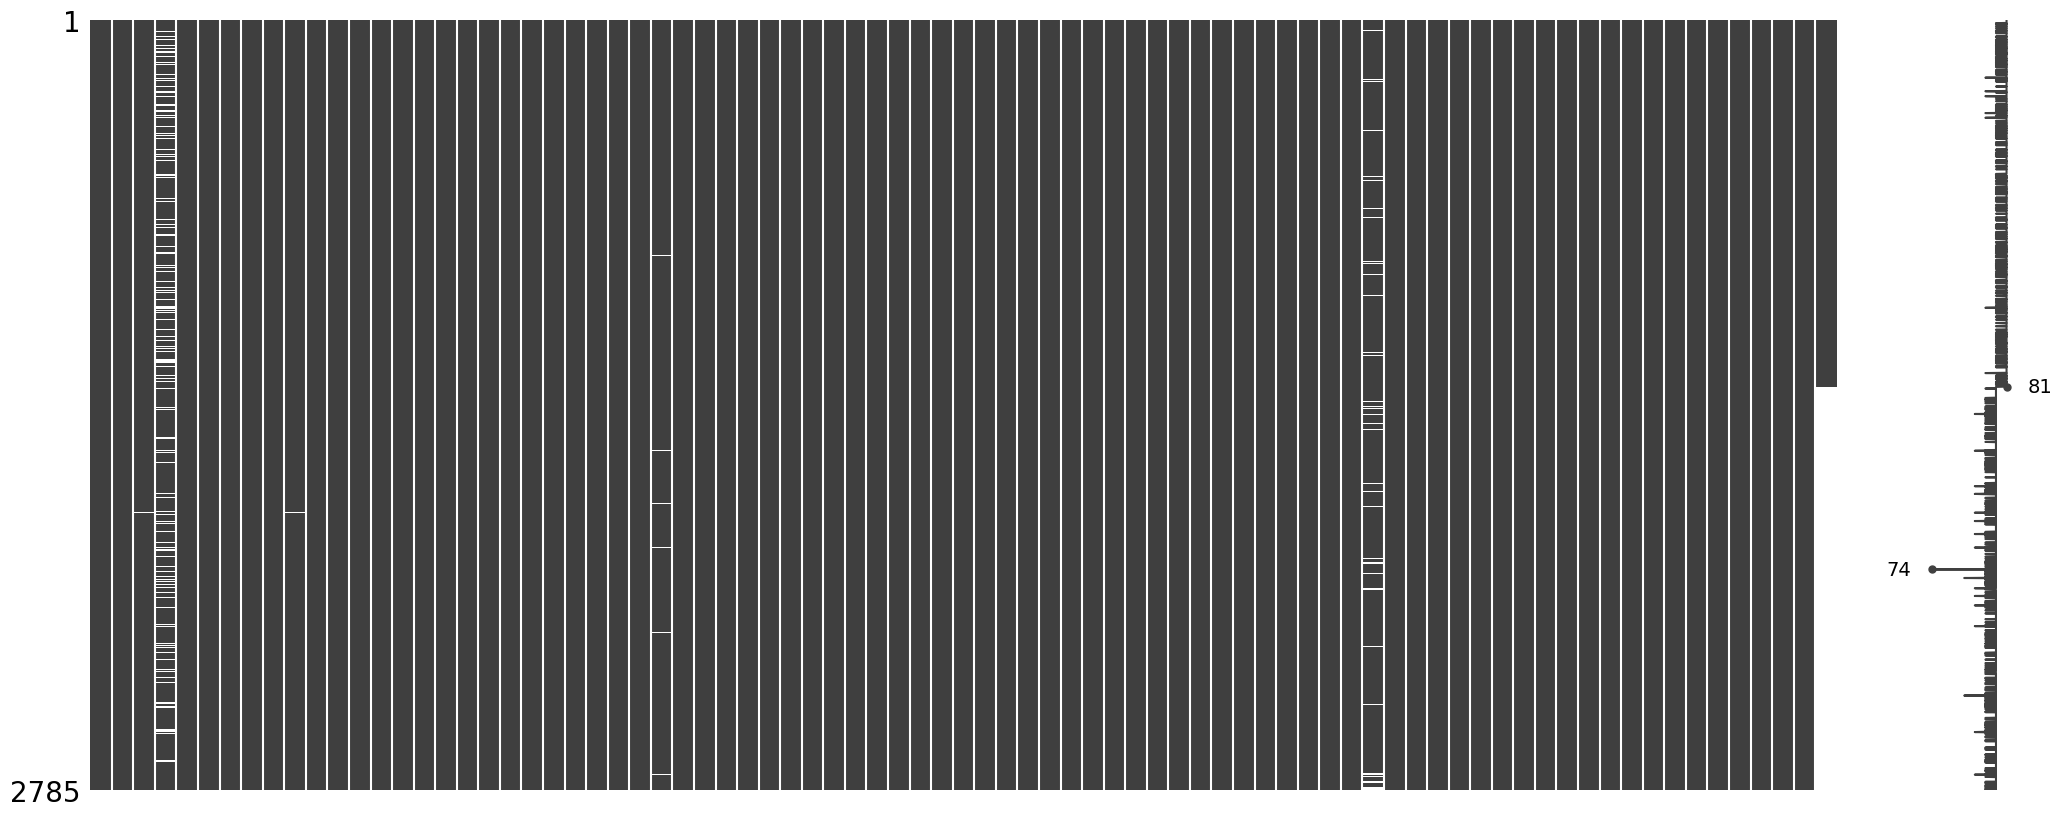

In [506]:
print(missing_values(df_combine))

#### MSZoning

The column MSZoning contains a small percentage of missing values (0.14%). Since the mode (RL) accounts for the vast majority of the data (77.6%), it is reasonable to impute the missing values with this most frequent category. This approach assumes that the missing values are most likely to belong to the dominant zoning classification.

In [507]:
column_description(df_combine, 'MSZoning')

Column MSZoning:
----------------------
Unique values: ['RL', 'RM', 'C (all)', 'FV', 'RH', nan]
----------------------
Value Caunts:
MSZoning
RL         2158
RM          438
FV          139
RH           24
C (all)      22
Name: count, dtype: int64
----------------------
Missing Values: 4


Column LotFrontage has 455 missing values, or 16.34%.
Column Utilities has 2 missing values, or 0.07%.
Column Exterior1st has 1 missing values, or 0.04%.
Column Exterior2nd has 1 missing values, or 0.04%.
Column MasVnrArea has 21 missing values, or 0.75%.
Column BsmtFinSF1 has 1 missing values, or 0.04%.
Column BsmtFinSF2 has 1 missing values, or 0.04%.
Column BsmtUnfSF has 1 missing values, or 0.04%.
Column TotalBsmtSF has 1 missing values, or 0.04%.
Column Electrical has 1 missing values, or 0.04%.
Column BsmtFullBath has 2 missing values, or 0.07%.
Column BsmtHalfBath has 2 missing values, or 0.07%.
Column KitchenQual has 1 missing values, or 0.04%.
Column Functional has 2 missing values, or 0.07%.
Column GarageYrBlt has 143 missing values, or 5.13%.
Column GarageCars has 1 missing values, or 0.04%.
Column GarageArea has 1 missing values, or 0.04%.
Column SaleType has 1 missing values, or 0.04%.
Column SalePrice has 1459 missing values, or 52.39%.
Axes(0.125,0.11;0.698618x0.77)
{'Lo

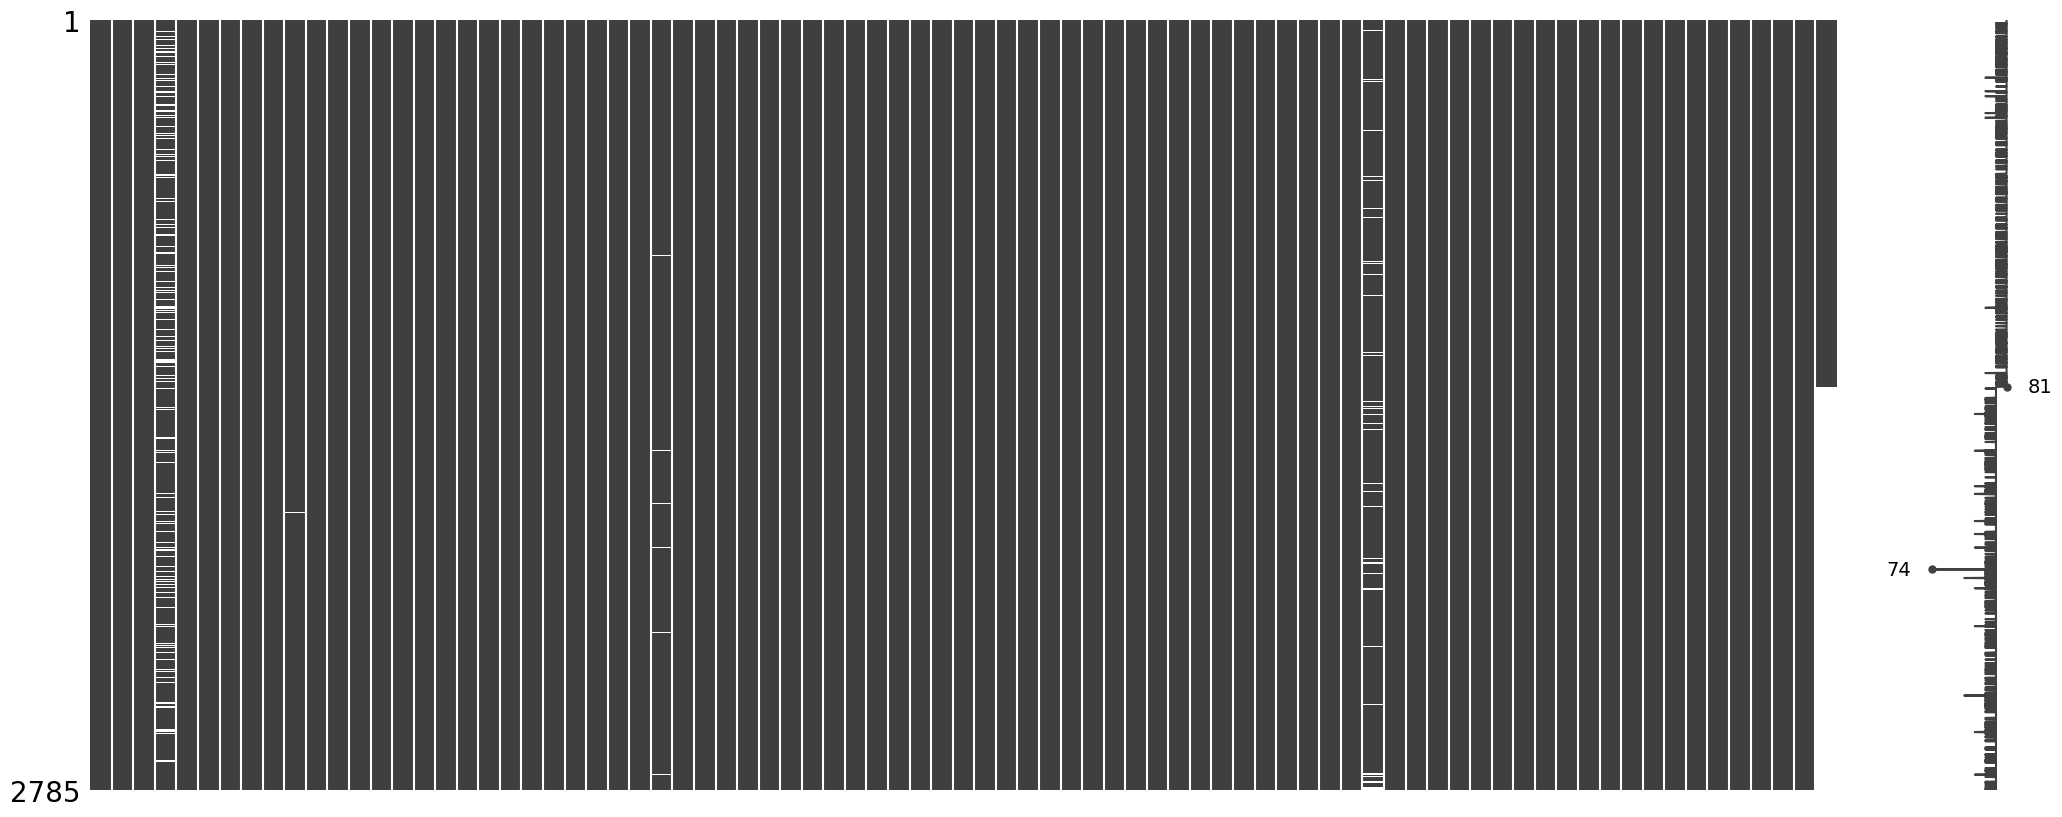

In [508]:
# Filling missing values in the MSZoning column with th mode
mszoning_mode = df_combine['MSZoning'].mode()[0]
df_combine['MSZoning'].fillna(mszoning_mode, inplace=True)

print(missing_values(df_combine))

#### LotFrontage

To analyze and impute the missing values for LotFrontage, we should select features that have a reasonably strong correlation with LotFrontage. Based on the correlation table provided, we can choose predictors with moderate-to-high correlation values.
LotArea (0.56)<br>
TotalBsmtSF (0.28)<br>
1stFlrSF (0.38)<br>
GrLivArea (0.32)<br>
GarageArea (0.31)<br>



In [509]:
predictors = ['LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']

In [510]:
know_frontage = df_combine[df_combine['LotFrontage'].notnull()]
unknown_frontage = df_combine[df_combine['LotFrontage'].isnull()]

X_train = know_frontage[predictors]
Y_train = know_frontage['LotFrontage']

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, Y_train)

X_missing = unknown_frontage[predictors]
predicted_frontage = model.predict(X_missing)

df_combine.loc[df_combine['LotFrontage'].isnull(), 'LotFrontage'] = predicted_frontage

RandomForestRegressor(random_state=42)

Column Utilities has 2 missing values, or 0.07%.
Column Exterior1st has 1 missing values, or 0.04%.
Column Exterior2nd has 1 missing values, or 0.04%.
Column MasVnrArea has 21 missing values, or 0.75%.
Column BsmtFinSF1 has 1 missing values, or 0.04%.
Column BsmtFinSF2 has 1 missing values, or 0.04%.
Column BsmtUnfSF has 1 missing values, or 0.04%.
Column TotalBsmtSF has 1 missing values, or 0.04%.
Column Electrical has 1 missing values, or 0.04%.
Column BsmtFullBath has 2 missing values, or 0.07%.
Column BsmtHalfBath has 2 missing values, or 0.07%.
Column KitchenQual has 1 missing values, or 0.04%.
Column Functional has 2 missing values, or 0.07%.
Column GarageYrBlt has 143 missing values, or 5.13%.
Column GarageCars has 1 missing values, or 0.04%.
Column GarageArea has 1 missing values, or 0.04%.
Column SaleType has 1 missing values, or 0.04%.
Column SalePrice has 1459 missing values, or 52.39%.
Axes(0.125,0.11;0.698618x0.77)
{'Utilities': 2, 'Exterior1st': 1, 'Exterior2nd': 1, 'MasV

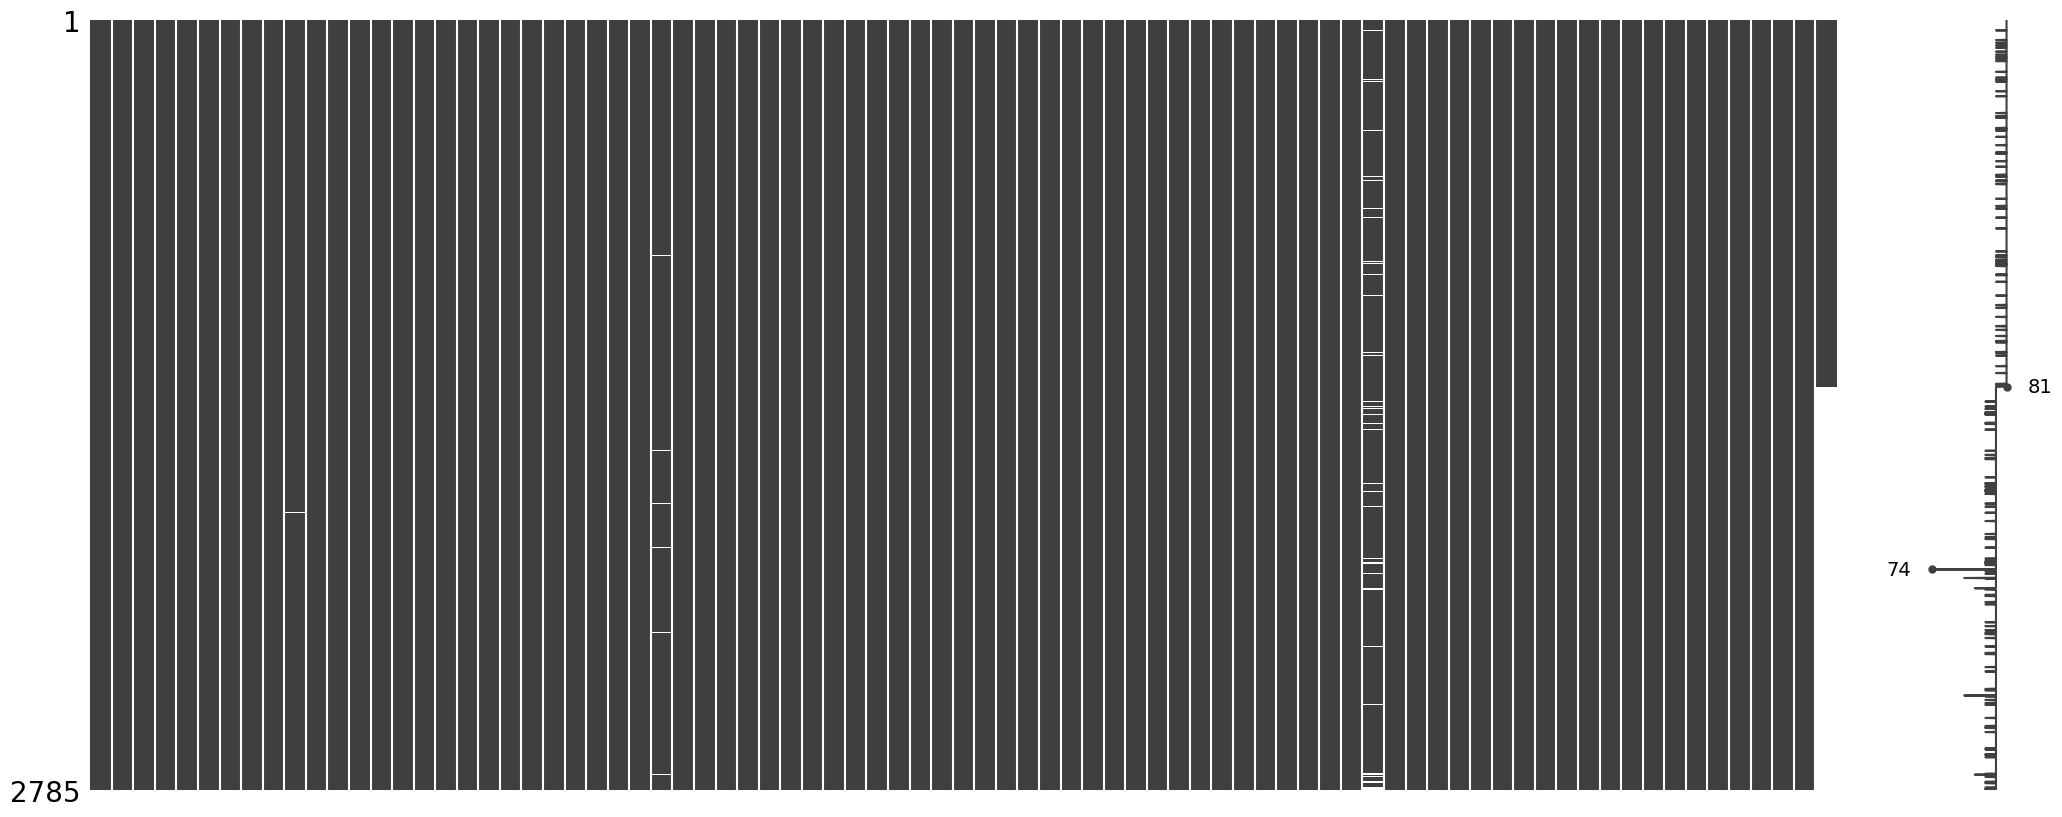

In [511]:
print(missing_values(df_combine))

#### Utilities

The Utilities column contains a small percentage of missing values (0.07%). Given that this column typically has a dominant category (AllPub), we chose to fill the missing values with the most frequent value, or mode, to maintain consistency in the dataset.

Column Exterior1st has 1 missing values, or 0.04%.
Column Exterior2nd has 1 missing values, or 0.04%.
Column MasVnrArea has 21 missing values, or 0.75%.
Column BsmtFinSF1 has 1 missing values, or 0.04%.
Column BsmtFinSF2 has 1 missing values, or 0.04%.
Column BsmtUnfSF has 1 missing values, or 0.04%.
Column TotalBsmtSF has 1 missing values, or 0.04%.
Column Electrical has 1 missing values, or 0.04%.
Column BsmtFullBath has 2 missing values, or 0.07%.
Column BsmtHalfBath has 2 missing values, or 0.07%.
Column KitchenQual has 1 missing values, or 0.04%.
Column Functional has 2 missing values, or 0.07%.
Column GarageYrBlt has 143 missing values, or 5.13%.
Column GarageCars has 1 missing values, or 0.04%.
Column GarageArea has 1 missing values, or 0.04%.
Column SaleType has 1 missing values, or 0.04%.
Column SalePrice has 1459 missing values, or 52.39%.
Axes(0.125,0.11;0.698618x0.77)
{'Exterior1st': 1, 'Exterior2nd': 1, 'MasVnrArea': 21, 'BsmtFinSF1': 1, 'BsmtFinSF2': 1, 'BsmtUnfSF': 1, 'T

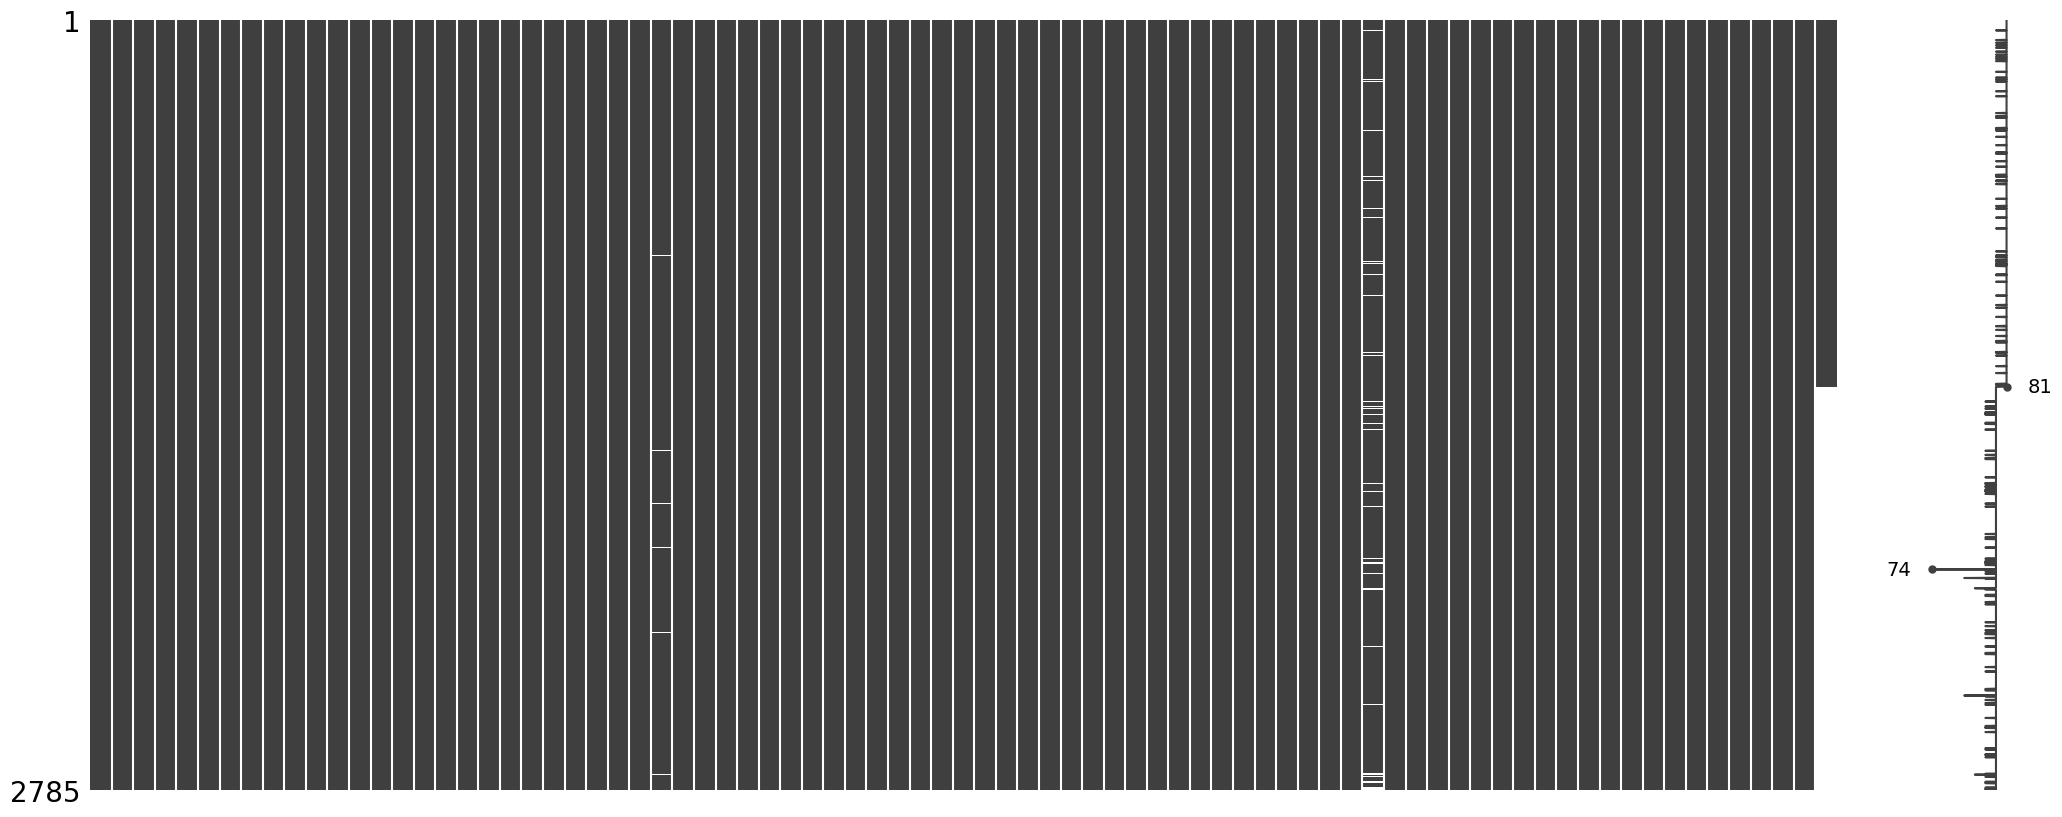

In [512]:
# Filling missing values in the Utilities column with th mode
mszoning_mode = df_combine['Utilities'].mode()[0]
df_combine['Utilities'].fillna(mszoning_mode, inplace=True)

print(missing_values(df_combine))

#### Exterior1st and Exterior2nd

Both the Exterior1st and Exterior2nd columns have a very small percentage of missing values (0.04%). To handle this, we have decided to fill the missing values with the mode of each column, ensuring consistency in the data and maintaining the distribution of values.

Column MasVnrArea has 21 missing values, or 0.75%.
Column BsmtFinSF1 has 1 missing values, or 0.04%.
Column BsmtFinSF2 has 1 missing values, or 0.04%.
Column BsmtUnfSF has 1 missing values, or 0.04%.
Column TotalBsmtSF has 1 missing values, or 0.04%.
Column Electrical has 1 missing values, or 0.04%.
Column BsmtFullBath has 2 missing values, or 0.07%.
Column BsmtHalfBath has 2 missing values, or 0.07%.
Column KitchenQual has 1 missing values, or 0.04%.
Column Functional has 2 missing values, or 0.07%.
Column GarageYrBlt has 143 missing values, or 5.13%.
Column GarageCars has 1 missing values, or 0.04%.
Column GarageArea has 1 missing values, or 0.04%.
Column SaleType has 1 missing values, or 0.04%.
Column SalePrice has 1459 missing values, or 52.39%.
Axes(0.125,0.11;0.698618x0.77)
{'MasVnrArea': 21, 'BsmtFinSF1': 1, 'BsmtFinSF2': 1, 'BsmtUnfSF': 1, 'TotalBsmtSF': 1, 'Electrical': 1, 'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'KitchenQual': 1, 'Functional': 2, 'GarageYrBlt': 143, 'GarageCars'

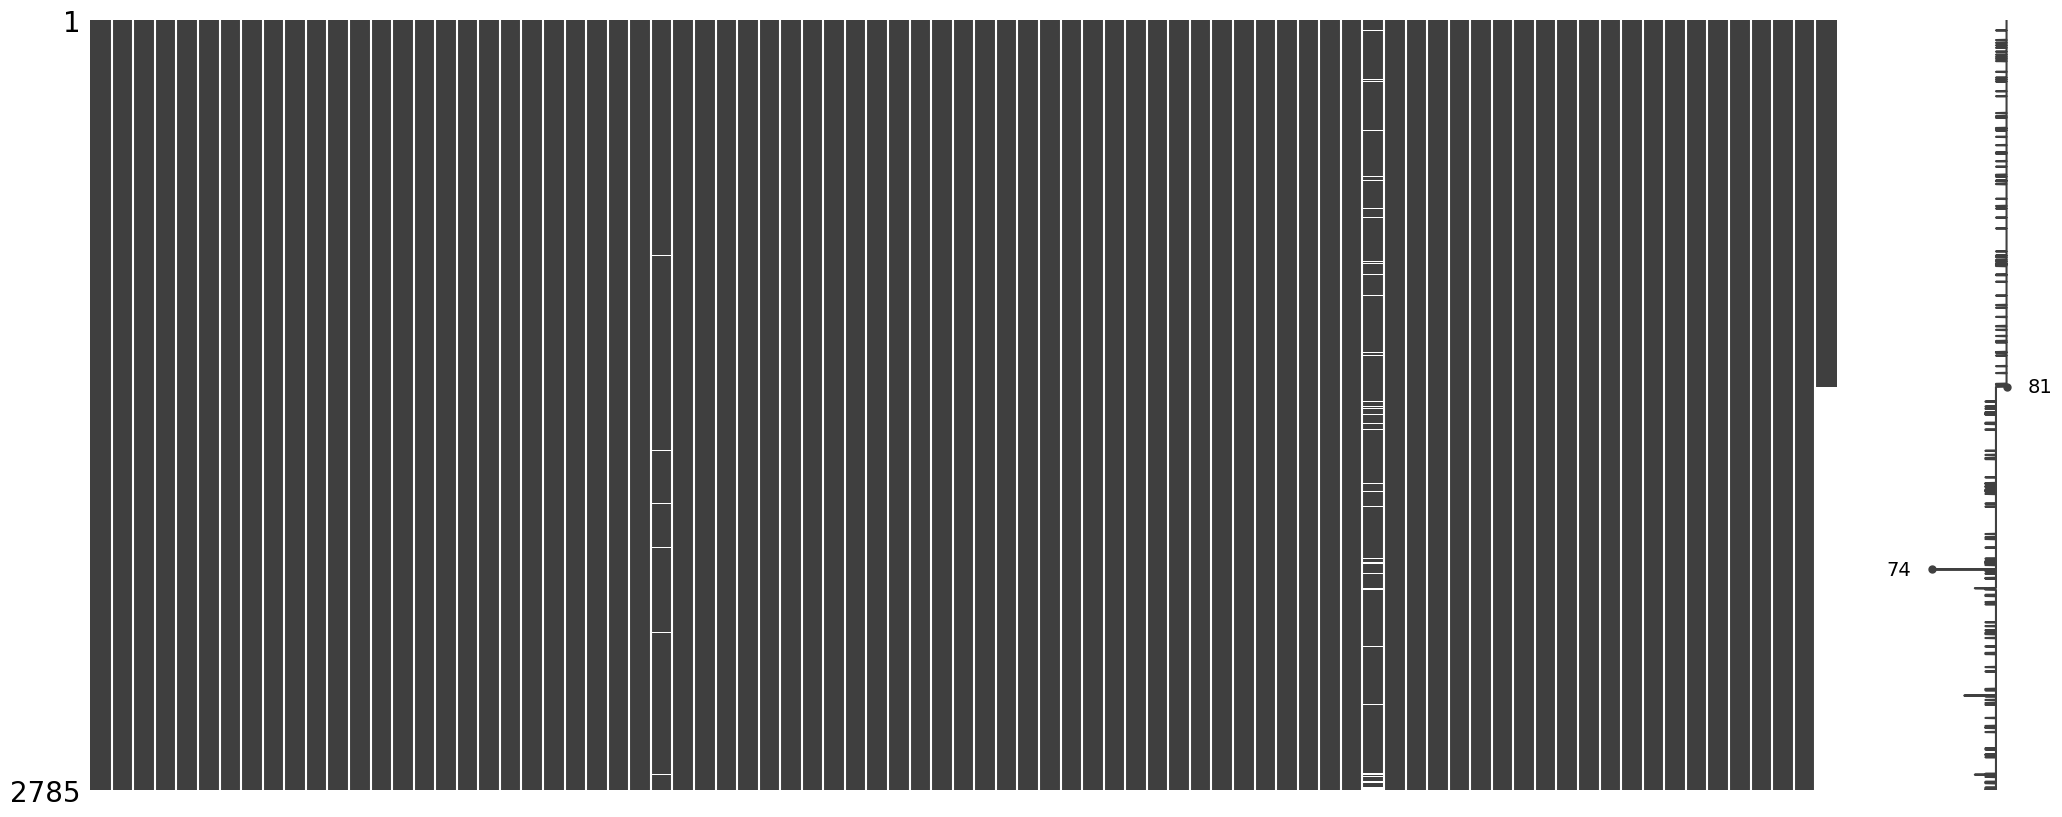

In [513]:
mszoning_mode = df_combine['Exterior1st'].mode()[0]
df_combine['Exterior1st'].fillna(mszoning_mode, inplace=True)

mszoning_mode = df_combine['Exterior2nd'].mode()[0]
df_combine['Exterior2nd'].fillna(mszoning_mode, inplace=True)

print(missing_values(df_combine))

#### MasVnrArea

To implement machine learning imputation for the MasVnrArea column , we can follow the approach similar to what we provided for LotFrontage.

Based on the correlation values you provided, it looks like the column MasVnrArea has strong correlations with other features like OverallQual, GrLivArea, TotalBsmtSF, and 1stFlrSF.

In [514]:
correlation_matrix = df_combine[[x for x in df_combine.columns if df_combine[x].dtype != 'object' and x != 'Id']].corr().round(2)
correlation_with_column = correlation_matrix['MasVnrArea']
print(correlation_with_column.sort_values(ascending=False))


MasVnrArea       1.00
SalePrice        0.42
OverallQual      0.42
GrLivArea        0.39
TotalBsmtSF      0.38
1stFlrSF         0.38
GarageArea       0.36
GarageCars       0.35
YearBuilt        0.31
BsmtFinSF1       0.28
Fireplaces       0.27
TotRmsAbvGrd     0.26
GarageYrBlt      0.25
FullBath         0.25
YearRemodAdd     0.19
LotFrontage      0.18
HalfBath         0.18
WoodDeckSF       0.16
BsmtFullBath     0.15
OpenPorchSF      0.14
LotArea          0.13
2ndFlrSF         0.10
BedroomAbvGr     0.08
BsmtUnfSF        0.08
ScreenPorch      0.07
MiscVal          0.06
3SsnPorch        0.02
MSSubClass       0.02
MoSold           0.01
BsmtHalfBath     0.00
BsmtFinSF2      -0.01
PoolArea        -0.01
YrSold          -0.02
KitchenAbvGr    -0.04
LowQualFinSF    -0.05
EnclosedPorch   -0.12
OverallCond     -0.15
Name: MasVnrArea, dtype: float64


In [515]:
predictors = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF']

know_frontage = df_combine[df_combine['MasVnrArea'].notnull()]
unknown_frontage = df_combine[df_combine['MasVnrArea'].isnull()]

X_train = know_frontage[predictors]
Y_train = know_frontage['MasVnrArea']

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, Y_train)

X_missing = unknown_frontage[predictors]
predicted_frontage = model.predict(X_missing)

df_combine.loc[df_combine['MasVnrArea'].isnull(), 'MasVnrArea'] = predicted_frontage

RandomForestRegressor(random_state=42)

Column BsmtFinSF1 has 1 missing values, or 0.04%.
Column BsmtFinSF2 has 1 missing values, or 0.04%.
Column BsmtUnfSF has 1 missing values, or 0.04%.
Column TotalBsmtSF has 1 missing values, or 0.04%.
Column Electrical has 1 missing values, or 0.04%.
Column BsmtFullBath has 2 missing values, or 0.07%.
Column BsmtHalfBath has 2 missing values, or 0.07%.
Column KitchenQual has 1 missing values, or 0.04%.
Column Functional has 2 missing values, or 0.07%.
Column GarageYrBlt has 143 missing values, or 5.13%.
Column GarageCars has 1 missing values, or 0.04%.
Column GarageArea has 1 missing values, or 0.04%.
Column SaleType has 1 missing values, or 0.04%.
Column SalePrice has 1459 missing values, or 52.39%.
Axes(0.125,0.11;0.698618x0.77)
{'BsmtFinSF1': 1, 'BsmtFinSF2': 1, 'BsmtUnfSF': 1, 'TotalBsmtSF': 1, 'Electrical': 1, 'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'KitchenQual': 1, 'Functional': 2, 'GarageYrBlt': 143, 'GarageCars': 1, 'GarageArea': 1, 'SaleType': 1, 'SalePrice': 1459}


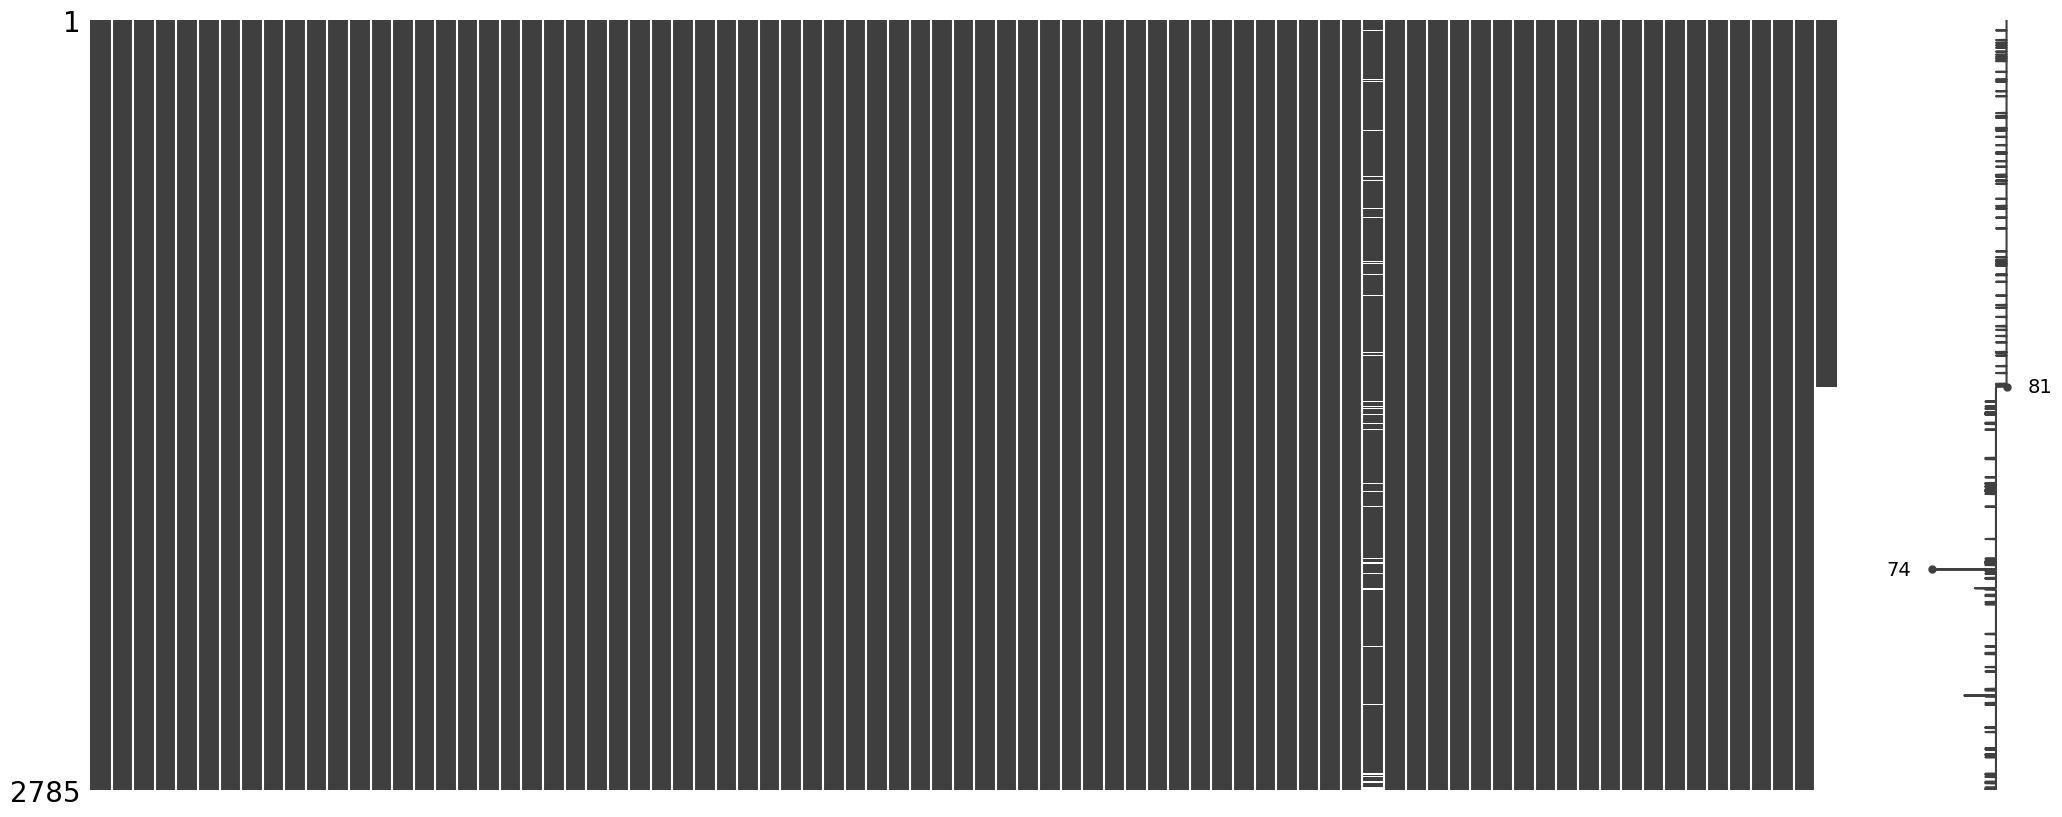

In [516]:
print(missing_values(df_combine))

#### BsmtFinSF1 and BsmtFinSF2

The distribution is not perfectly symmetrical but is relatively close. Both mean and median could work, but median is generally safer to mitigate potential effects of outliers.

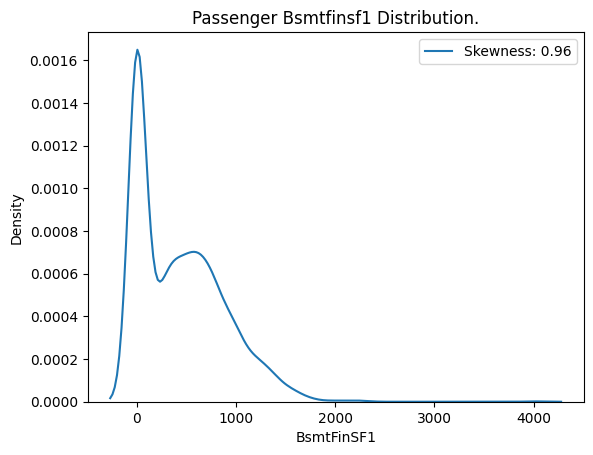

In [517]:
kdeplot_visualization(df_combine, 'BsmtFinSF1')

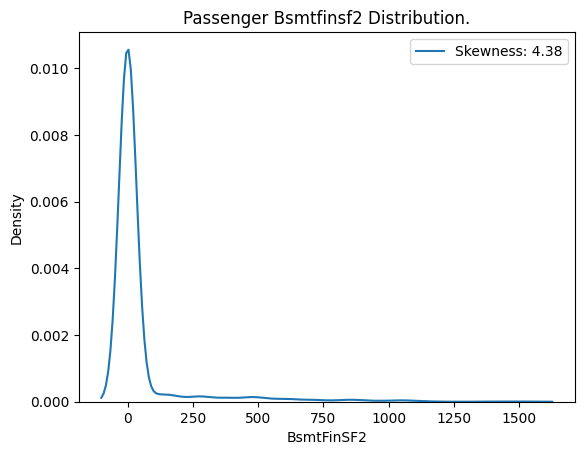

In [518]:
kdeplot_visualization(df_combine, 'BsmtFinSF2')

Column BsmtUnfSF has 1 missing values, or 0.04%.
Column TotalBsmtSF has 1 missing values, or 0.04%.
Column Electrical has 1 missing values, or 0.04%.
Column BsmtFullBath has 2 missing values, or 0.07%.
Column BsmtHalfBath has 2 missing values, or 0.07%.
Column KitchenQual has 1 missing values, or 0.04%.
Column Functional has 2 missing values, or 0.07%.
Column GarageYrBlt has 143 missing values, or 5.13%.
Column GarageCars has 1 missing values, or 0.04%.
Column GarageArea has 1 missing values, or 0.04%.
Column SaleType has 1 missing values, or 0.04%.
Column SalePrice has 1459 missing values, or 52.39%.
Axes(0.125,0.11;0.698618x0.77)
{'BsmtUnfSF': 1, 'TotalBsmtSF': 1, 'Electrical': 1, 'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'KitchenQual': 1, 'Functional': 2, 'GarageYrBlt': 143, 'GarageCars': 1, 'GarageArea': 1, 'SaleType': 1, 'SalePrice': 1459}


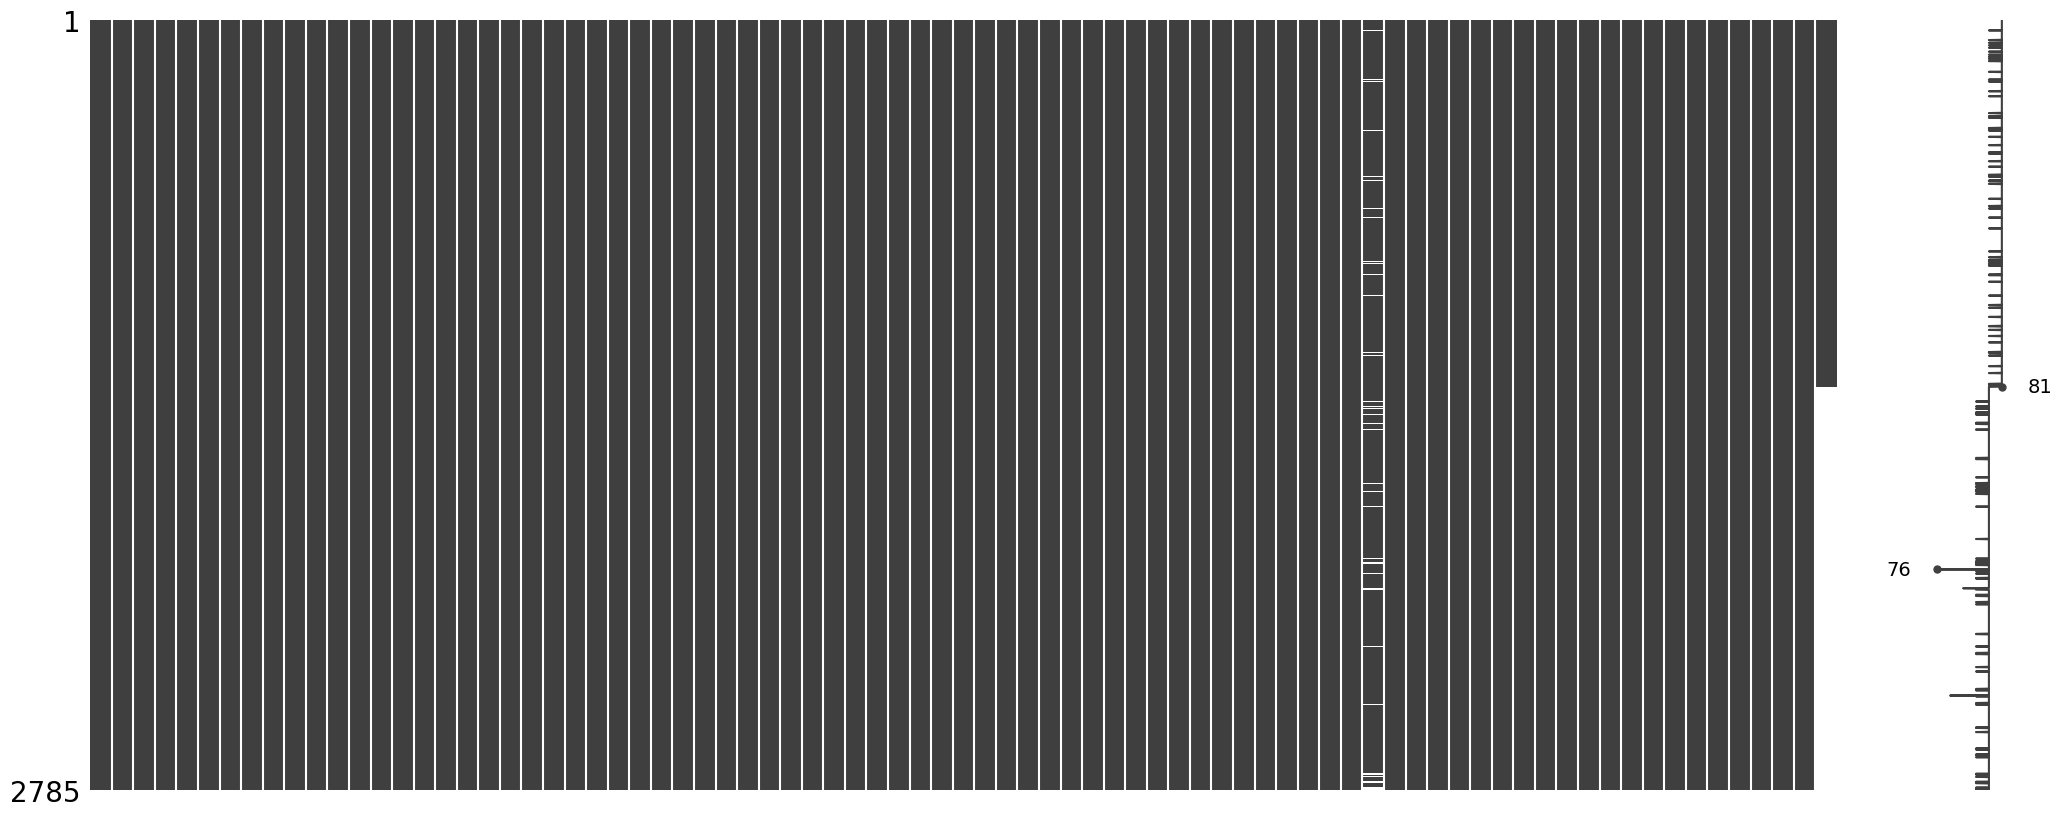

In [519]:
bsmt1_median = df_combine['BsmtFinSF1'].median()
df_combine['BsmtFinSF1'].fillna(bsmt1_median, inplace=True)

bsmt1_median = df_combine['BsmtFinSF2'].median()
df_combine['BsmtFinSF2'].fillna(bsmt1_median, inplace=True)

print(missing_values(df_combine))

#### BsmtUnfSF 

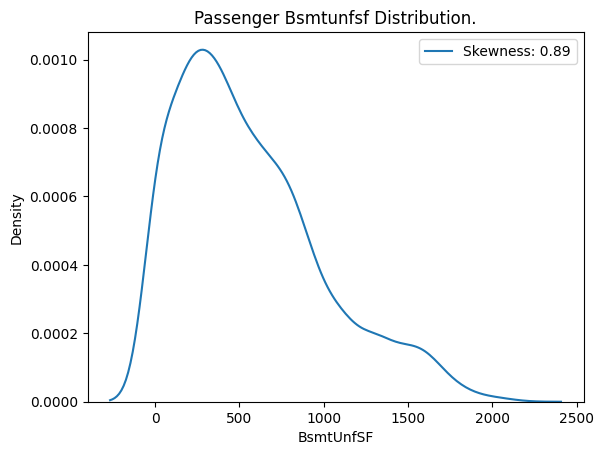

In [520]:
kdeplot_visualization(df_combine, 'BsmtUnfSF')

Column TotalBsmtSF has 1 missing values, or 0.04%.
Column Electrical has 1 missing values, or 0.04%.
Column BsmtFullBath has 2 missing values, or 0.07%.
Column BsmtHalfBath has 2 missing values, or 0.07%.
Column KitchenQual has 1 missing values, or 0.04%.
Column Functional has 2 missing values, or 0.07%.
Column GarageYrBlt has 143 missing values, or 5.13%.
Column GarageCars has 1 missing values, or 0.04%.
Column GarageArea has 1 missing values, or 0.04%.
Column SaleType has 1 missing values, or 0.04%.
Column SalePrice has 1459 missing values, or 52.39%.
Axes(0.125,0.11;0.698618x0.77)
{'TotalBsmtSF': 1, 'Electrical': 1, 'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'KitchenQual': 1, 'Functional': 2, 'GarageYrBlt': 143, 'GarageCars': 1, 'GarageArea': 1, 'SaleType': 1, 'SalePrice': 1459}


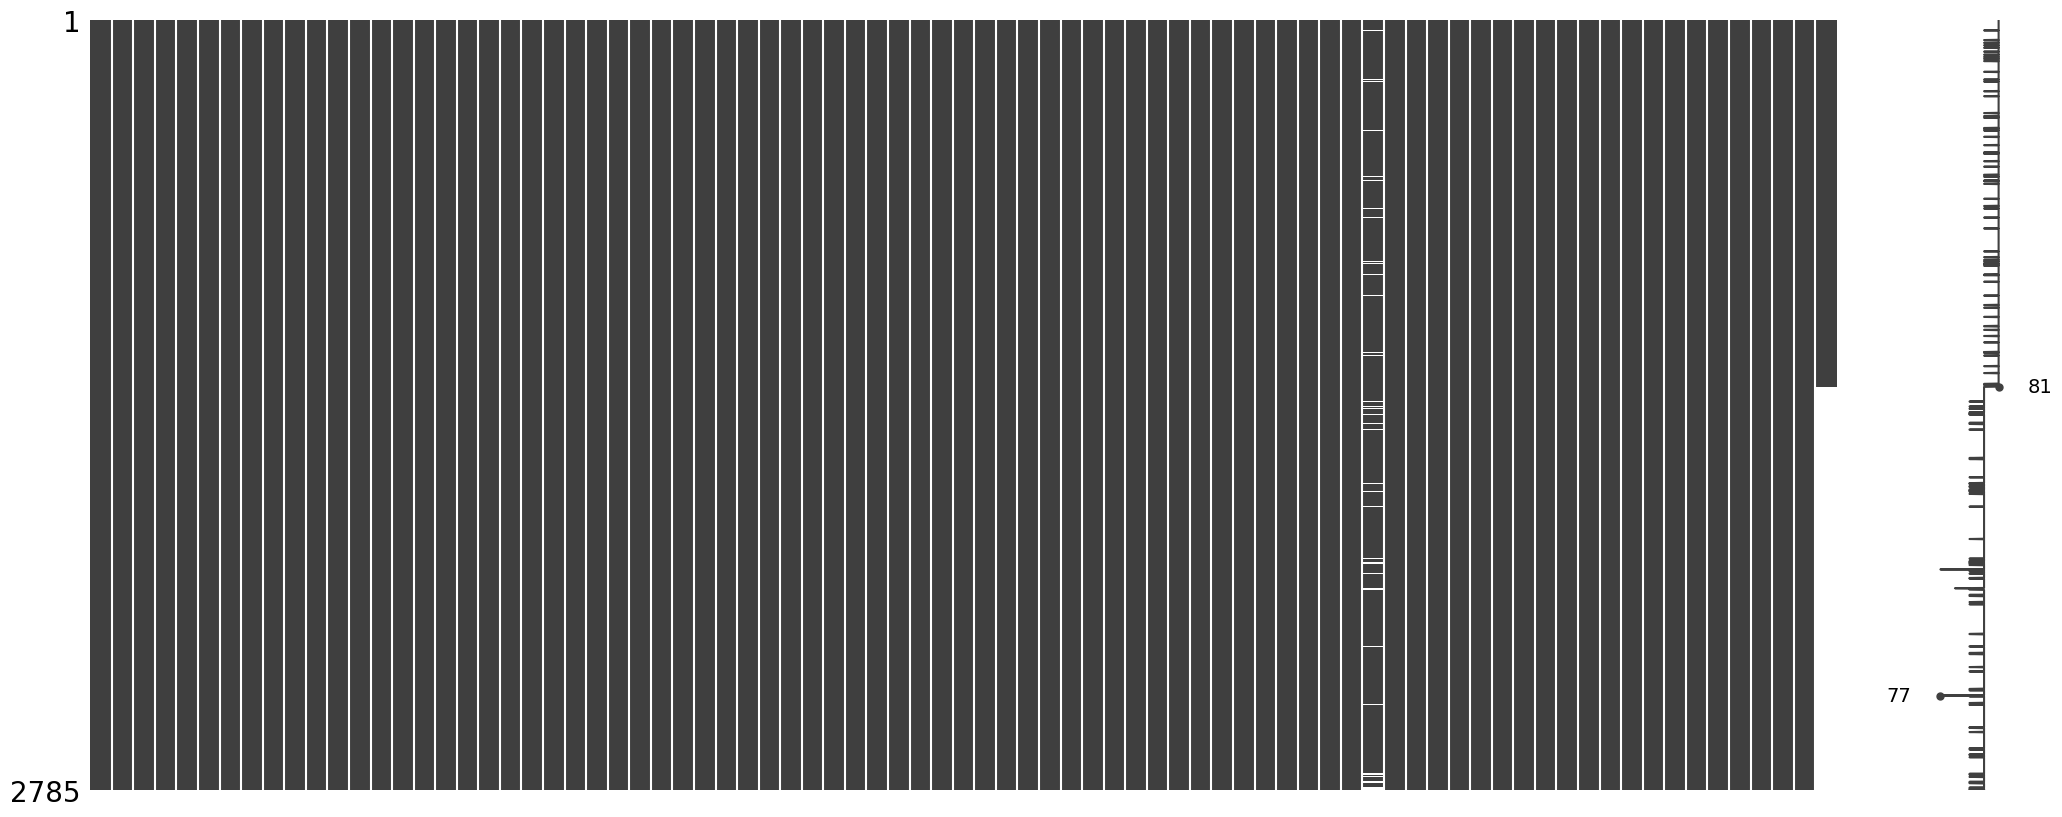

In [521]:
bsmt1_median = df_combine['BsmtUnfSF'].median()
df_combine['BsmtUnfSF'].fillna(bsmt1_median, inplace=True)

print(missing_values(df_combine))

#### TotalBsmtSF

Column Electrical has 1 missing values, or 0.04%.
Column BsmtFullBath has 2 missing values, or 0.07%.
Column BsmtHalfBath has 2 missing values, or 0.07%.
Column KitchenQual has 1 missing values, or 0.04%.
Column Functional has 2 missing values, or 0.07%.
Column GarageYrBlt has 143 missing values, or 5.13%.
Column GarageCars has 1 missing values, or 0.04%.
Column GarageArea has 1 missing values, or 0.04%.
Column SaleType has 1 missing values, or 0.04%.
Column SalePrice has 1459 missing values, or 52.39%.
Axes(0.125,0.11;0.698618x0.77)
{'Electrical': 1, 'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'KitchenQual': 1, 'Functional': 2, 'GarageYrBlt': 143, 'GarageCars': 1, 'GarageArea': 1, 'SaleType': 1, 'SalePrice': 1459}


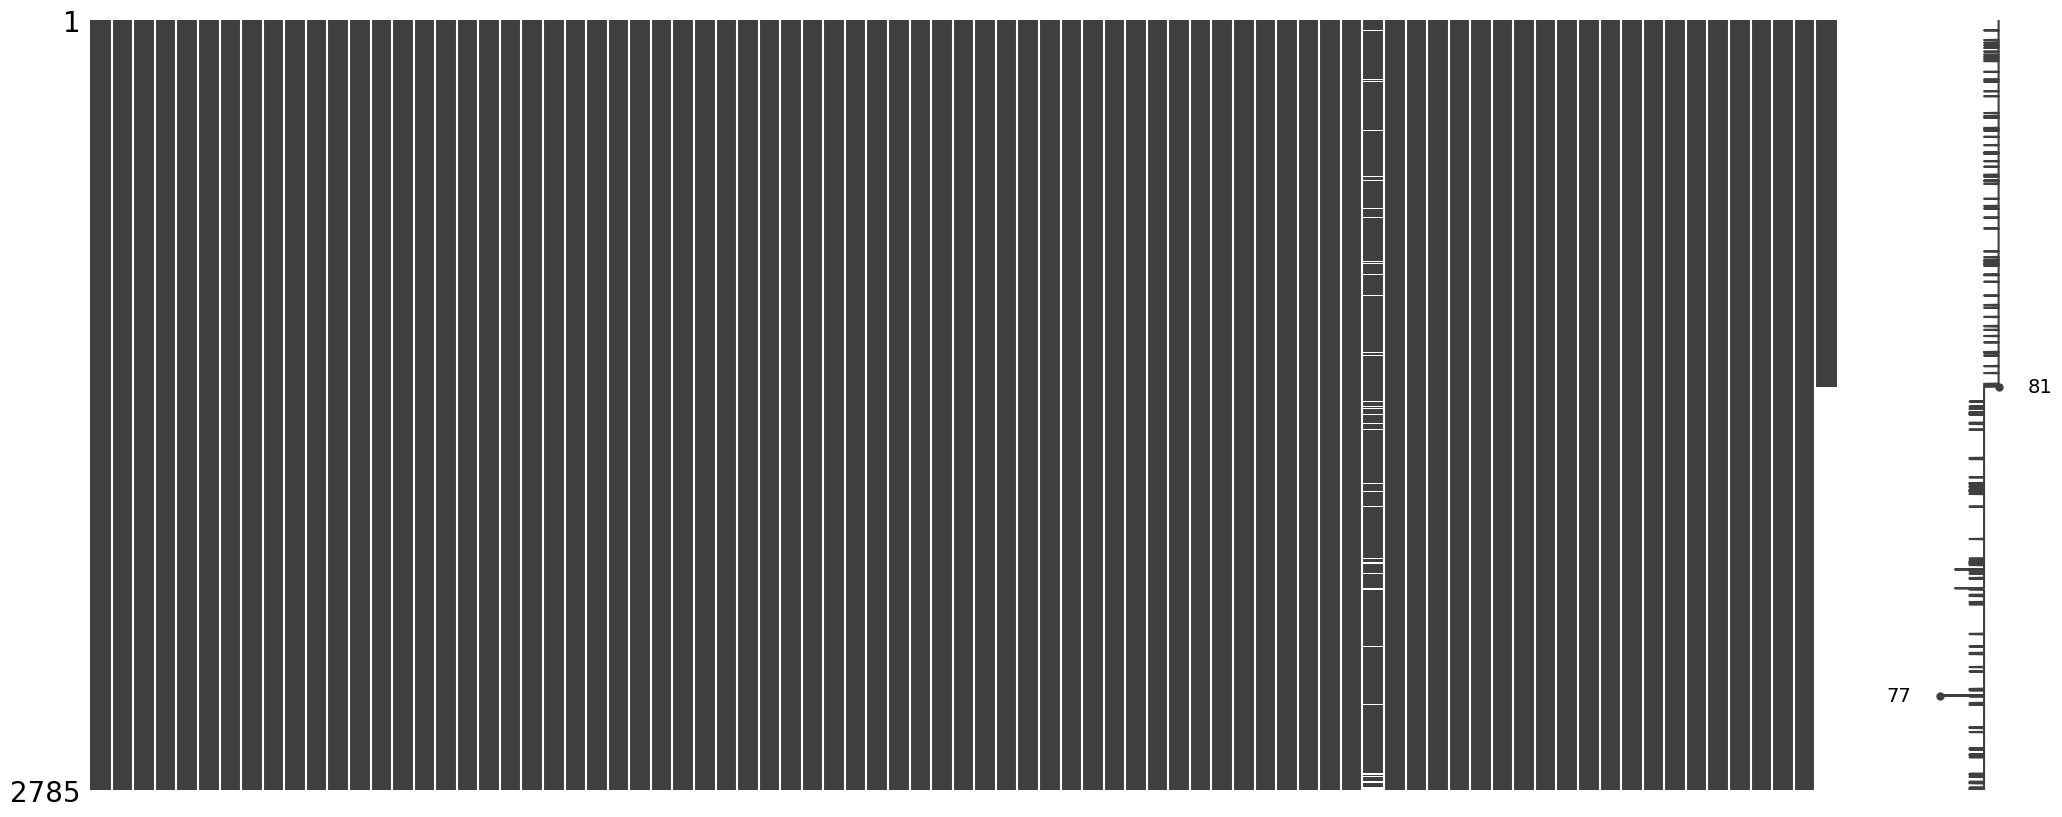

In [522]:
bsmt1_median = df_combine['TotalBsmtSF'].median()
df_combine['TotalBsmtSF'].fillna(bsmt1_median, inplace=True)

print(missing_values(df_combine))

#### Electrical

The mode, SBrkr, accounts for 92.3% of the data. It is the most frequent category by a large margin. mputing missing values with SBrkr is logical and aligns with the assumption that missing entries are most likely to belong to the dominant class.

In [523]:
column_description(df_combine, 'Electrical')

Column Electrical:
----------------------
Unique values: ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan]
----------------------
Value Caunts:
Electrical
SBrkr    2548
FuseA     182
FuseF      46
FuseP       7
Mix         1
Name: count, dtype: int64
----------------------
Missing Values: 1


Column BsmtFullBath has 2 missing values, or 0.07%.
Column BsmtHalfBath has 2 missing values, or 0.07%.
Column KitchenQual has 1 missing values, or 0.04%.
Column Functional has 2 missing values, or 0.07%.
Column GarageYrBlt has 143 missing values, or 5.13%.
Column GarageCars has 1 missing values, or 0.04%.
Column GarageArea has 1 missing values, or 0.04%.
Column SaleType has 1 missing values, or 0.04%.
Column SalePrice has 1459 missing values, or 52.39%.
Axes(0.125,0.11;0.698618x0.77)
{'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'KitchenQual': 1, 'Functional': 2, 'GarageYrBlt': 143, 'GarageCars': 1, 'GarageArea': 1, 'SaleType': 1, 'SalePrice': 1459}


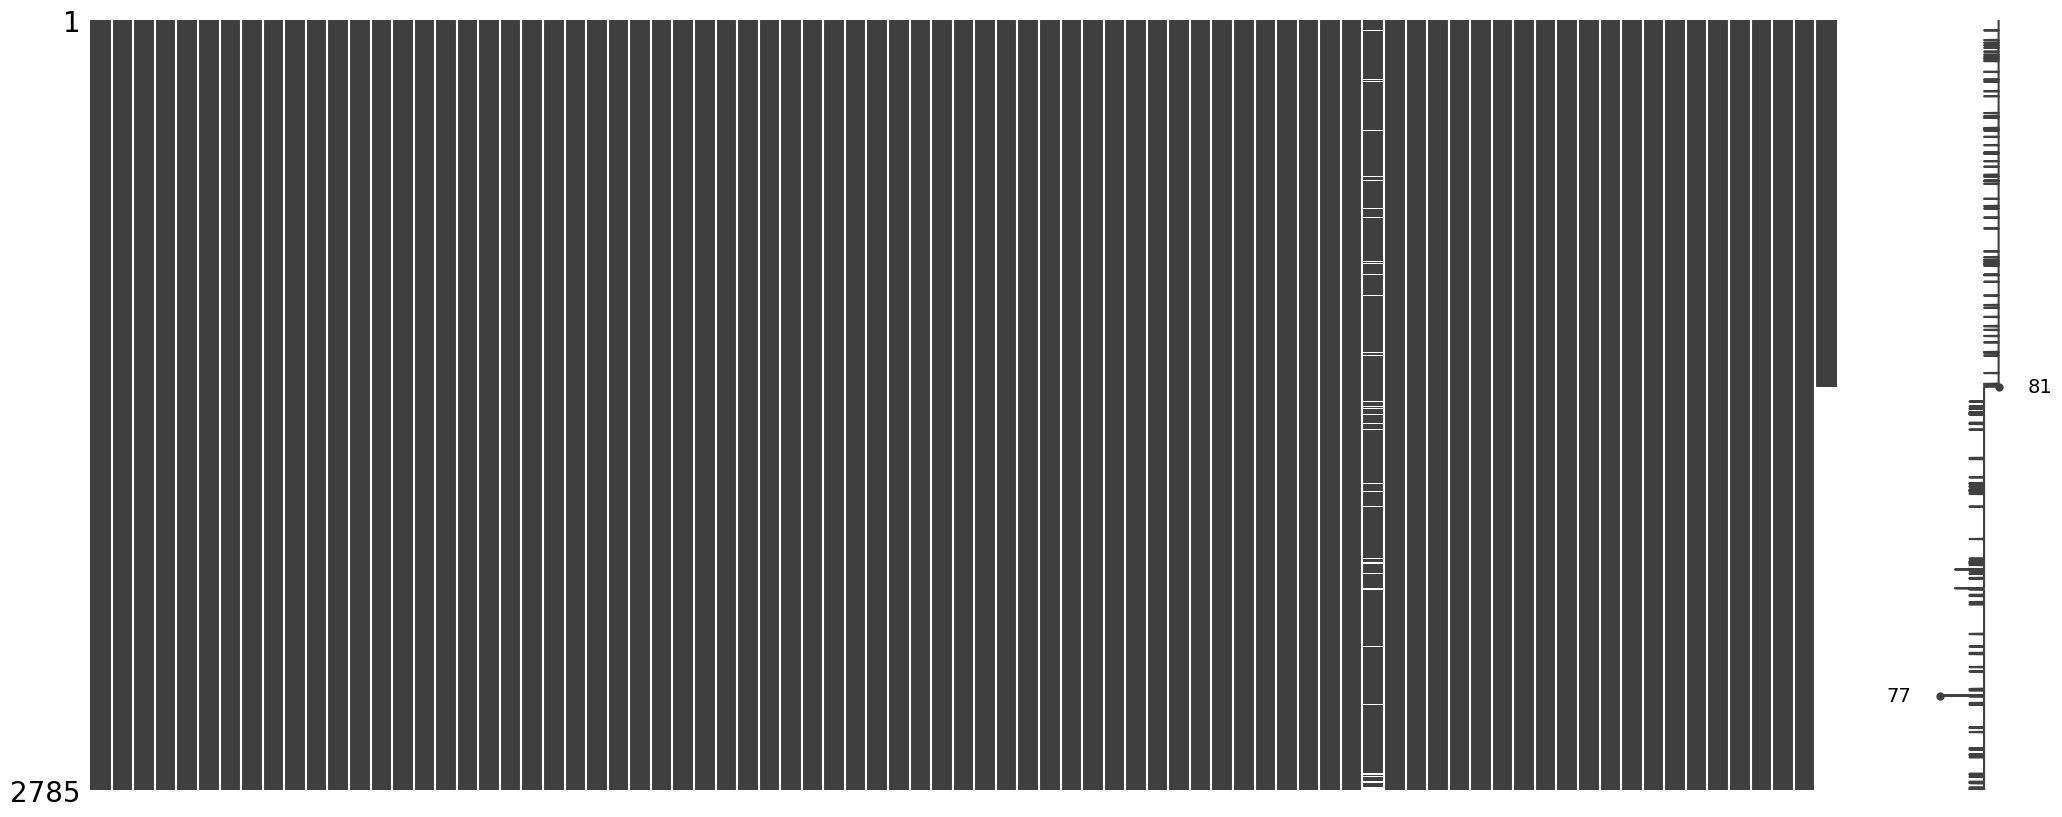

In [524]:
# Filling missing values in the MSZoning column with th mode
mszoning_mode = df_combine['Electrical'].mode()[0]
df_combine['Electrical'].fillna(mszoning_mode, inplace=True)

print(missing_values(df_combine))

#### BsmtFullBath and BsmtHalfBath

Column KitchenQual has 1 missing values, or 0.04%.
Column Functional has 2 missing values, or 0.07%.
Column GarageYrBlt has 143 missing values, or 5.13%.
Column GarageCars has 1 missing values, or 0.04%.
Column GarageArea has 1 missing values, or 0.04%.
Column SaleType has 1 missing values, or 0.04%.
Column SalePrice has 1459 missing values, or 52.39%.
Axes(0.125,0.11;0.698618x0.77)
{'KitchenQual': 1, 'Functional': 2, 'GarageYrBlt': 143, 'GarageCars': 1, 'GarageArea': 1, 'SaleType': 1, 'SalePrice': 1459}


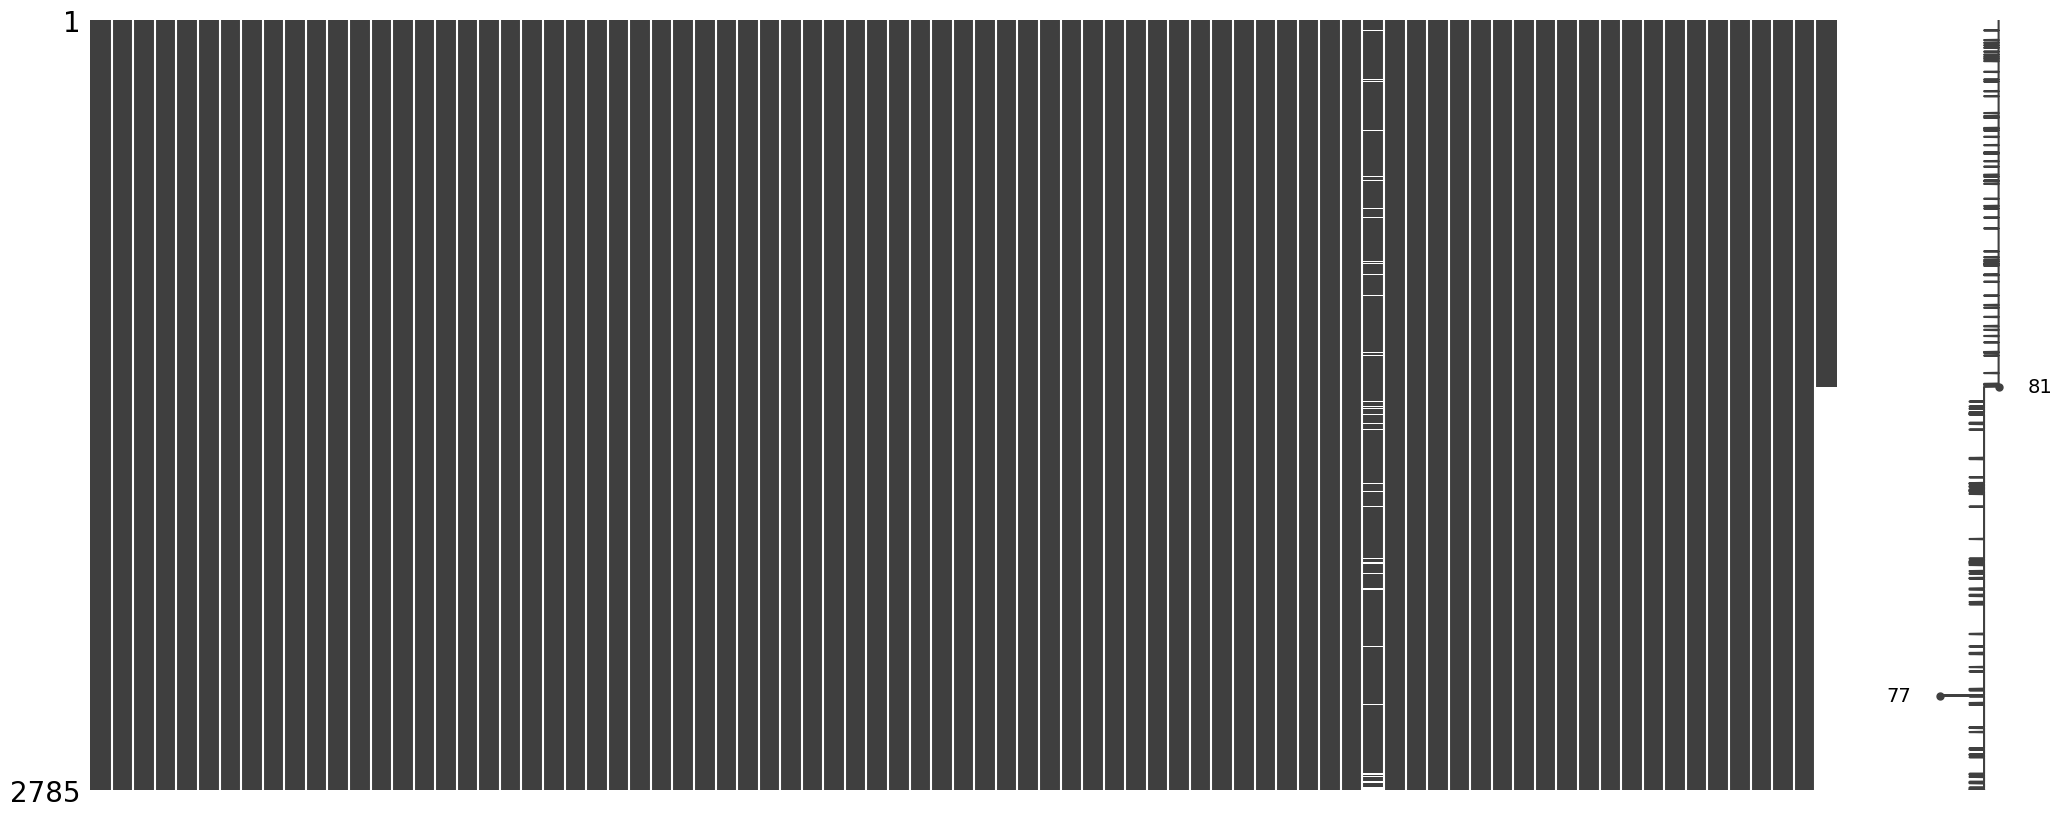

In [525]:
bsmt1_median = df_combine['BsmtFullBath'].median()
df_combine['BsmtFullBath'].fillna(bsmt1_median, inplace=True)

bsmt1_median = df_combine['BsmtHalfBath'].median()
df_combine['BsmtHalfBath'].fillna(bsmt1_median, inplace=True)

print(missing_values(df_combine))

#### KitchenQual 

In [526]:
mszoning_mode = df_combine['KitchenQual'].mode()[0]
df_combine['KitchenQual'].fillna(mszoning_mode, inplace=True)

#### Functional 

Column GarageYrBlt has 143 missing values, or 5.13%.
Column GarageCars has 1 missing values, or 0.04%.
Column GarageArea has 1 missing values, or 0.04%.
Column SaleType has 1 missing values, or 0.04%.
Column SalePrice has 1459 missing values, or 52.39%.
Axes(0.125,0.11;0.698618x0.77)
{'GarageYrBlt': 143, 'GarageCars': 1, 'GarageArea': 1, 'SaleType': 1, 'SalePrice': 1459}


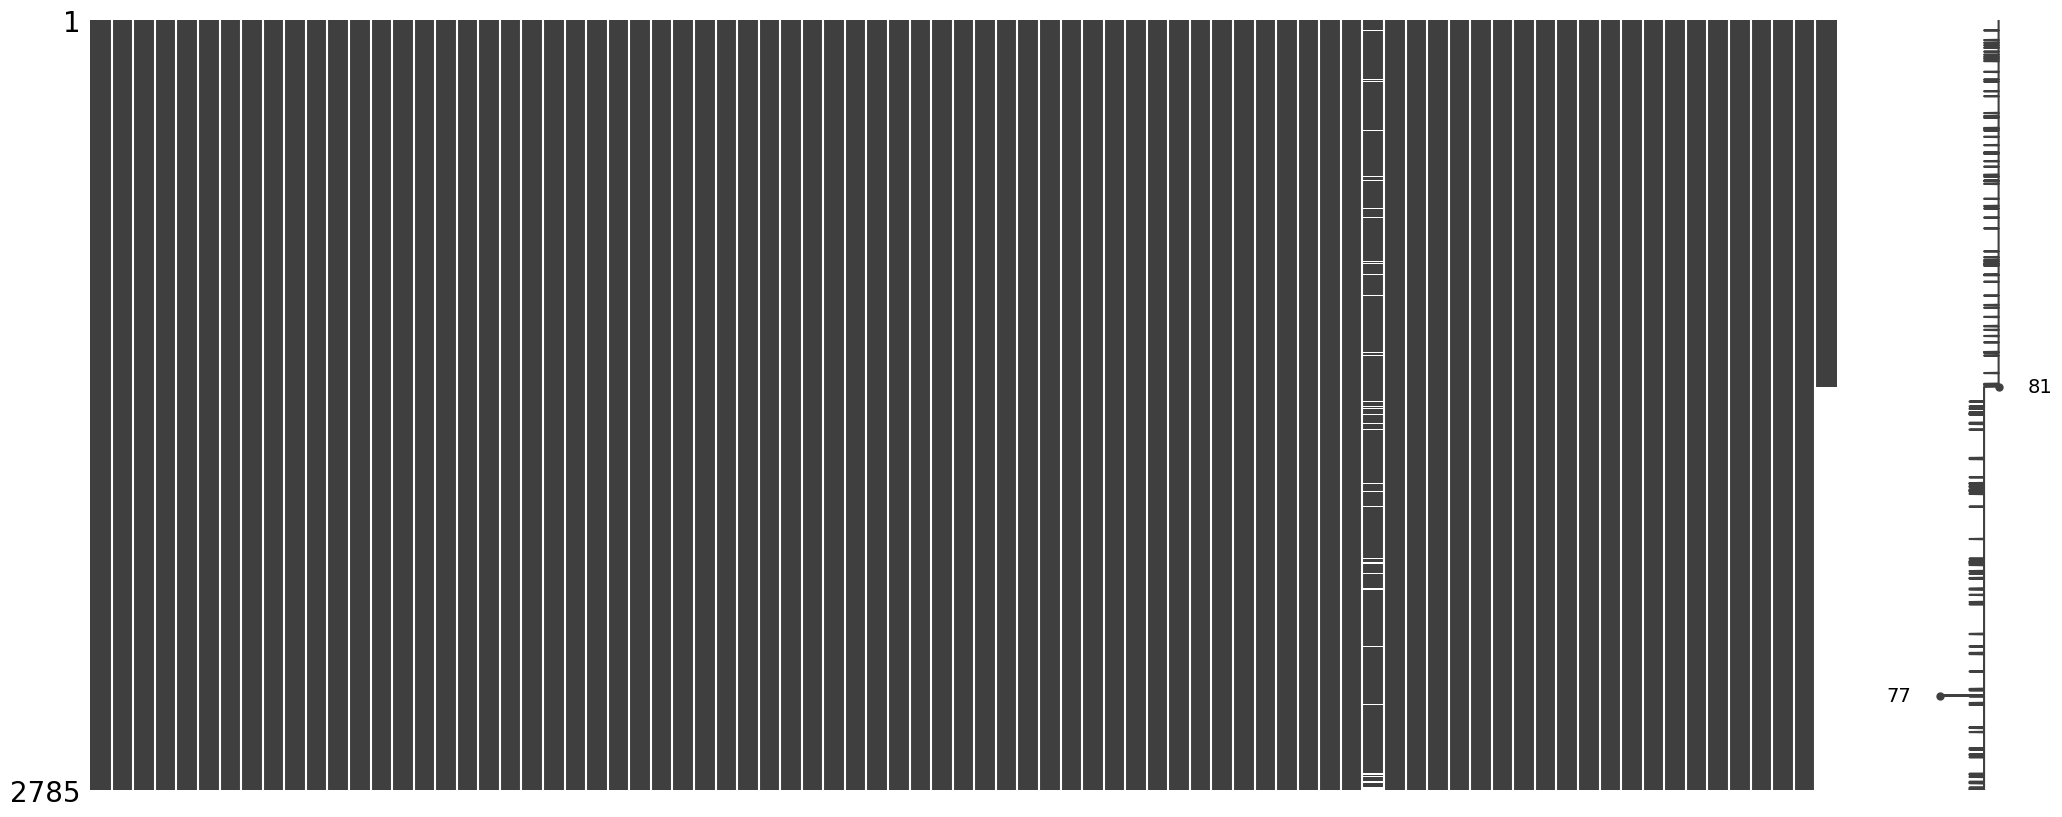

In [527]:
mszoning_mode = df_combine['Functional'].mode()[0]
df_combine['Functional'].fillna(mszoning_mode, inplace=True)

print(missing_values(df_combine))

#### GarageYrBlt, GarageCars, and GarageArea

In [528]:
bsmt1_median = df_combine['GarageYrBlt'].median()
df_combine['GarageYrBlt'].fillna(bsmt1_median, inplace=True)

bsmt1_median = df_combine['GarageCars'].median()
df_combine['GarageCars'].fillna(bsmt1_median, inplace=True)

bsmt1_median = df_combine['GarageArea'].median()
df_combine['GarageArea'].fillna(bsmt1_median, inplace=True)



#### SaleType 

Column SalePrice has 1459 missing values, or 52.39%.
Axes(0.125,0.11;0.698618x0.77)
{'SalePrice': 1459}


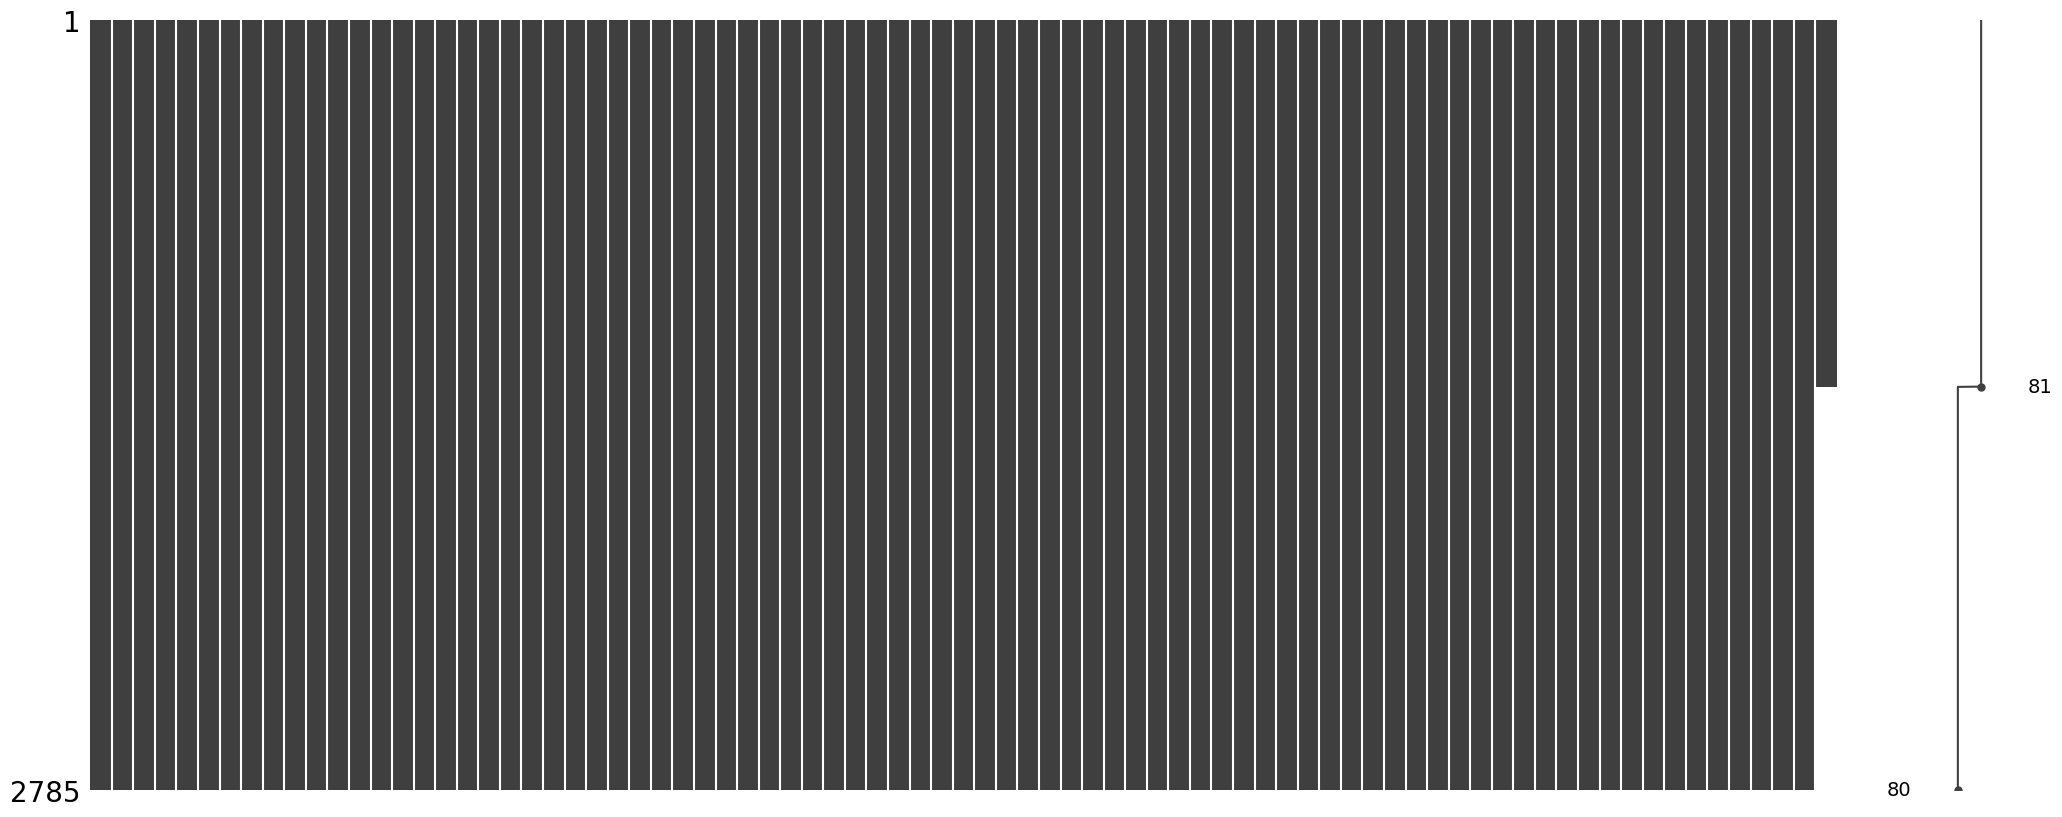

In [529]:
mszoning_mode = df_combine['SaleType'].mode()[0]
df_combine['SaleType'].fillna(mszoning_mode, inplace=True)

print(missing_values(df_combine))

## 5.2 Data Transformation

In [530]:
for col in df_combine.columns:
    if df_combine[col].dtype != 'object':
        print(f'Column {col} has skewness: {df_combine[col].skew().round(2)}')

Column Id has skewness: -0.06
Column MSSubClass has skewness: 1.36
Column LotFrontage has skewness: 0.95
Column LotArea has skewness: 5.73
Column OverallQual has skewness: 0.15
Column OverallCond has skewness: 0.57
Column YearBuilt has skewness: -0.58
Column YearRemodAdd has skewness: -0.45
Column MasVnrArea has skewness: 2.56
Column BsmtFinSF1 has skewness: 0.96
Column BsmtFinSF2 has skewness: 4.38
Column BsmtUnfSF has skewness: 0.89
Column TotalBsmtSF has skewness: 0.61
Column 1stFlrSF has skewness: 1.25
Column 2ndFlrSF has skewness: 0.84
Column LowQualFinSF has skewness: 15.58
Column GrLivArea has skewness: 0.92
Column BsmtFullBath has skewness: 0.62
Column BsmtHalfBath has skewness: 4.24
Column FullBath has skewness: 0.15
Column HalfBath has skewness: 0.7
Column BedroomAbvGr has skewness: 0.21
Column KitchenAbvGr has skewness: 4.59
Column TotRmsAbvGrd has skewness: 0.64
Column Fireplaces has skewness: 0.73
Column GarageYrBlt has skewness: -0.38
Column GarageCars has skewness: -0.21

Skewness can affect the performance of machine learning models, especially those sensitive to data distribution, such as linear regression. For numerical columns with high skewness (typically > |0.75|), applying transformations can normalize the data and improve model performance.

(|skewness| ≤ 0.75)

No transformation is needed for these columns as they are already relatively symmetric:

    Id, OverallQual, OverallCond, YearBuilt, YearRemodAdd, GarageYrBlt, GarageCars, GarageArea, MoSold, YrSold.

 (0.75 < |skewness| ≤ 2)

Logarithmic or square root transformations can be considered to reduce skewness:

    LotFrontage, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, TotRmsAbvGrd, Fireplaces, HalfBath, WoodDeckSF, OpenPorchSF.

 (|skewness| > 2)
 
Log transformations, box-cox transformations, or applying non-linear models can normalize these distributions:

    LotArea, MasVnrArea, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal.

In [531]:
columns_for_log_transformation = [
    'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
    'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

df_combine[columns_for_log_transformation] = df_combine[columns_for_log_transformation].map(lambda x: np.log(x) if x > 0 else 0)

In [532]:
for col in columns_for_log_transformation:
    print(f'Column {col} has skewness: {df_combine[col].skew().round(2)}')

Column LotArea has skewness: -0.9
Column MasVnrArea has skewness: 0.51
Column BsmtFinSF2 has skewness: 2.62
Column LowQualFinSF has skewness: 9.93
Column BsmtHalfBath has skewness: 26.34
Column KitchenAbvGr has skewness: 4.87
Column EnclosedPorch has skewness: 2.02
Column 3SsnPorch has skewness: 9.3
Column ScreenPorch has skewness: 3.06
Column PoolArea has skewness: 18.8
Column MiscVal has skewness: 5.58


In [533]:
columns_for_log_transformation_second = ['EnclosedPorch', 'ScreenPorch', 'PoolArea']

df_combine[columns_for_log_transformation_second] = df_combine[columns_for_log_transformation_second].map(lambda x: np.log(x) if x > 0 else 0)

for col in columns_for_log_transformation_second:
    print(f'Column {col} has skewness: {df_combine[col].skew().round(2)}')

Column EnclosedPorch has skewness: 1.98
Column ScreenPorch has skewness: 3.05
Column PoolArea has skewness: 18.66


In [534]:
columns_for_sqrt_tranformation = [
    'LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath',
    'WoodDeckSF', 'OpenPorchSF'
]

df_combine[columns_for_sqrt_tranformation] = np.sqrt(df_combine[columns_for_sqrt_tranformation])

In [535]:
for col in columns_for_sqrt_tranformation:
    print(f'Column {col} has skewness: {df_combine[col].skew().round(2)}')

Column LotFrontage has skewness: -0.19
Column BsmtFinSF1 has skewness: -0.05
Column BsmtUnfSF has skewness: -0.26
Column TotalBsmtSF has skewness: -1.49
Column 1stFlrSF has skewness: 0.53
Column 2ndFlrSF has skewness: 0.46
Column GrLivArea has skewness: 0.39
Column BsmtFullBath has skewness: 0.39
Column TotRmsAbvGrd has skewness: 0.24
Column Fireplaces has skewness: 0.12
Column HalfBath has skewness: 0.56
Column WoodDeckSF has skewness: 0.5
Column OpenPorchSF has skewness: 0.58


## 5.3 Features

It is a critical step in machine learning that involves creating new features to better represent the problem and improve model performance. Here, i will construct the following three features.

In [536]:
df_combine.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8.062258,9.041922,Pave,NoAl,Reg,Lvl,AllPub,...,0.0,NoPool,NoFence,None,0.0,2,2008,WD,Normal,208500.0
1,2,20,RL,8.944272,9.169518,Pave,NoAl,Reg,Lvl,AllPub,...,0.0,NoPool,NoFence,None,0.0,5,2007,WD,Normal,181500.0
2,3,60,RL,8.246211,9.328123,Pave,NoAl,IR1,Lvl,AllPub,...,0.0,NoPool,NoFence,None,0.0,9,2008,WD,Normal,223500.0
3,4,70,RL,7.745967,9.164296,Pave,NoAl,IR1,Lvl,AllPub,...,0.0,NoPool,NoFence,None,0.0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,9.165151,9.565214,Pave,NoAl,IR1,Lvl,AllPub,...,0.0,NoPool,NoFence,None,0.0,12,2008,WD,Normal,250000.0



### Combination TotalBsmtSF, 1stFlrSF, and 2ndFlrSF 

The combination of these three features might provide a more useful representation of the total living area in a house. For example, houses with larger basements might have more livable space than those with smaller basements, even if the first and second floors are of similar size.

In [537]:
df = df_combine.copy()

df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,8.062258,9.041922,Pave,NoAl,Reg,Lvl,AllPub,...,NoPool,NoFence,None,0.0,2,2008,WD,Normal,208500.0,87.738234
1,2,20,RL,8.944272,9.169518,Pave,NoAl,Reg,Lvl,AllPub,...,NoPool,NoFence,None,0.0,5,2007,WD,Normal,181500.0,71.049279
2,3,60,RL,8.246211,9.328123,Pave,NoAl,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0.0,9,2008,WD,Normal,223500.0,90.090881


### Combine FullBath, HalfBath, BsmtFullBath, and BsmtHalfBath

The combination of FullBath, HalfBath, BsmtFullBath, and BsmtHalfBath gives a more comprehensive view of the total bathroom count in the house, including those in the basement, which might add significant value to certain properties.

In [538]:
df['Total_Bathrooms'] = df['FullBath'] + (0.5*df['HalfBath']) + df['BsmtFullBath'] + (0.5*df['BsmtHalfBath'])

df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,Total_Bathrooms
0,1,60,RL,8.062258,9.041922,Pave,NoAl,Reg,Lvl,AllPub,...,NoFence,None,0.0,2,2008,WD,Normal,208500.0,87.738234,3.5
1,2,20,RL,8.944272,9.169518,Pave,NoAl,Reg,Lvl,AllPub,...,NoFence,None,0.0,5,2007,WD,Normal,181500.0,71.049279,2.0
2,3,60,RL,8.246211,9.328123,Pave,NoAl,IR1,Lvl,AllPub,...,NoFence,None,0.0,9,2008,WD,Normal,223500.0,90.090881,3.5


### Combine OpenPorchSF, 3SsnPorch, EnclosedPorch, ScreenPorch, and WoodDeckSF

By summing up various porch-related features (OpenPorchSF, 3SsnPorch, EnclosedPorch, ScreenPorch, and WoodDeckSF), we get a more comprehensive view of the total porch area in a house.

In [539]:
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                              df['EnclosedPorch'] + df['ScreenPorch'] +
                              df['WoodDeckSF'])

### New Column HasPool

The new column haspool is a binary feature (0 or 1) that indicates whether a property has a pool.

    1 means the property has a pool.
    0 means the property does not have a pool.

In [540]:
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,Total_Bathrooms,Total_porch_sf,haspool
0,1,60,RL,8.062258,9.041922,Pave,NoAl,Reg,Lvl,AllPub,...,0.0,2,2008,WD,Normal,208500.0,87.738234,3.5,7.810250,0
1,2,20,RL,8.944272,9.169518,Pave,NoAl,Reg,Lvl,AllPub,...,0.0,5,2007,WD,Normal,181500.0,71.049279,2.0,17.262677,0
2,3,60,RL,8.246211,9.328123,Pave,NoAl,IR1,Lvl,AllPub,...,0.0,9,2008,WD,Normal,223500.0,90.090881,3.5,6.480741,0


### New Column Has2ndFloor

The new column has2ndfloor is a binary feature (0 or 1) that indicates whether a property has a second floor.

    1 means the property has a second floor.
    0 means the property does not have a second floor.  

In [541]:
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

### New Column HasGarage

The hasgarage column is a binary feature (0 or 1) that indicates whether a property has a garage.

    1 means the property has a garage.
    0 means the property does not have a garage.

In [542]:
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage
0,1,60,RL,8.062258,9.041922,Pave,NoAl,Reg,Lvl,AllPub,...,2008,WD,Normal,208500.0,87.738234,3.5,7.810250,0,1,1
1,2,20,RL,8.944272,9.169518,Pave,NoAl,Reg,Lvl,AllPub,...,2007,WD,Normal,181500.0,71.049279,2.0,17.262677,0,0,1
2,3,60,RL,8.246211,9.328123,Pave,NoAl,IR1,Lvl,AllPub,...,2008,WD,Normal,223500.0,90.090881,3.5,6.480741,0,1,1
3,4,70,RL,7.745967,9.164296,Pave,NoAl,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000.0,85.990908,2.0,7.639882,0,1,1
4,5,60,RL,9.165151,9.565214,Pave,NoAl,IR1,Lvl,AllPub,...,2008,WD,Normal,250000.0,100.125659,3.5,23.021558,0,1,1
5,6,50,RL,9.219544,9.554993,Pave,NoAl,IR1,Lvl,AllPub,...,2009,WD,Normal,143000.0,80.217698,2.5,17.570102,0,1,1
6,7,20,RL,8.660254,9.218705,Pave,NoAl,Reg,Lvl,AllPub,...,2007,WD,Normal,307000.0,82.219162,3.0,23.518554,0,0,1
7,9,50,RM,7.141428,8.719317,Pave,NoAl,Reg,Lvl,AllPub,...,2008,WD,Abnorml,129900.0,90.245850,2.0,11.158872,0,1,1
8,10,190,RL,7.071068,8.911934,Pave,NoAl,Reg,Lvl,AllPub,...,2008,WD,Normal,118000.0,64.297831,2.0,2.000000,0,0,1
9,11,20,RL,8.366600,9.323669,Pave,NoAl,Reg,Lvl,AllPub,...,2008,WD,Normal,129500.0,64.498062,2.0,0.000000,0,0,1


### New Column hasbsmt

The hasbsmt column is a binary feature (0 or 1) that indicates whether a property has a basement.

    1 means the property has a basement.
    0 means the property does not have a basement.

In [543]:
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

### New Column hasfireplace

The hasfireplace column is a binary feature (0 or 1) that indicates whether a property has a fireplace.

    1 means the property has at least one fireplace.
    0 means the property has no fireplace.

In [544]:
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

## 5.4 Encoding 

Machine Learning models requre numerical input, so categorical features must be encoded before model training.

pd.factorize automatically assigns a unique integer to each category.

In [545]:
categorical_value = [x for x in df_combine.columns if df_combine[x].dtype == 'object']

In [546]:
for col in categorical_value:
    df[col], _ = pd.factorize(df[col])

df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,SalePrice,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1,60,0,8.062258,9.041922,0,0,0,0,0,...,0,208500.0,87.738234,3.5,7.810250,0,1,1,1,0
1,2,20,0,8.944272,9.169518,0,0,0,0,0,...,0,181500.0,71.049279,2.0,17.262677,0,0,1,1,1
2,3,60,0,8.246211,9.328123,0,0,1,0,0,...,0,223500.0,90.090881,3.5,6.480741,0,1,1,1,1
3,4,70,0,7.745967,9.164296,0,0,1,0,0,...,1,140000.0,85.990908,2.0,7.639882,0,1,1,1,1
4,5,60,0,9.165151,9.565214,0,0,1,0,0,...,0,250000.0,100.125659,3.5,23.021558,0,1,1,1,1


# 6. Modelling




In [547]:
train = df[:len(df_train)]
test = df[len(df_train):]

print(train.tail(3))


        Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
1323  1458          70         0     8.124038  9.109636       0      0   
1324  1459          20         0     8.246211  9.181632       0      0   
1325  1460          20         0     8.660254  9.204020       0      0   

      LotShape  LandContour  Utilities  ...  SaleCondition  SalePrice  \
1323         0            0          0  ...              0   266500.0   
1324         0            0          0  ...              0   142125.0   
1325         0            0          0  ...              0   147500.0   

         TotalSF  Total_Bathrooms  Total_porch_sf  haspool  has2ndfloor  \
1323  102.349627              2.0        7.745967        0            1   
1324   65.665821              2.0       20.682617        0            0   
1325   70.880181              2.5       35.375531        0            0   

      hasgarage  hasbsmt  hasfireplace  
1323          1        1             1  
1324          1        1   

In [548]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,SalePrice,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
1326,1461,20,4,8.944272,9.360655,0,0,0,0,0,...,0,NaN,59.631744,1.0,13.398166,0,0,1,1,0
1327,1462,20,0,9.000000,9.565704,0,0,1,0,0,...,0,NaN,72.910905,1.5,25.824228,0,0,1,1,0
1328,1463,60,0,8.602325,9.534595,0,0,1,0,0,...,0,NaN,87.402589,2.5,20.391172,0,1,1,1,1


In [549]:
test['SalePrice'] = np.nan

In [550]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,SalePrice,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
1326,1461,20,4,8.944272,9.360655,0,0,0,0,0,...,0,NaN,59.631744,1.0,13.398166,0,0,1,1,0
1327,1462,20,0,9.000000,9.565704,0,0,1,0,0,...,0,NaN,72.910905,1.5,25.824228,0,0,1,1,0
1328,1463,60,0,8.602325,9.534595,0,0,1,0,0,...,0,NaN,87.402589,2.5,20.391172,0,1,1,1,1


In [551]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,SalePrice,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1,60,0,8.062258,9.041922,0,0,0,0,0,...,0,208500.0,87.738234,3.5,7.810250,0,1,1,1,0
1,2,20,0,8.944272,9.169518,0,0,0,0,0,...,0,181500.0,71.049279,2.0,17.262677,0,0,1,1,1
2,3,60,0,8.246211,9.328123,0,0,1,0,0,...,0,223500.0,90.090881,3.5,6.480741,0,1,1,1,1


In [556]:
X_train = train.drop(["SalePrice"], axis=1)
Y_train = train["SalePrice"]

X_train = X_train.drop('Id', axis=1)

test_copy = test.drop('Id', axis=1)
test_copy = test_copy.drop('SalePrice', axis=1)
test_copy.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
1326,20,4,8.944272,9.360655,0,0,0,0,0,0,...,0,0,59.631744,1.0,13.398166,0,0,1,1,0
1327,20,0,9.000000,9.565704,0,0,1,0,0,2,...,0,0,72.910905,1.5,25.824228,0,0,1,1,0
1328,60,0,8.602325,9.534595,0,0,1,0,0,0,...,0,0,87.402589,2.5,20.391172,0,1,1,1,1
